## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.


- In this project, you will use the usage-based definition to define churn.
- In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

#### Business Goal 
Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

 - It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

 - It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

## Step 1: Importing Libraries

Let us first import libraries required for all the operations in the notebook

In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import minmax_scale, StandardScaler, LabelEncoder

from sklearn.feature_selection import RFE, RFECV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, precision_recall_curve, f1_score

import statsmodels.api as sm

In [2]:
#supressing warnings
import warnings
warnings.filterwarnings('ignore')

#Setting up view options in jupyter
%matplotlib inline
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

## Step 2: Importing the data and Inspecting dataframe

In [3]:
telecom = pd.read_csv("telecom_churn_data.csv")

In [4]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
#Checking Total No. of Rows-Columns and Total Null Values in DatFrame
print('########## Dataset Infomation ##########')
print ("Rows                 : " ,telecom.shape[0])
print ("Columns              : " ,telecom.shape[1])
print ("Total Missing values : ",telecom.isnull().sum().values.sum())

########## Dataset Infomation ##########
Rows                 :  99999
Columns              :  226
Total Missing values :  3594931


In [6]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

## Step 3: Data Cleaning

### 3.1 To handle Duplicate rows

We check for duplicte rows using unique identifiers

For our data "mobile_number" is a unique the identifiers.

In [8]:
print("Total number of duplicate values w.r.t ID column :" , telecom.duplicated(subset = 'mobile_number').sum())

Total number of duplicate values w.r.t ID column : 0


<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  There are no duplicates in the data

    </span>
</div>

### 3.2 Dropping identity rows

In [9]:
telecom.drop(columns= ["circle_id","mobile_number"],inplace=True)

### 3.3 To handle Columns with Null values
#### To find the % Null values in the data



In [10]:
(round(telecom.isnull().mean()*100)).sort_values(ascending=False)

night_pck_user_6            75.0
total_rech_data_6           75.0
count_rech_3g_6             75.0
arpu_2g_6                   75.0
fb_user_6                   75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
max_rech_data_6             75.0
count_rech_2g_6             75.0
arpu_3g_6                   75.0
av_rech_amt_data_9          74.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
arpu_2g_8                   74.0
arpu_3g_7                   74.0
count_rech_3g_8             74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_7                   74.0
count_rech_3g_9             74.0
count_rech_2g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_9             74.0
arpu_2g_9                   74.0
count_rech_2g_7             74.0
max_rech_data_9             74.0
max_rech_data_8             74.0
max_rech_data_7             74.0
total_rech_data_9           74.0
date_of_last_rech_data_7    74.0
date_of_la

#### To check and drop the colums with huge null values (to remove bias in the data)

In [11]:
#dropping cols with more than 50% missing values
columns_to_drop = [i for i in telecom.columns if telecom[i].isnull().mean() >= 0.5]
print("Columns with more than or equal to 50% null are : ",columns_to_drop)

Columns with more than or equal to 50% null are :  ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  Data being from the year 2014, where data pack users are in minority the null values in the mobile data related columns.
        
  -  As such let's try to impute with values rather than dropping.
        
  - As no usage translates to zero. let's impute with zero
        
  - for night pack users and fb users let's impute with -1 to identify them as they are not using the services

    </span>
</div>

In [12]:
# create a list of recharge columns where we will impute missing values with zeroes

recharge_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9','count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9',
'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']

telecom[recharge_impute] = telecom[recharge_impute].fillna(0)

In [13]:
# create a list of service columns where we will impute missing values with -1
# -1 will indicate the data as missing
impute_service_col=['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9' ]

telecom[impute_service_col] = telecom[impute_service_col].apply(lambda x: x.fillna(-1))

In [14]:
# now dropping the rest of cols with more than 50% missing values
columns_to_drop = [i for i in telecom.columns if telecom[i].isnull().mean() >= 0.5]
print("Columns with more than or equal to 50% null are : ",columns_to_drop)
telecom.drop(columns_to_drop , axis =1, inplace = True)

Columns with more than or equal to 50% null are :  ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [15]:
print("After cleaning the data \n Number of Row     :",len(telecom.index),"\n Number of Columns :",len(telecom.columns))

After cleaning the data 
 Number of Row     : 99999 
 Number of Columns : 220


##### Imputation of null values are done once the data's nature is seen, The data is segregated into categorical and numerical. then they are individually inspedted then a decision is taken

### 3.3.1 To segregate Categotical and numerical data

In [16]:
categorical_col = list(telecom.select_dtypes(exclude =["number"]).columns.values)
numerical_col = list(telecom.select_dtypes(include =["number"]).columns.values)
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'] 


NUMERICAL FEATURES : 
 ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', '

In [17]:
telecom[categorical_col] = telecom[categorical_col].astype("category")

In [18]:
telecom[impute_service_col] = telecom[impute_service_col].astype("category")
categorical_col.extend(impute_service_col)
numerical_col = [a for a in numerical_col if a not in impute_service_col]

### 3.3.2 null value treatment of categorical columns

In [19]:
# Checking unique values and null values for the categorical columns
def categorical_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","unique_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_values_count"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(2)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_percent", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [20]:
categorical_info(telecom, categorical_col)

unique_values  null_percent  null_values_count
columns                                                            
date_of_last_rech_9             30          4.76             4760.0
date_of_last_rech_8             31          3.62             3622.0
date_of_last_rech_7             31          1.77             1767.0
last_date_of_month_9             1          1.66             1659.0
date_of_last_rech_6             30          1.61             1607.0
last_date_of_month_8             1          1.10             1100.0
last_date_of_month_7             1          0.60              601.0
last_date_of_month_6             1          0.00                0.0
night_pck_user_6                 3          0.00                0.0
night_pck_user_7                 3          0.00                0.0
night_pck_user_8                 3          0.00                0.0
night_pck_user_9                 3          0.00                0.0
fb_user_6                        3          0.00                0.0
fb_user_7                        3          0.00                0.0
fb_user_8                        3          0.00                0.0
fb_user_9                        3          0.00                0.0

### 3.3.3 null value treatment of Numerical columns

In [21]:
# Checking unique values and null values for the categorical columns
def Numerical_info(df, numeric_column):
    df_result = pd.DataFrame(columns=["columns","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in numeric_column:
        df_temp["columns"] = [value]
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(2)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_percent", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [22]:
Numerical_info(telecom,numerical_col)

null_percent
columns                         
std_ic_t2m_mou_9            7.75
loc_og_t2t_mou_9            7.75
loc_og_t2f_mou_9            7.75
loc_og_t2c_mou_9            7.75
loc_og_mou_9                7.75
std_og_t2t_mou_9            7.75
std_og_t2m_mou_9            7.75
std_og_t2f_mou_9            7.75
std_og_mou_9                7.75
isd_og_mou_9                7.75
spl_og_mou_9                7.75
og_others_9                 7.75
spl_ic_mou_9                7.75
loc_ic_t2t_mou_9            7.75
loc_ic_t2m_mou_9            7.75
loc_ic_t2f_mou_9            7.75
loc_ic_mou_9                7.75
std_ic_t2t_mou_9            7.75
std_ic_t2f_mou_9            7.75
std_ic_t2o_mou_9            7.75
std_ic_mou_9                7.75
loc_og_t2m_mou_9            7.75
std_og_t2c_mou_9            7.75
roam_og_mou_9               7.75
ic_others_9                 7.75
onnet_mou_9                 7.75
roam_ic_mou_9               7.75
isd_ic_mou_9                7.75
offnet_mou_9                7.75
spl_og_mou_8                5.38
std_og_t2c_mou_8            5.38
og_others_8                 5.38
std_og_t2m_mou_8            5.38
loc_ic_mou_8                5.38
std_og_t2f_mou_8            5.38
loc_ic_t2f_mou_8            5.38
onnet_mou_8                 5.38
loc_ic_t2m_mou_8            5.38
std_og_t2t_mou_8            5.38
std_og_mou_8                5.38
loc_ic_t2t_mou_8            5.38
isd_og_mou_8                5.38
offnet_mou_8                5.38
isd_ic_mou_8                5.38
roam_ic_mou_8               5.38
std_ic_t2t_mou_8            5.38
ic_others_8                 5.38
loc_og_t2t_mou_8            5.38
loc_og_mou_8                5.38
std_ic_t2m_mou_8            5.38
spl_ic_mou_8                5.38
std_ic_mou_8                5.38
loc_og_t2m_mou_8            5.38
loc_og_t2c_mou_8            5.38
roam_og_mou_8               5.38
std_ic_t2f_mou_8            5.38
std_ic_t2o_mou_8            5.38
loc_og_t2f_mou_8            5.38
ic_others_6                 3.94
isd_ic_mou_6                3.94
loc_ic_t2t_mou_6            3.94
std_ic_mou_6                3.94
std_ic_t2o_mou_6            3.94
loc_ic_t2m_mou_6            3.94
std_ic_t2m_mou_6            3.94
loc_ic_t2f_mou_6            3.94
onnet_mou_6                 3.94
std_ic_t2f_mou_6            3.94
loc_ic_mou_6                3.94
std_ic_t2t_mou_6            3.94
offnet_mou_6                3.94
loc_og_t2t_mou_6            3.94
spl_ic_mou_6                3.94
std_og_mou_6                3.94
og_others_6                 3.94
std_og_t2f_mou_6            3.94
loc_og_mou_6                3.94
roam_og_mou_6               3.94
roam_ic_mou_6               3.94
std_og_t2c_mou_6            3.94
std_og_t2t_mou_6            3.94
loc_og_t2c_mou_6            3.94
std_og_t2m_mou_6            3.94
isd_og_mou_6                3.94
spl_og_mou_6                3.94
loc_og_t2f_mou_6            3.94
loc_og_t2m_mou_6            3.94
std_ic_t2o_mou_7            3.86
roam_og_mou_7               3.86
ic_others_7                 3.86
loc_og_t2c_mou_7            3.86
std_ic_t2f_mou_7            3.86
loc_og_t2f_mou_7            3.86
std_ic_mou_7                3.86
loc_og_t2m_mou_7            3.86
loc_og_mou_7                3.86
std_ic_t2m_mou_7            3.86
og_others_7                 3.86
roam_ic_mou_7               3.86
std_og_t2t_mou_7            3.86
std_og_mou_7                3.86
offnet_mou_7                3.86
loc_og_t2t_mou_7            3.86
isd_ic_mou_7                3.86
spl_og_mou_7                3.86
isd_og_mou_7                3.86
loc_ic_t2t_mou_7            3.86
loc_ic_t2m_mou_7            3.86
std_ic_t2t_mou_7            3.86
onnet_mou_7                 3.86
std_og_t2c_mou_7            3.86
loc_ic_t2f_mou_7            3.86
std_og_t2f_mou_7            3.86
loc_ic_mou_7                3.86
std_og_t2m_mou_7            3.86
spl_ic_mou_7                3.86
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
total_ic_mou_8             

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  There are few missing values in MOU (Minutes of usage - voice calls), the reason coulbe be anything from not using to churned.

  -  As there is no usage let's impute with 0
    </span>
</div>

In [23]:
mou_cols = telecom.columns[telecom.columns.str.contains('mou')]
print( "Columns reresenting MOU are ::", list(mou_cols))

Columns reresenting MOU are :: ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2

In [24]:
# imputing with zero indicating no usage
telecom[mou_cols] = telecom[mou_cols].fillna(0)

In [25]:
# imputing misc ic and og calls with 
misc_others = ["og_others_9","ic_others_9","og_others_8","ic_others_8","ic_others_6","og_others_6","ic_others_7","og_others_7"]
telecom[misc_others] = telecom[misc_others].fillna(0)

In [26]:
Numerical_info(telecom,numerical_col)

null_percent
columns                         
loc_og_t2o_mou               0.0
max_rech_amt_7               0.0
ic_others_9                  0.0
total_rech_num_6             0.0
total_rech_num_7             0.0
total_rech_num_8             0.0
total_rech_num_9             0.0
total_rech_amt_6             0.0
total_rech_amt_7             0.0
total_rech_amt_8             0.0
total_rech_amt_9             0.0
max_rech_amt_6               0.0
max_rech_amt_8               0.0
ic_others_7                  0.0
max_rech_amt_9               0.0
last_day_rch_amt_6           0.0
last_day_rch_amt_7           0.0
last_day_rch_amt_8           0.0
last_day_rch_amt_9           0.0
total_rech_data_6            0.0
total_rech_data_7            0.0
total_rech_data_8            0.0
total_rech_data_9            0.0
max_rech_data_6              0.0
ic_others_8                  0.0
ic_others_6                  0.0
std_og_t2o_mou               0.0
std_ic_mou_9                 0.0
std_ic_t2f_mou_7             0.0
std_ic_t2f_mou_8             0.0
std_ic_t2f_mou_9             0.0
std_ic_t2o_mou_6             0.0
std_ic_t2o_mou_7             0.0
std_ic_t2o_mou_8             0.0
std_ic_t2o_mou_9             0.0
std_ic_mou_6                 0.0
std_ic_mou_7                 0.0
std_ic_mou_8                 0.0
total_ic_mou_6               0.0
isd_ic_mou_9                 0.0
total_ic_mou_7               0.0
total_ic_mou_8               0.0
total_ic_mou_9               0.0
spl_ic_mou_6                 0.0
spl_ic_mou_7                 0.0
spl_ic_mou_8                 0.0
spl_ic_mou_9                 0.0
isd_ic_mou_6                 0.0
isd_ic_mou_7                 0.0
isd_ic_mou_8                 0.0
max_rech_data_7              0.0
max_rech_data_8              0.0
max_rech_data_9              0.0
monthly_3g_6                 0.0
arpu_2g_8                    0.0
arpu_2g_9                    0.0
monthly_2g_6                 0.0
monthly_2g_7                 0.0
monthly_2g_8                 0.0
monthly_2g_9                 0.0
sachet_2g_6                  0.0
sachet_2g_7                  0.0
sachet_2g_8                  0.0
sachet_2g_9                  0.0
monthly_3g_7                 0.0
count_rech_2g_6              0.0
monthly_3g_8                 0.0
monthly_3g_9                 0.0
sachet_3g_6                  0.0
sachet_3g_7                  0.0
sachet_3g_8                  0.0
sachet_3g_9                  0.0
aon                          0.0
aug_vbc_3g                   0.0
jul_vbc_3g                   0.0
jun_vbc_3g                   0.0
arpu_2g_7                    0.0
arpu_2g_6                    0.0
arpu_3g_9                    0.0
arpu_3g_8                    0.0
count_rech_2g_7              0.0
count_rech_2g_8              0.0
count_rech_2g_9              0.0
count_rech_3g_6              0.0
count_rech_3g_7              0.0
count_rech_3g_8              0.0
count_rech_3g_9              0.0
av_rech_amt_data_6           0.0
av_rech_amt_data_7           0.0
av_rech_amt_data_8           0.0
av_rech_amt_data_9           0.0
vol_2g_mb_6                  0.0
vol_2g_mb_7                  0.0
vol_2g_mb_8                  0.0
vol_2g_mb_9                  0.0
vol_3g_mb_6                  0.0
vol_3g_mb_7                  0.0
vol_3g_mb_8                  0.0
vol_3g_mb_9                  0.0
arpu_3g_6                    0.0
arpu_3g_7                    0.0
std_ic_t2f_mou_6             0.0
std_ic_t2m_mou_9             0.0
std_ic_t2m_mou_8             0.0
loc_og_t2c_mou_8             0.0
loc_og_t2m_mou_6             0.0
loc_og_t2m_mou_7             0.0
loc_og_t2m_mou_8             0.0
loc_og_t2m_mou_9             0.0
loc_og_t2f_mou_6             0.0
loc_og_t2f_mou_7             0.0
loc_og_t2f_mou_8             0.0
loc_og_t2f_mou_9             0.0
loc_og_t2c_mou_6             0.0
loc_og_t2c_mou_7             0.0
loc_og_t2c_mou_9             0.0
std_og_t2m_mou_9             0.0
loc_og_mou_6                 0.0
loc_og_mou_7                 0.0
loc_og_mou_8               

### 3.4 Feature engineering

In [27]:
# To rename the column that have month names in columns to month number
telecom.rename(columns={"jun_vbc_3g": "vbc_3g_6",
                        "jul_vbc_3g":"vbc_3g_7",
                        "aug_vbc_3g":"vbc_3g_8",
                       "sep_vbc_3g":"vbc_3g_9"}, inplace=True)

In [28]:
# to convert (bin) AON (Age on network) from days to months
telecom['term'] = (telecom['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
telecom.drop(columns= ['aon'],inplace=True)

In [29]:
# Derived term Average recharge amount per user for both month 6 & 7
telecom["total_rech_amt_6_7"] = (telecom['total_rech_amt_6']+telecom['total_rech_amt_7'])/2

In [30]:
# New column : decrease in recharge ammount
# This will be a 0/1 column which will indicate if the rechange done in action phase has droped more than 50% as in good phase
telecom['decrease_in_recharge'] =0.5*telecom["total_rech_amt_6_7"] > telecom['total_rech_amt_8']
telecom['decrease_in_recharge'] = telecom['decrease_in_recharge'].map(lambda x: 1 if x else 0)
telecom['decrease_in_recharge'].value_counts(dropna=False)

0    76300
1    23699
Name: decrease_in_recharge, dtype: int64

In [31]:
# New column : recharge in action month
# This will be a boolean column which will indicate if the rechange done in action phase

telecom['date_of_last_rech_8'] = telecom['date_of_last_rech_8'].astype('object')
telecom['no_recharge_in_action_month'] = telecom['date_of_last_rech_8'].map(lambda x : 0 if x is np.nan else 1)
telecom['no_recharge_in_action_month'].value_counts(dropna=False)

1    96377
0     3622
Name: no_recharge_in_action_month, dtype: int64

### To Filter high-value customers
Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

hereby **telecom_hvc means High value customers in dataset**

#### To calculate total data recharge amount

In [32]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telecom['total_data_rech_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_data_rech_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

In [33]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount + Volume based cost of data
telecom['total_rech_6'] = telecom['total_rech_amt_6'] + telecom['total_data_rech_6'] + telecom['vbc_3g_6']
telecom['total_rech_7'] = telecom['total_rech_amt_7'] + telecom['total_data_rech_7'] + telecom['vbc_3g_7']

In [34]:
# calculate average recharge done by customer in June and July
telecom["avarage_of_good_phase"] = ( telecom['total_rech_6'] + telecom['total_rech_7'])/2

# look at the 70th percentile recharge amount
cut_off_value = telecom["avarage_of_good_phase"].quantile(0.7)
print("Recharge amount at 70th percentile: {0}".format(cut_off_value))

Recharge amount at 70th percentile: 517.1839999999994


In [35]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_hvc = telecom[telecom["avarage_of_good_phase"]>=cut_off_value]
telecom_hvc = telecom_hvc.reset_index(drop=True)
telecom_hvc.shape

(30000, 228)

In [36]:
telecom_hvc.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
0             0.0             0.0             0.0            6/30/2014   
1             0.0             0.0             0.0            6/30/2014   
2             0.0             0.0             0.0            6/30/2014   
3             0.0             0.0             0.0            6/30/2014   
4             0.0             0.0             0.0            6/30/2014   

  last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6  \
0            7/31/2014            8/31/2014            9/30/2014   197.385   
1            7/31/2014            8/31/2014            9/30/2014  1069.180   
2            7/31/2014            8/31/2014            9/30/2014   378.721   
3            7/31/2014            8/31/2014            9/30/2014   163.430   
4            7/31/2014            8/31/2014            9/30/2014   514.453   

     arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   214.816   213.803   21.100         0.00         0.00         0.00   
1  1349.850  3171.480  500.000        57.84        54.68        52.29   
2   492.223   137.362  166.787       413.69       351.03        35.08   
3   241.218   326.920   75.229         4.04         7.38        13.61   
4   597.753   637.760  578.596       102.41       132.11        85.14   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0         0.00          0.00          0.00          0.00          0.00   
1         0.00        453.43        567.16        325.91          0.00   
2        33.46         94.66         80.63        136.48        108.71   
3        22.19          0.51         41.28          9.46          3.11   
4       161.63        757.93        896.68        983.39        869.89   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0           0.00           0.00           0.00            0.0           0.00   
1          16.23          33.49          31.64            0.0          23.74   
2           0.00           0.00           0.00            0.0           0.00   
3           0.00           0.00           0.00            0.0           0.00   
4           0.00           0.00           0.00            0.0           0.00   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0           0.00           0.00            0.0              0.00   
1          12.59          38.06            0.0             51.39   
2           0.00           0.00            0.0            297.13   
3           0.00           0.00            0.0              4.04   
4           0.00           0.00            0.0              4.48   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             31.38             40.28              0.00            308.63   
2            217.59             12.49             26.13             80.96   
3              6.89             13.61             22.19              0.51   
4              6.16             23.34             29.98             91.81   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28              0.00             62.13   
2             70.58             50.54             34.58              0.00   
3              1.49              9.46              3.11              0.00   
4             87.93            104.81            107.54              0.75   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0              0.00              0.00               0.0               0.0   
1             55.14             53.23               0.0               0.0   
2              0.00              0.00               0.0               0.0   
3              0.00              0.00               0.0               0.0   
4   

### To Identify and Tag churn customers

In [37]:
telecom_hvc['churn'] = telecom_hvc.apply(lambda x: 1 if x['total_ic_mou_9'] == 0 and x['total_og_mou_9'] == 0 and x['vol_2g_mb_9'] == 0 and x['vol_3g_mb_9'] == 0 else 0, axis=1)

In [38]:
# change data type to category
telecom_hvc['churn'] = telecom_hvc['churn'].astype("category")

In [39]:
# print churn ratio
telecom_hvc['churn'].value_counts(normalize=True)*100

0    91.906667
1     8.093333
Name: churn, dtype: float64

#### Removing all the attributes corresponding to the churn phase

As we will be predicting the churn of customers, the churn month related columns are not required

In [40]:
churn_month_columns =  telecom_hvc.columns[telecom_hvc.columns.str.contains('_9')]
churn_month_columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet

In [41]:
telecom_hvc.drop(columns=churn_month_columns,inplace=True)

### 3.5 Dropping rows with only one distinct value

In [42]:
column_with_1_unique = telecom_hvc.columns[(telecom_hvc.nunique() == 1)]
print("Number of columns with unique values ::",len(column_with_1_unique))
print("Those Coloumns  are :: ",column_with_1_unique)

Number of columns with unique values :: 12
Those Coloumns  are ::  Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  There are 16 with unique columns, droping them as they will not contribute to our model

    </span>
</div>

In [43]:
telecom_hvc.drop(columns=column_with_1_unique,inplace=True)

In [44]:
# For this specific scenario ther is not any use of date column as the usage is covered in rest of the columns
# hence droping the date column
date_columns = telecom_hvc.columns[telecom_hvc.columns.str.contains('date')]
print(" the date columns being dropped are ::",date_columns)

 the date columns being dropped are :: Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')


In [45]:
telecom_hvc.drop(columns= date_columns,inplace=True)

## Step 4: Univariate Analysis and Bivariate Analysis

In [46]:
#once again let's check the columns
categorical_col = list(telecom_hvc.select_dtypes(include =["category"]).columns.values)
numerical_col = list(telecom_hvc.select_dtypes(exclude =["category"]).columns.values)
print("CATEGORICAL FEATURES :({}) \n {} \n\n".format(len(categorical_col),categorical_col))
print("NUMERICAL FEATURES :({}) \n {} ".format(len(numerical_col),numerical_col))

CATEGORICAL FEATURES :(7) 
 ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn'] 


NUMERICAL FEATURES :(153) 
 ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mo

### Analysis for Target variable (ie Checking Imbalance )

In [47]:
telecom_hvc['churn'].value_counts()

0    27572
1     2428
Name: churn, dtype: int64

In [48]:
telecom_hvc['churn'].value_counts(normalize=True)*100

0    91.906667
1     8.093333
Name: churn, dtype: float64

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  The target column is Imbalanced, Class balancing technique must be applied.

    </span>
</div>

### Analysis for Numerical variable

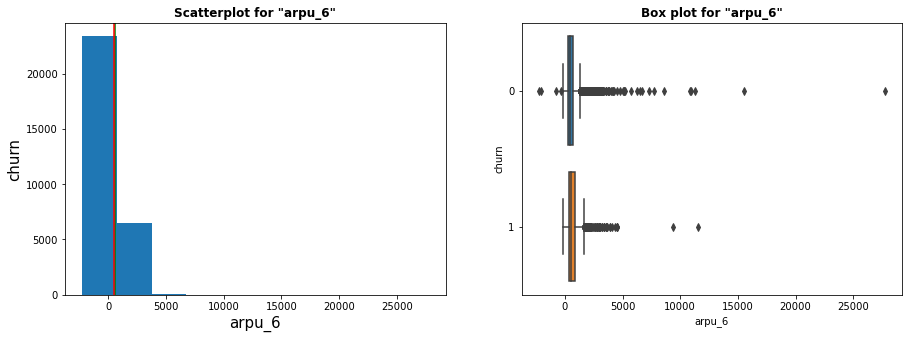

Skewness 11.56725376967974
Kurtosis 473.6162341299332
percentile value  ::
 0.05      97.68205
0.95    1240.89370
0.99    1985.12082
Name: arpu_6, dtype: float64
----------------------------------------------------------------------------------------------------


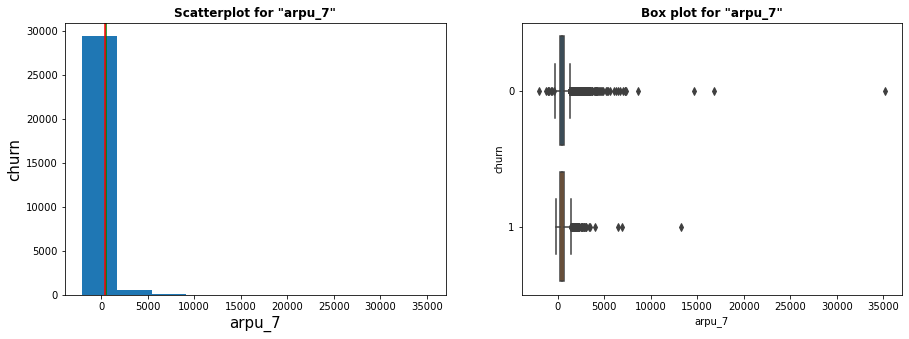

Skewness 16.835222537223814
Kurtosis 950.483378675566
percentile value  ::
 0.05      95.70435
0.95    1260.77045
0.99    1999.50044
Name: arpu_7, dtype: float64
----------------------------------------------------------------------------------------------------


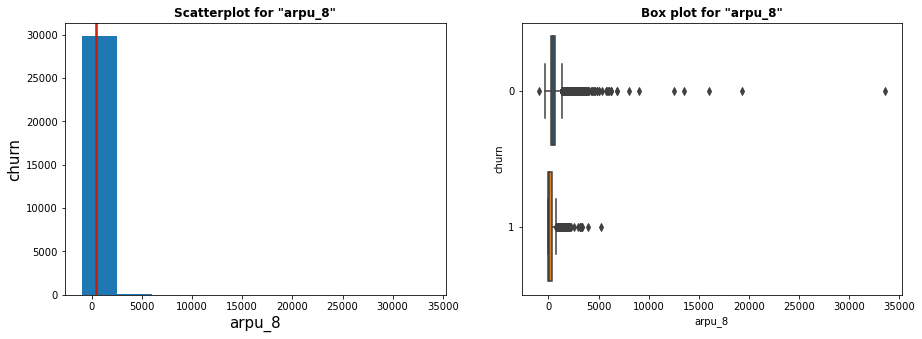

Skewness 15.100514269899618
Kurtosis 747.8886087853047
percentile value  ::
 0.05       7.90000
0.95    1252.52510
0.99    1983.51425
Name: arpu_8, dtype: float64
----------------------------------------------------------------------------------------------------


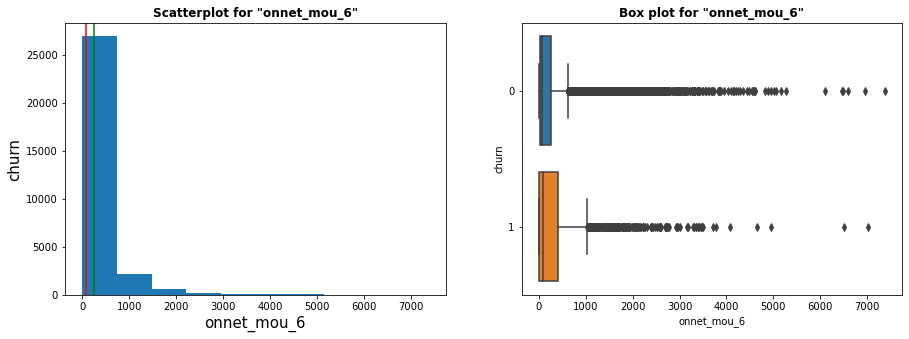

Skewness 4.107233792716931
Kurtosis 27.34702871052193
percentile value  ::
 0.05       0.0000
0.95    1128.4025
0.99    2151.7812
Name: onnet_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


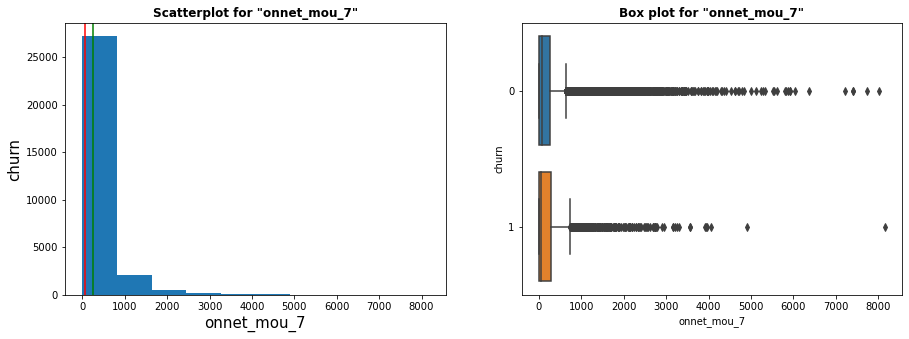

Skewness 4.326117870756088
Kurtosis 31.933230070296755
percentile value  ::
 0.05       0.0000
0.95    1171.1700
0.99    2203.8878
Name: onnet_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


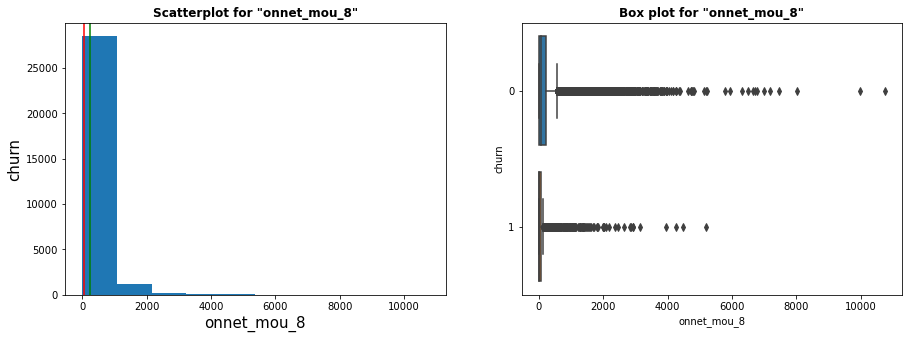

Skewness 5.19514813850634
Kurtosis 50.11814556126365
percentile value  ::
 0.05       0.0000
0.95    1055.9610
0.99    2137.0835
Name: onnet_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


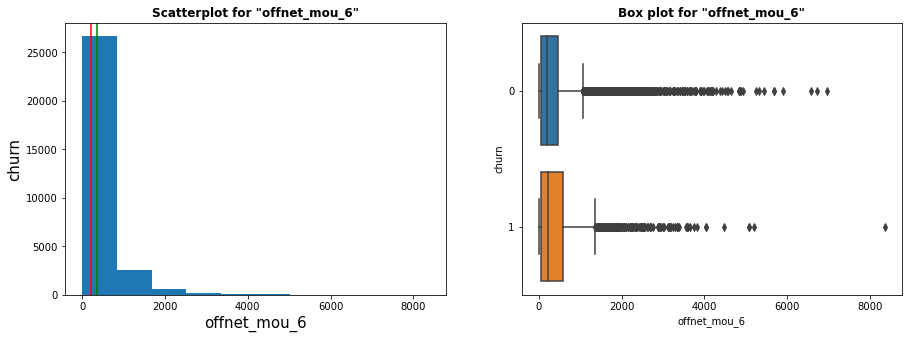

Skewness 3.440314403599367
Kurtosis 20.66485728453485
percentile value  ::
 0.05       0.0000
0.95    1248.6050
0.99    2326.4433
Name: offnet_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


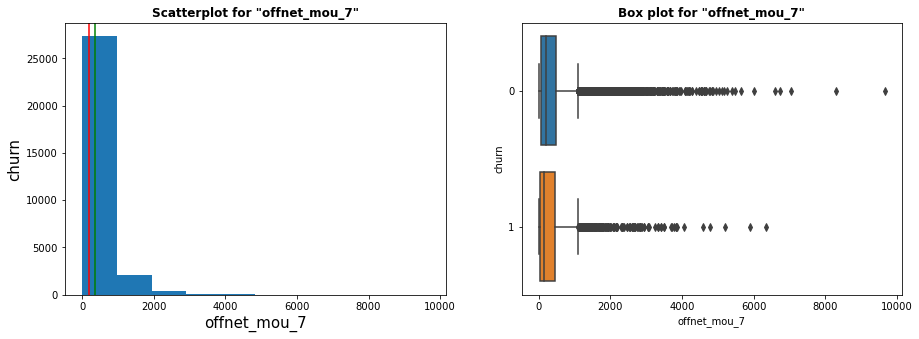

Skewness 3.680841157042677
Kurtosis 24.82711625224232
percentile value  ::
 0.05       0.0000
0.95    1263.9410
0.99    2410.8952
Name: offnet_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


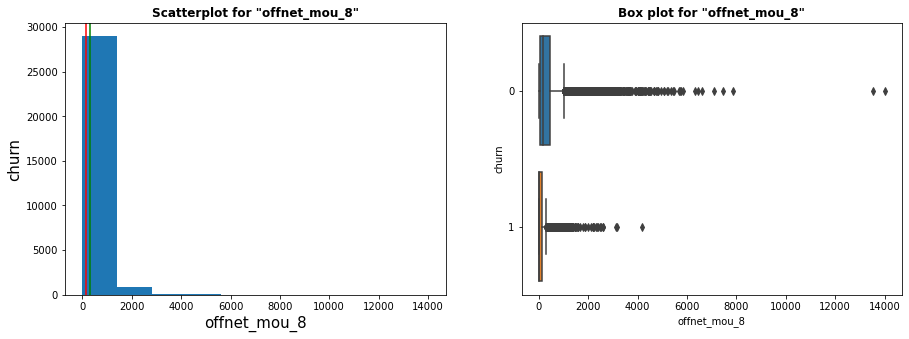

Skewness 5.079088771876882
Kurtosis 65.08229828502141
percentile value  ::
 0.05       0.0000
0.95    1154.1215
0.99    2190.2420
Name: offnet_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


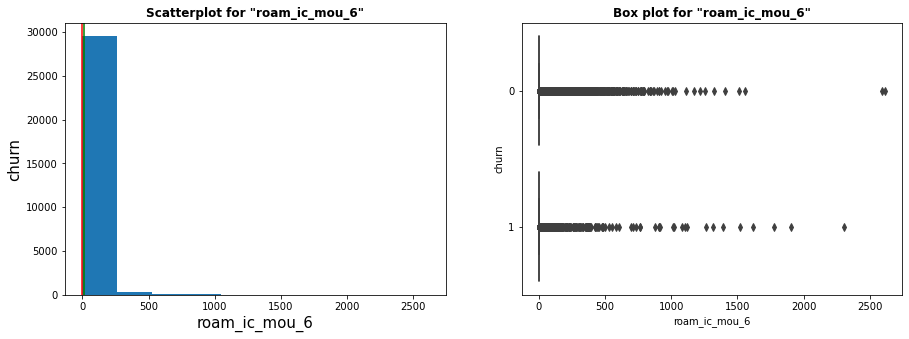

Skewness 11.791338779195259
Kurtosis 230.61839710574938
percentile value  ::
 0.05      0.0000
0.95     81.5435
0.99    334.7955
Name: roam_ic_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


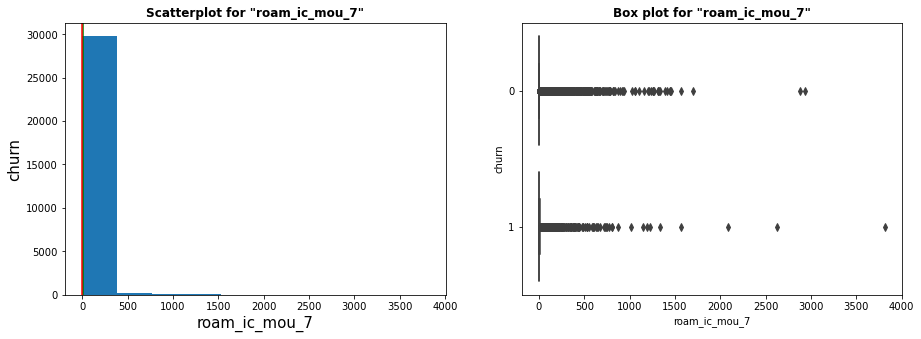

Skewness 17.532412755300065
Kurtosis 518.8611177430023
percentile value  ::
 0.05      0.0000
0.95     53.5410
0.99    275.3845
Name: roam_ic_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


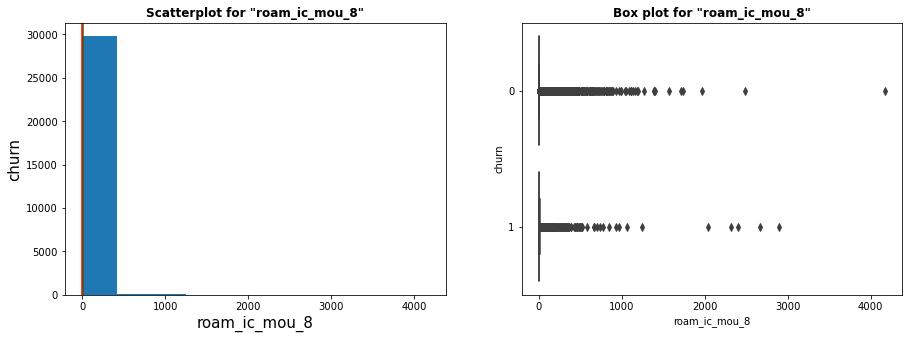

Skewness 19.00090959742557
Kurtosis 618.96384152784
percentile value  ::
 0.05      0.0000
0.95     54.3110
0.99    281.0919
Name: roam_ic_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


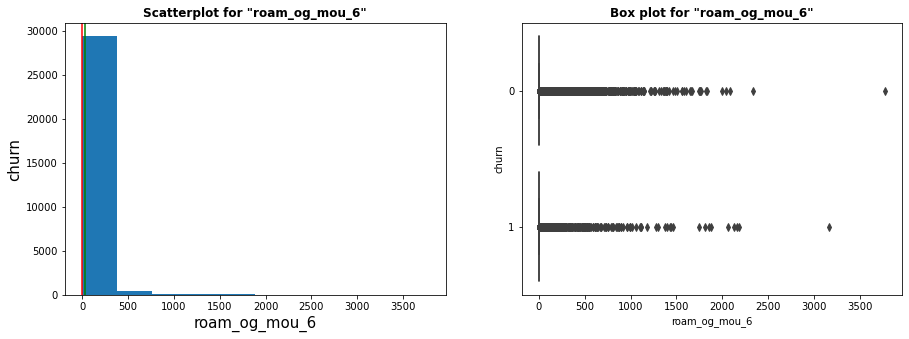

Skewness 9.627109339374831
Kurtosis 144.6112055224479
percentile value  ::
 0.05      0.0000
0.95    139.9890
0.99    529.4132
Name: roam_og_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


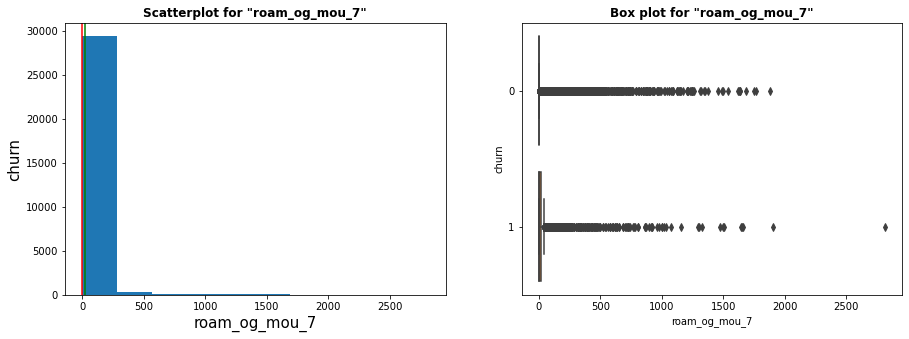

Skewness 9.56742750323198
Kurtosis 127.49147971432365
percentile value  ::
 0.05      0.0000
0.95     99.7380
0.99    432.8353
Name: roam_og_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


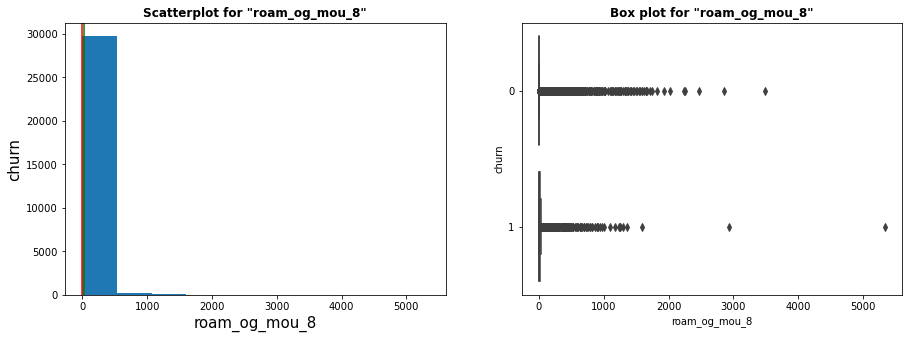

Skewness 14.775114199665847
Kurtosis 404.2529259078284
percentile value  ::
 0.05      0.000
0.95     95.791
0.99    424.133
Name: roam_og_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


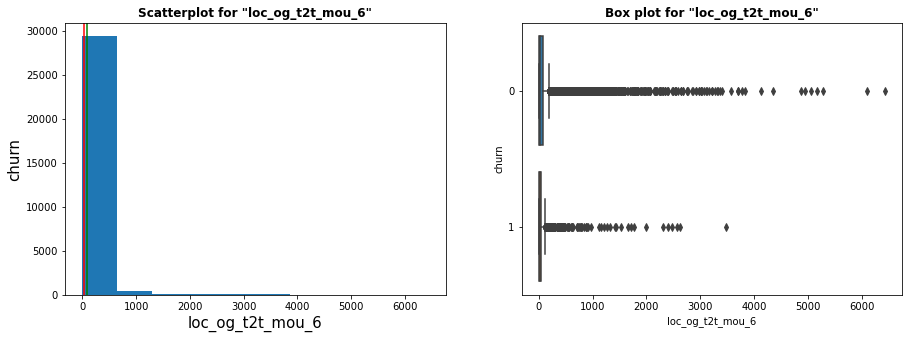

Skewness 9.594536444987833
Kurtosis 142.5347016486203
percentile value  ::
 0.05      0.0000
0.95    318.1950
0.99    999.7187
Name: loc_og_t2t_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


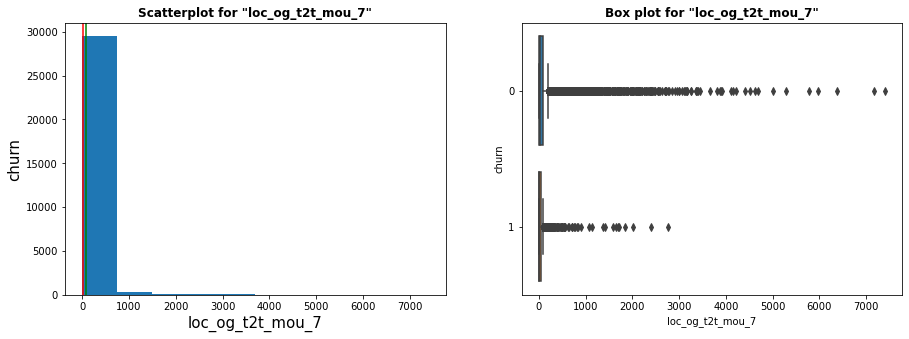

Skewness 10.649347506662066
Kurtosis 180.64020367538336
percentile value  ::
 0.05       0.0000
0.95     318.7285
0.99    1011.9445
Name: loc_og_t2t_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


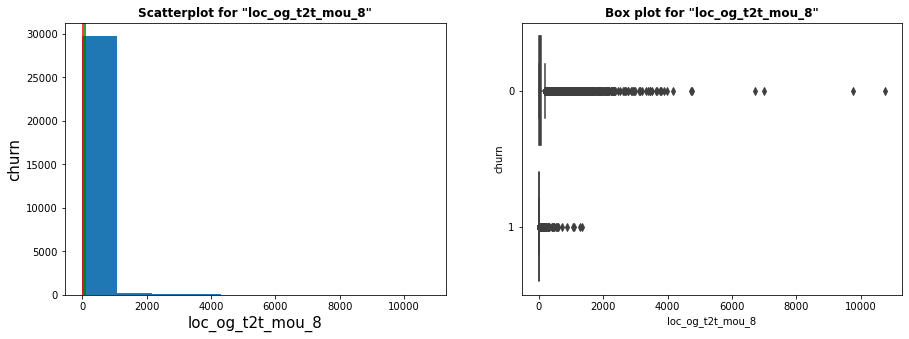

Skewness 14.365703864590772
Kurtosis 410.77200594594035
percentile value  ::
 0.05      0.000
0.95    295.176
0.99    899.162
Name: loc_og_t2t_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


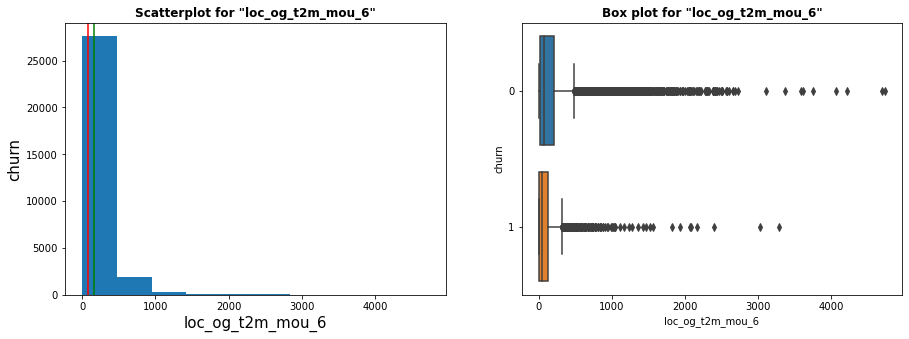

Skewness 4.435291920038959
Kurtosis 35.81065794468026
percentile value  ::
 0.05       0.0000
0.95     596.3210
0.99    1135.8912
Name: loc_og_t2m_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


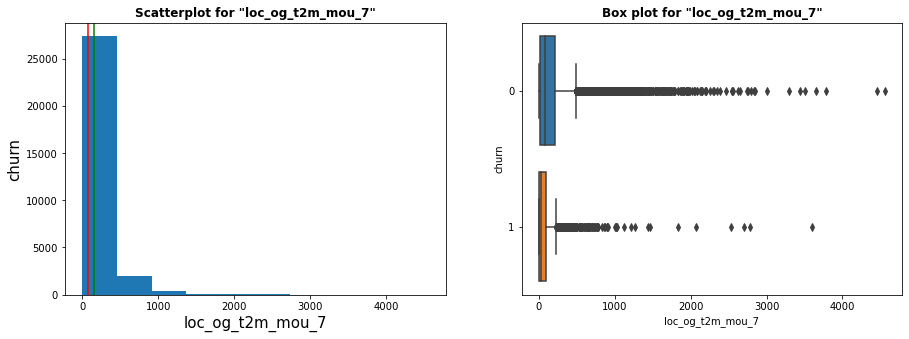

Skewness 4.158175181361819
Kurtosis 32.175170564440336
percentile value  ::
 0.05       0.0000
0.95     595.4450
0.99    1111.3414
Name: loc_og_t2m_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


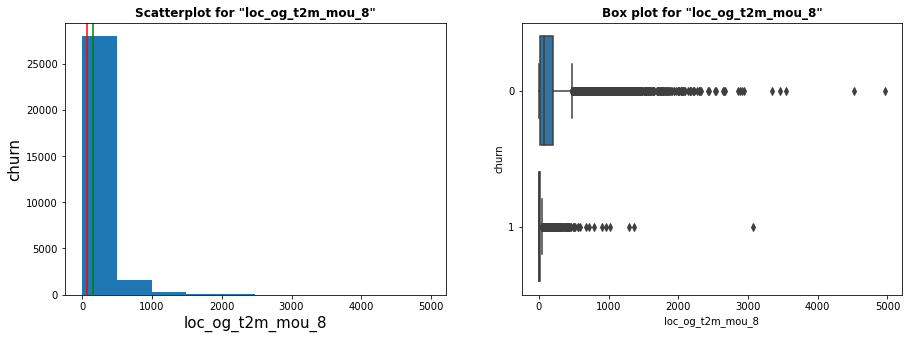

Skewness 4.173250199877564
Kurtosis 33.17925982389315
percentile value  ::
 0.05       0.0000
0.95     565.7270
0.99    1084.8906
Name: loc_og_t2m_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


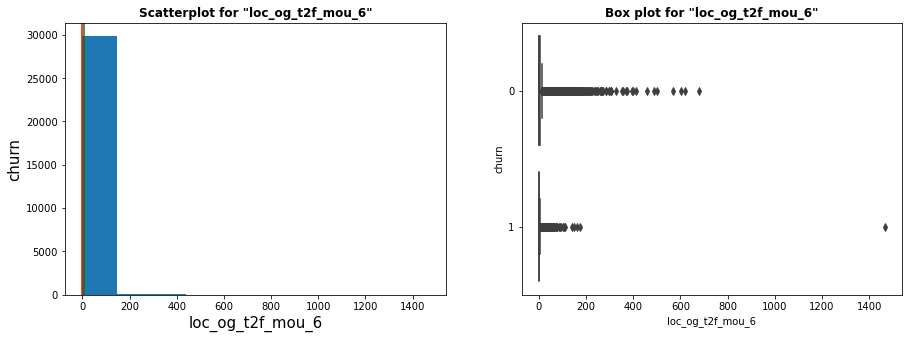

Skewness 18.688714520426608
Kurtosis 824.9122569440473
percentile value  ::
 0.05     0.0000
0.95    29.6805
0.99    84.7925
Name: loc_og_t2f_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


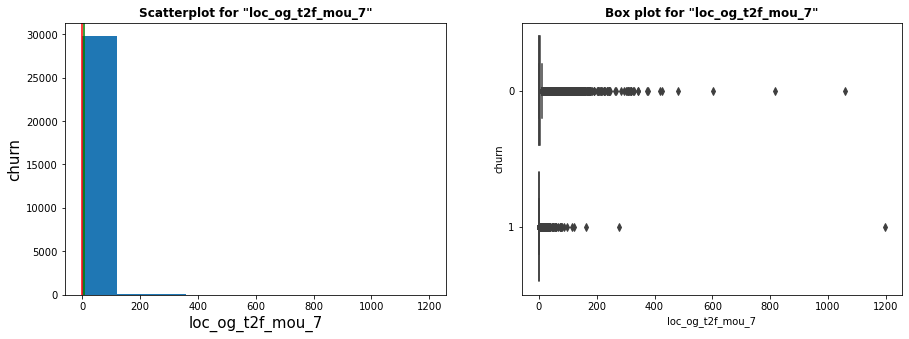

Skewness 17.13302008676399
Kurtosis 631.517914434525
percentile value  ::
 0.05     0.0000
0.95    30.2900
0.99    85.6102
Name: loc_og_t2f_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


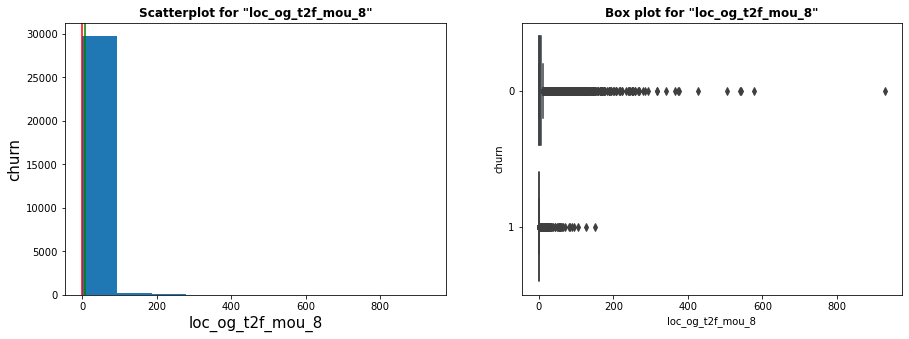

Skewness 12.647729403349
Kurtosis 335.5597936956361
percentile value  ::
 0.05     0.0000
0.95    27.7100
0.99    80.8622
Name: loc_og_t2f_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


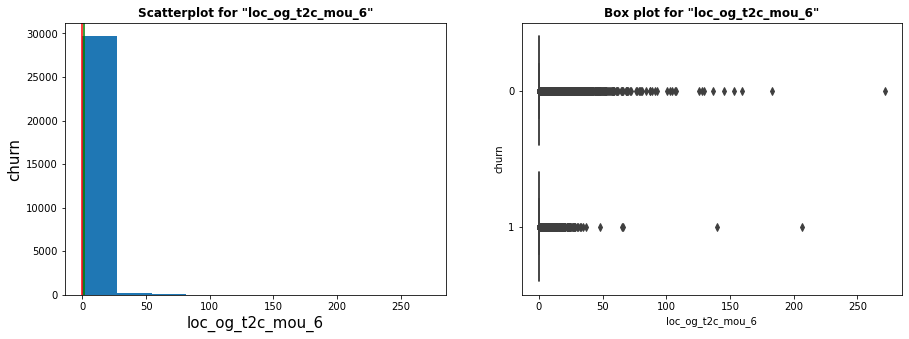

Skewness 12.652263659601944
Kurtosis 303.1953839969325
percentile value  ::
 0.05     0.0000
0.95     8.8110
0.99    24.7303
Name: loc_og_t2c_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


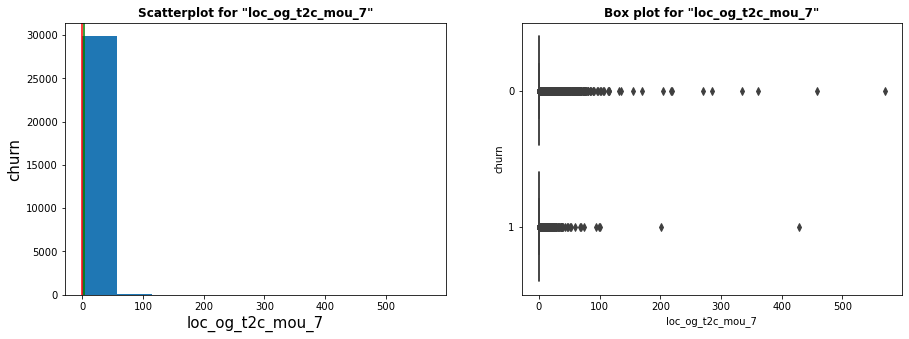

Skewness 26.21831734108078
Kurtosis 1172.391593142505
percentile value  ::
 0.05     0.0000
0.95    10.1800
0.99    27.5909
Name: loc_og_t2c_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


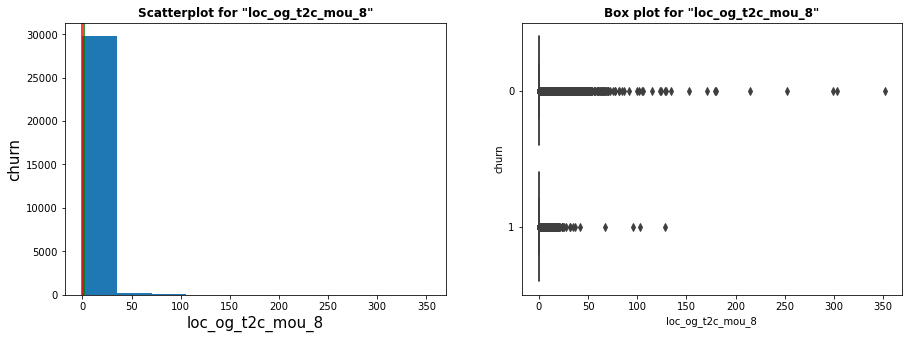

Skewness 17.19480270678506
Kurtosis 557.4861577547807
percentile value  ::
 0.05     0.0000
0.95     9.3800
0.99    27.3902
Name: loc_og_t2c_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


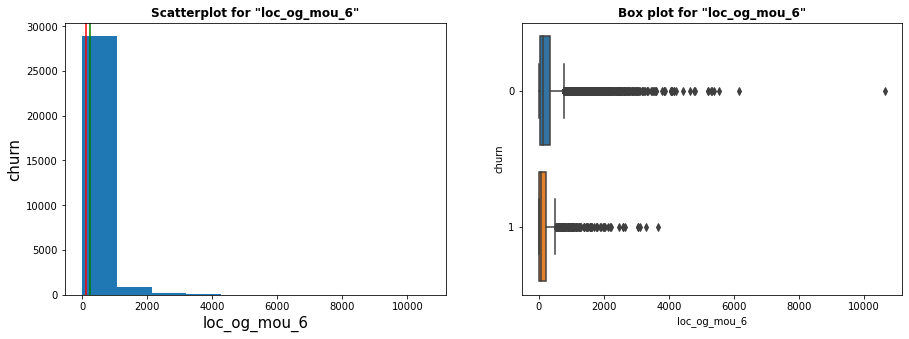

Skewness 4.544691269949033
Kurtosis 45.18158863628531
percentile value  ::
 0.05       0.000
0.95     907.018
0.99    1788.796
Name: loc_og_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


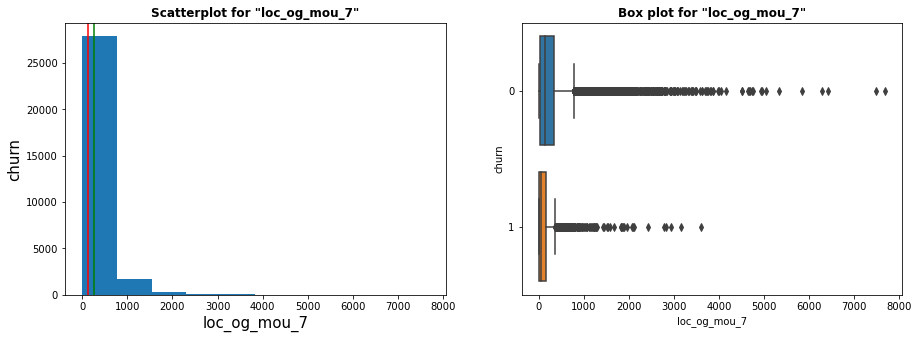

Skewness 4.435755109024912
Kurtosis 37.99223852413978
percentile value  ::
 0.05       0.000
0.95     901.235
0.99    1742.144
Name: loc_og_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


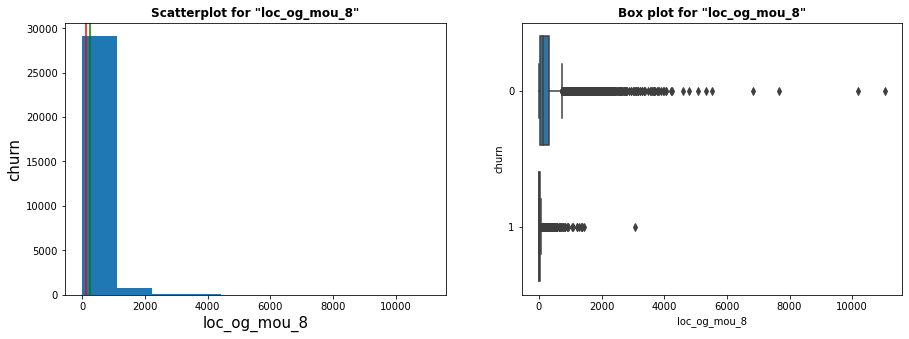

Skewness 5.3949275091884825
Kurtosis 75.64913842785957
percentile value  ::
 0.05       0.0000
0.95     852.0715
0.99    1657.9920
Name: loc_og_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


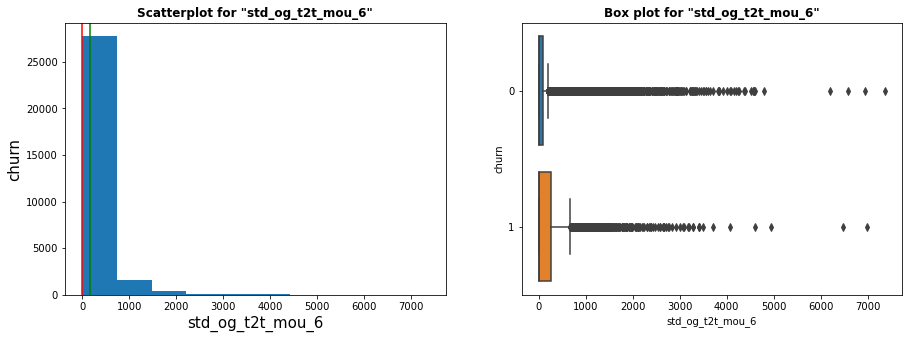

Skewness 4.781396075220927
Kurtosis 36.62296202806362
percentile value  ::
 0.05       0.0000
0.95     954.7230
0.99    1884.2012
Name: std_og_t2t_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


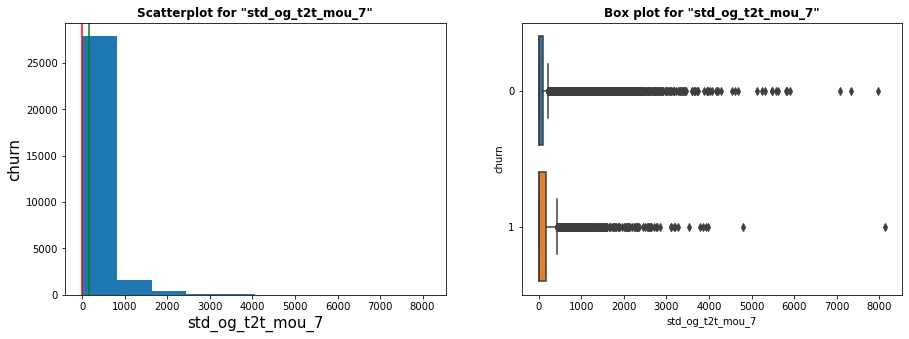

Skewness 4.8591523239005205
Kurtosis 39.584563576318445
percentile value  ::
 0.05       0.0000
0.95     993.8640
0.99    1917.1414
Name: std_og_t2t_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


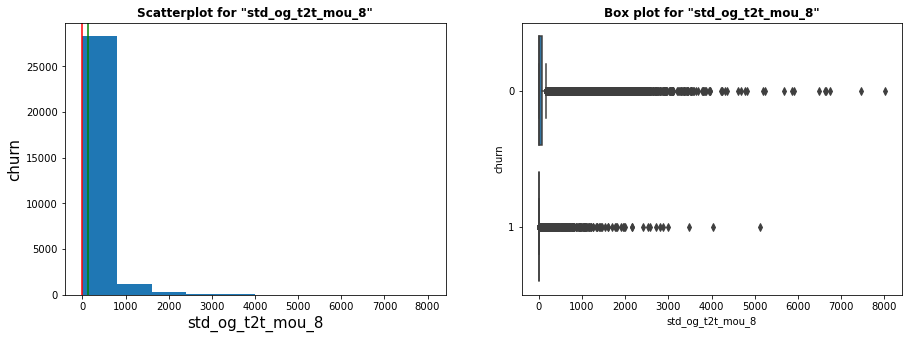

Skewness 5.494869029271813
Kurtosis 48.400110909454924
percentile value  ::
 0.05       0.0000
0.95     861.2850
0.99    1897.4747
Name: std_og_t2t_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


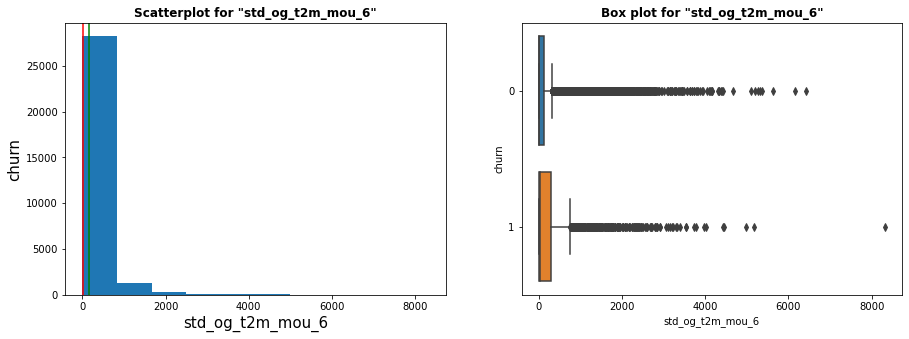

Skewness 4.824673841359545
Kurtosis 36.061177494984
percentile value  ::
 0.05       0.0000
0.95     907.9315
0.99    1950.2750
Name: std_og_t2m_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


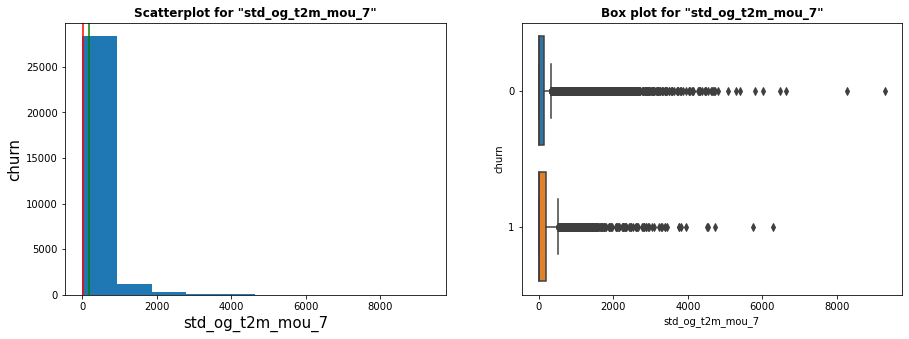

Skewness 5.049328115102521
Kurtosis 41.31579824443687
percentile value  ::
 0.05       0.0000
0.95     955.9435
0.99    2112.6927
Name: std_og_t2m_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


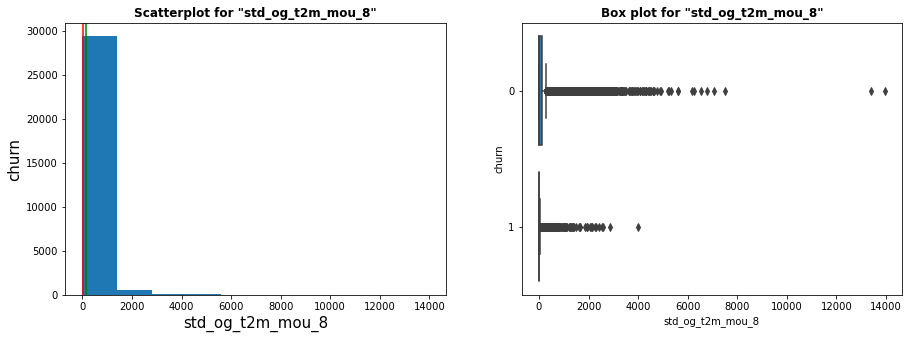

Skewness 7.558626744672649
Kurtosis 125.88436785551829
percentile value  ::
 0.05       0.0000
0.95     815.0445
0.99    1873.7527
Name: std_og_t2m_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


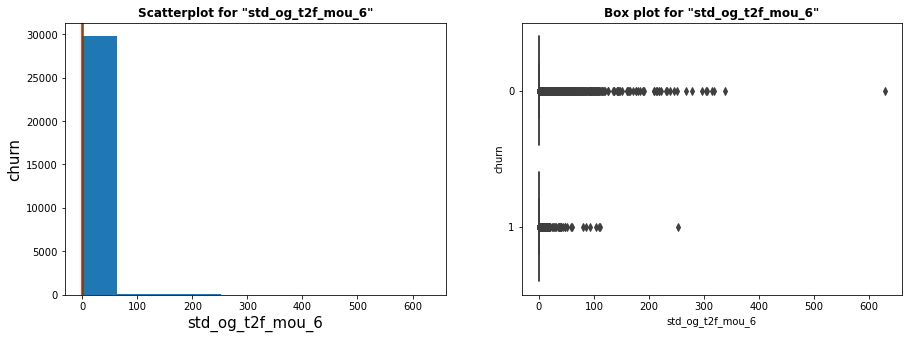

Skewness 18.293062798066202
Kurtosis 552.1262176658852
percentile value  ::
 0.05     0.0000
0.95     6.4400
0.99    38.0802
Name: std_og_t2f_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


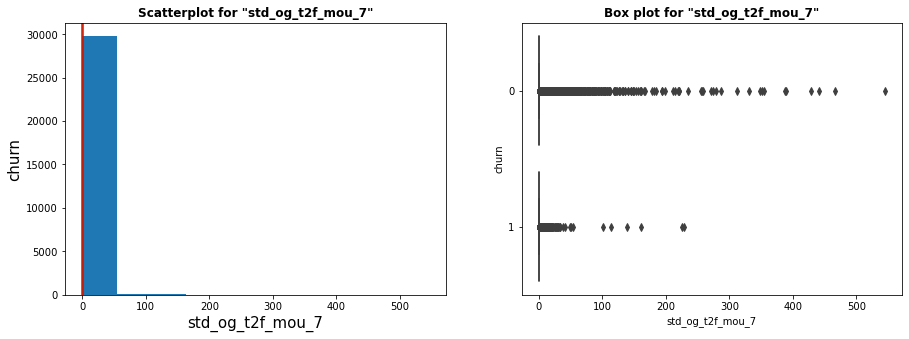

Skewness 19.063673269330984
Kurtosis 512.378359452951
percentile value  ::
 0.05     0.0000
0.95     6.2905
0.99    36.8820
Name: std_og_t2f_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


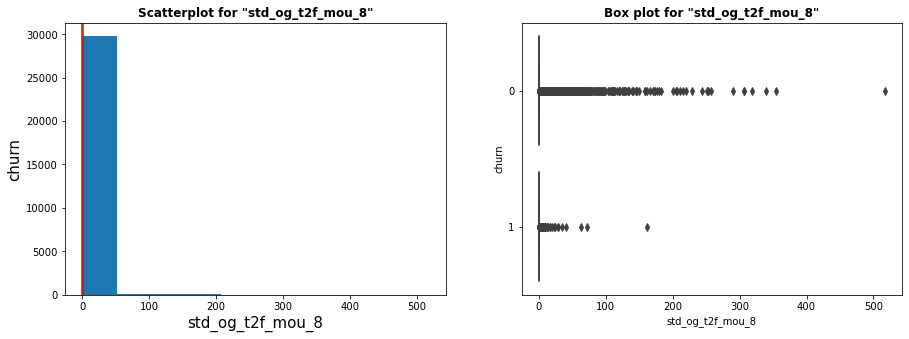

Skewness 18.05196390497243
Kurtosis 490.59918019450566
percentile value  ::
 0.05     0.0000
0.95     5.7610
0.99    33.5815
Name: std_og_t2f_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


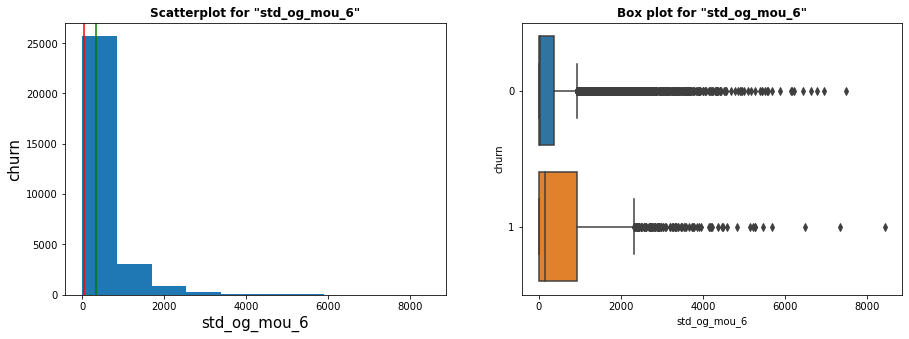

Skewness 3.182047774314133
Kurtosis 15.4499308051625
percentile value  ::
 0.05       0.0000
0.95    1549.0325
0.99    2744.5413
Name: std_og_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


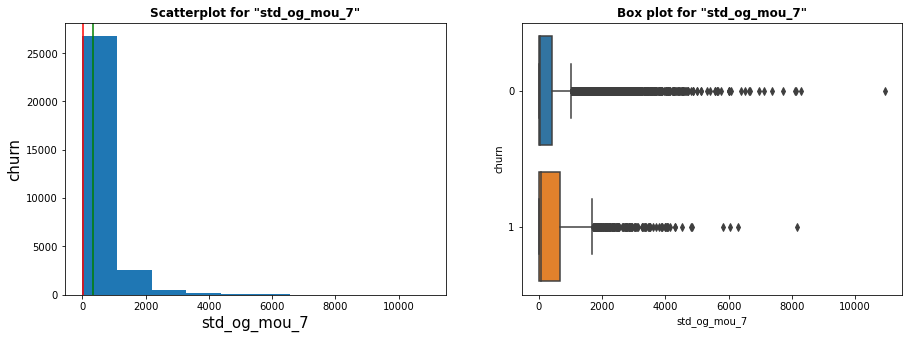

Skewness 3.3317284988243756
Kurtosis 18.455800604335938
percentile value  ::
 0.05       0.000
0.95    1605.397
0.99    2862.617
Name: std_og_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


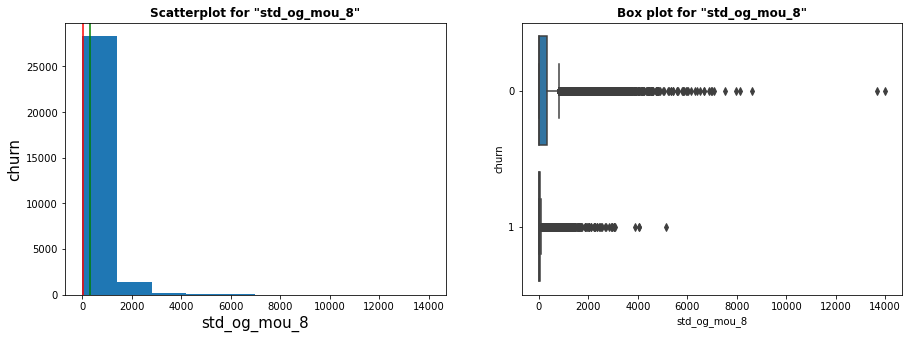

Skewness 4.316938599011272
Kurtosis 36.782427829250956
percentile value  ::
 0.05       0.0000
0.95    1457.0675
0.99    2754.6202
Name: std_og_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


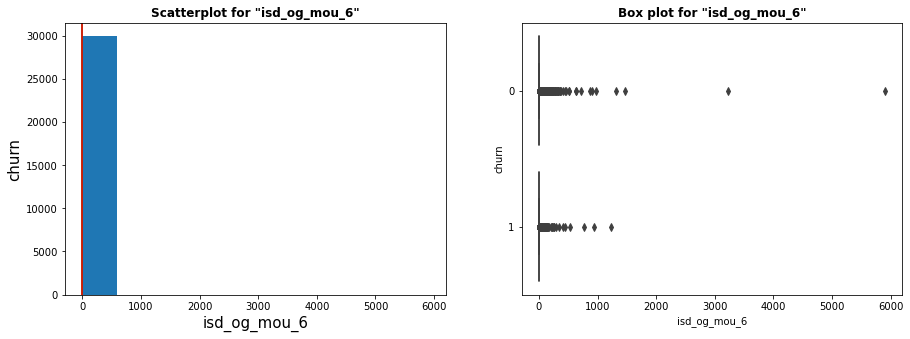

Skewness 87.3688351889657
Kurtosis 10061.971142957349
percentile value  ::
 0.05     0.0000
0.95     0.7100
0.99    36.5127
Name: isd_og_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


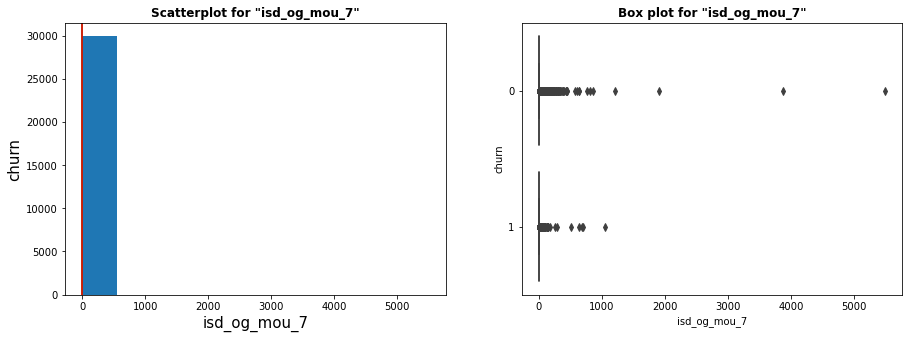

Skewness 83.98381783067448
Kurtosis 8914.80729976348
percentile value  ::
 0.05     0.0000
0.95     0.5800
0.99    36.7801
Name: isd_og_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


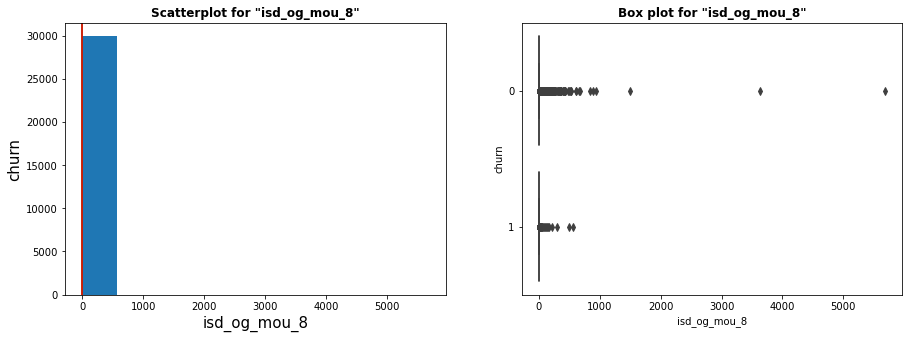

Skewness 89.77497296303595
Kurtosis 10229.092093898205
percentile value  ::
 0.05     0.0000
0.95     0.3100
0.99    27.2811
Name: isd_og_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


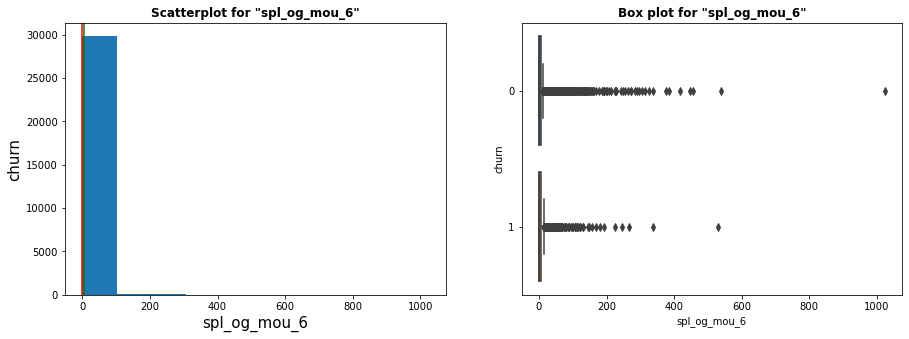

Skewness 15.555375774533514
Kurtosis 546.2132658381022
percentile value  ::
 0.05     0.0000
0.95    26.4910
0.99    67.1615
Name: spl_og_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


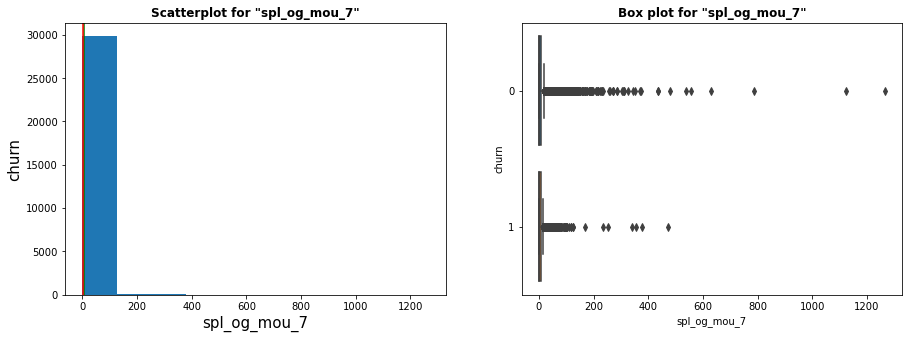

Skewness 19.668552798853046
Kurtosis 789.7192997294081
percentile value  ::
 0.05     0.0000
0.95    30.5900
0.99    75.7417
Name: spl_og_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


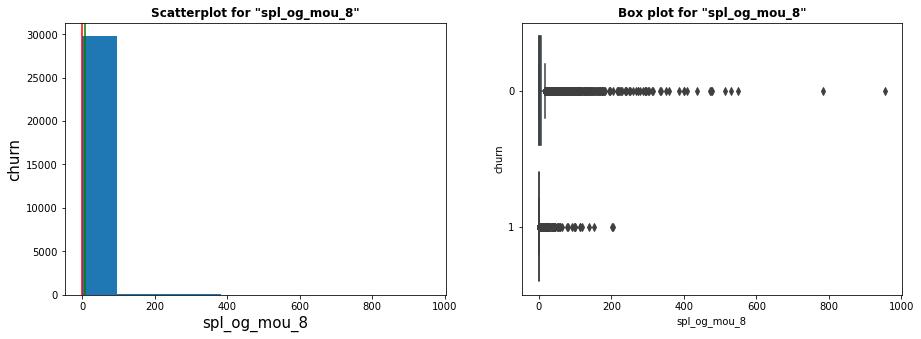

Skewness 14.756833686505374
Kurtosis 409.0127227786207
percentile value  ::
 0.05     0.0000
0.95    28.9100
0.99    69.3808
Name: spl_og_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


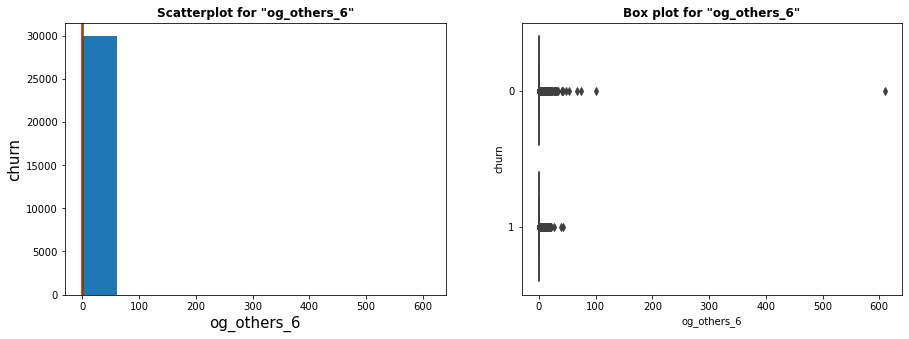

Skewness 110.11214286808644
Kurtosis 16089.128415987005
percentile value  ::
 0.05    0.0000
0.95    3.7100
0.99    8.6301
Name: og_others_6, dtype: float64
----------------------------------------------------------------------------------------------------


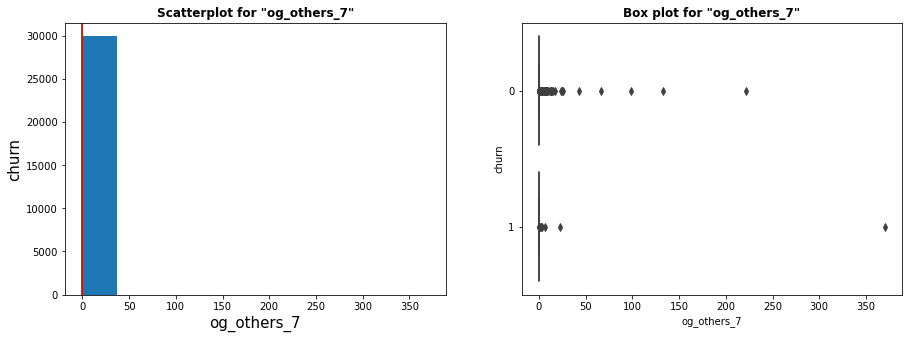

Skewness 106.36852492700525
Kurtosis 12856.567239202695
percentile value  ::
 0.05    0.0
0.95    0.0
0.99    0.0
Name: og_others_7, dtype: float64
----------------------------------------------------------------------------------------------------


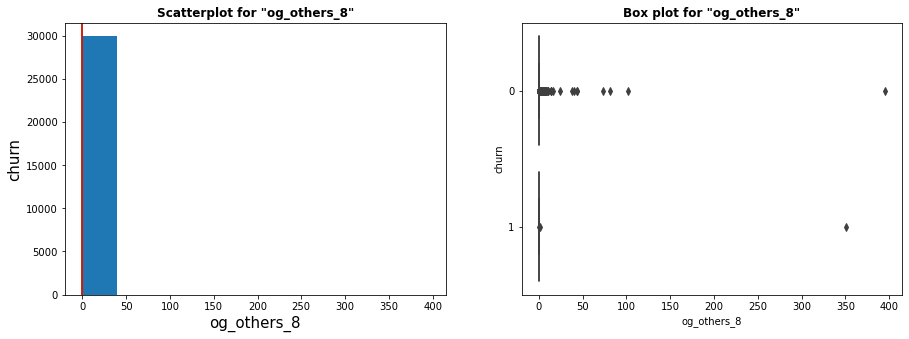

Skewness 106.85621840079163
Kurtosis 12289.395384832593
percentile value  ::
 0.05    0.0
0.95    0.0
0.99    0.0
Name: og_others_8, dtype: float64
----------------------------------------------------------------------------------------------------


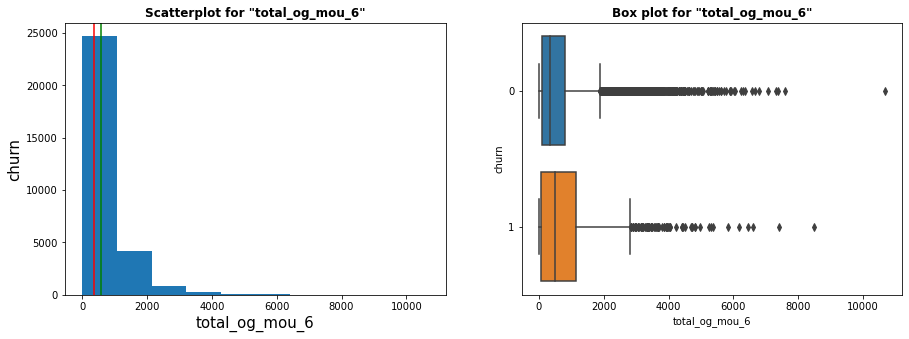

Skewness 2.542830884308224
Kurtosis 11.500342994987482
percentile value  ::
 0.05       0.0000
0.95    1909.2765
0.99    3195.3632
Name: total_og_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


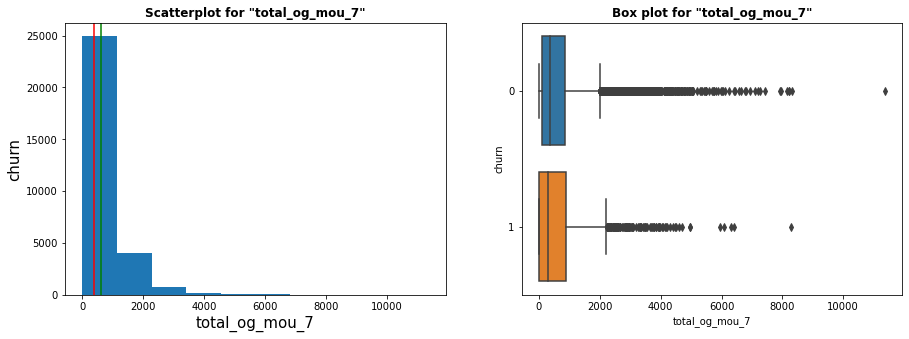

Skewness 2.641208261994795
Kurtosis 12.795019305011383
percentile value  ::
 0.05       0.0000
0.95    1948.4815
0.99    3281.0007
Name: total_og_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


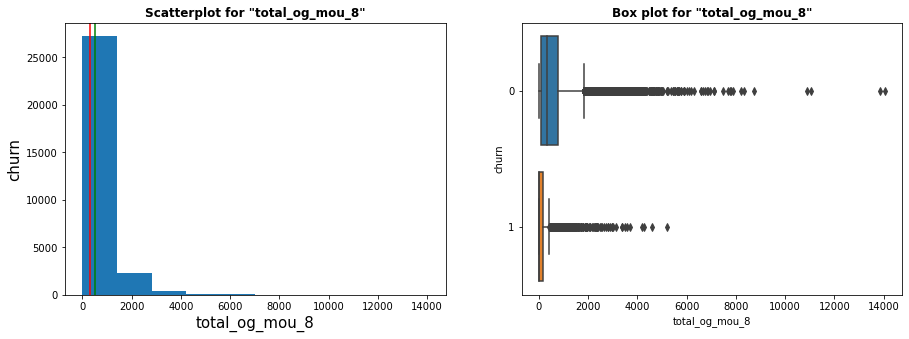

Skewness 3.349071515050229
Kurtosis 24.54518418046363
percentile value  ::
 0.05       0.0000
0.95    1836.5535
0.99    3219.3447
Name: total_og_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


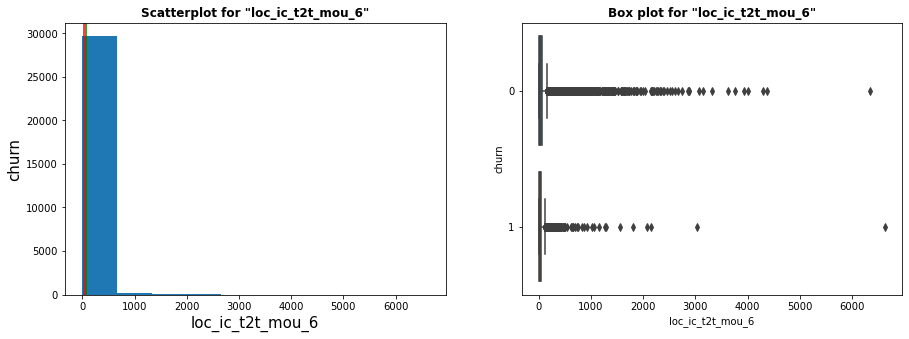

Skewness 12.622753671328269
Kurtosis 283.5492707137051
percentile value  ::
 0.05      0.0000
0.95    233.2925
0.99    643.6966
Name: loc_ic_t2t_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


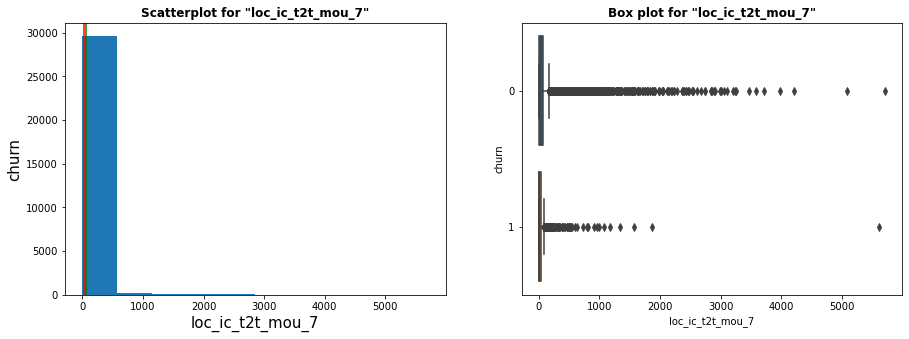

Skewness 11.738652813243407
Kurtosis 220.1967669681956
percentile value  ::
 0.05      0.0000
0.95    233.2115
0.99    662.1066
Name: loc_ic_t2t_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


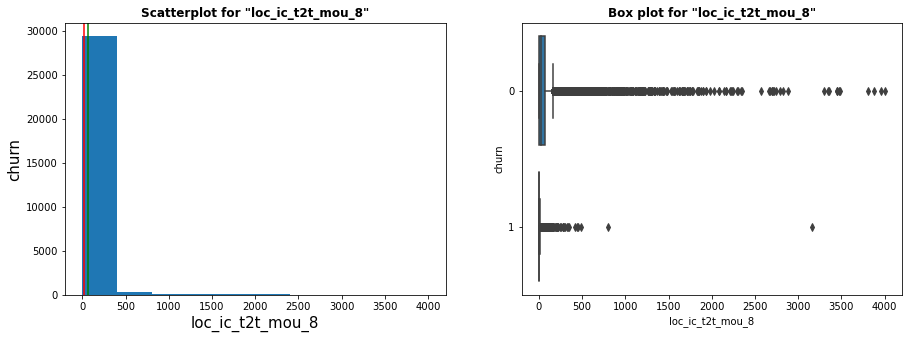

Skewness 10.493213567378314
Kurtosis 164.85301207791713
percentile value  ::
 0.05      0.0000
0.95    223.7815
0.99    623.0858
Name: loc_ic_t2t_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


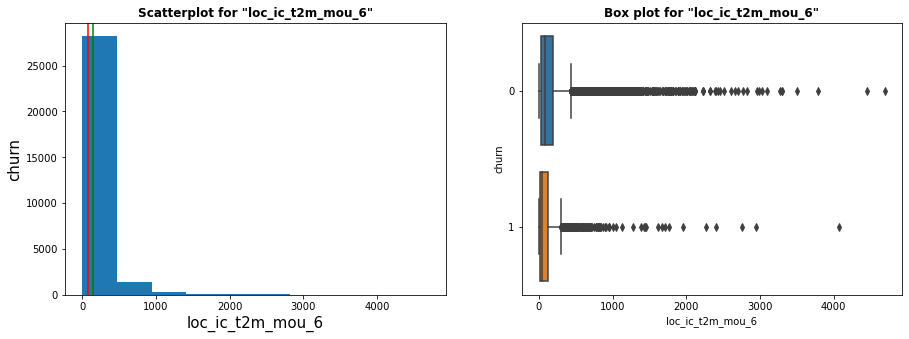

Skewness 5.081792007573383
Kurtosis 48.76741333151122
percentile value  ::
 0.05       0.0000
0.95     504.2665
0.99    1008.8957
Name: loc_ic_t2m_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


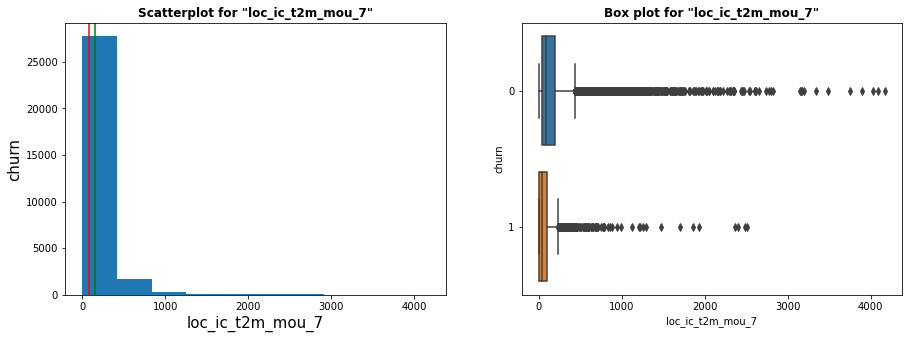

Skewness 5.152304907261206
Kurtosis 48.24696367283975
percentile value  ::
 0.05      0.1600
0.95    505.2890
0.99    999.0548
Name: loc_ic_t2m_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


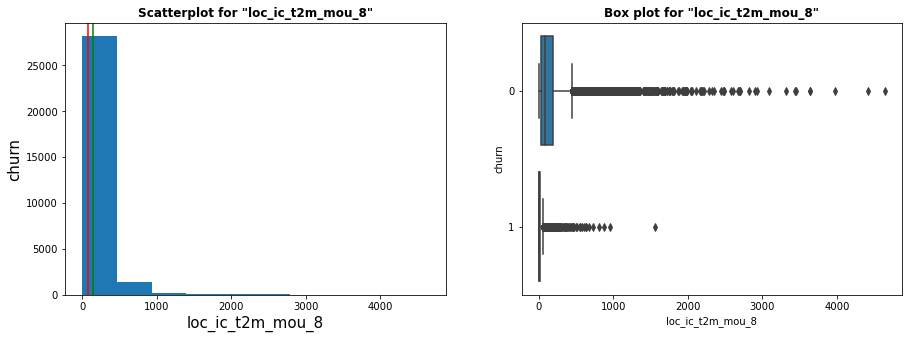

Skewness 4.9940942335426435
Kurtosis 48.80565257557609
percentile value  ::
 0.05      0.0000
0.95    506.0910
0.99    975.4628
Name: loc_ic_t2m_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


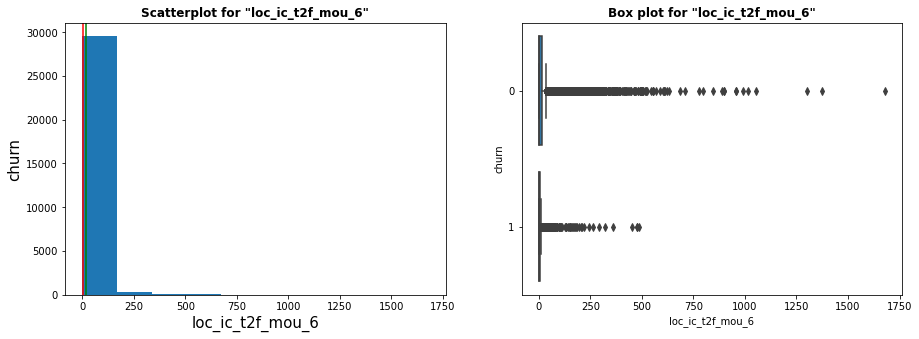

Skewness 10.203822865872457
Kurtosis 189.50471567539432
percentile value  ::
 0.05      0.0000
0.95     73.3315
0.99    198.4612
Name: loc_ic_t2f_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


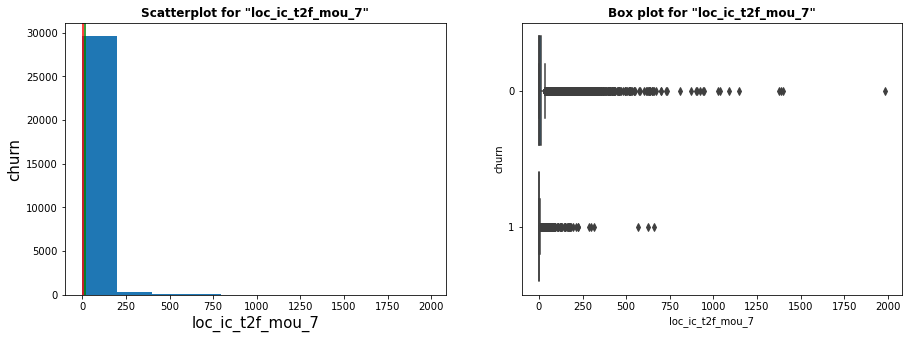

Skewness 10.914676540818721
Kurtosis 219.6011381812363
percentile value  ::
 0.05      0.0000
0.95     75.2665
0.99    209.7173
Name: loc_ic_t2f_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


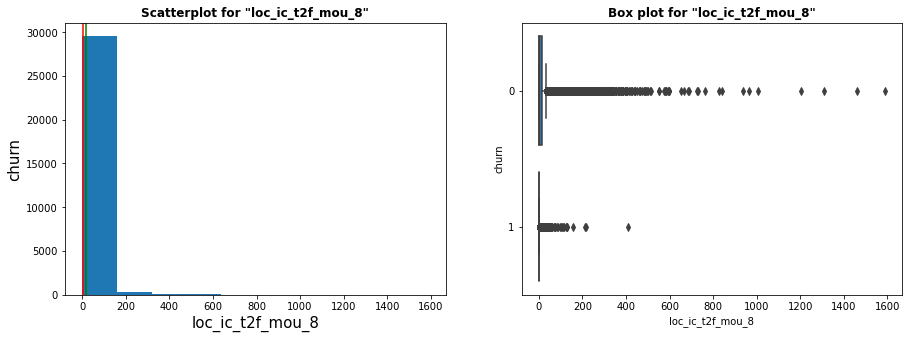

Skewness 10.610786779867054
Kurtosis 209.84829106483403
percentile value  ::
 0.05      0.0000
0.95     68.0815
0.99    188.9937
Name: loc_ic_t2f_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


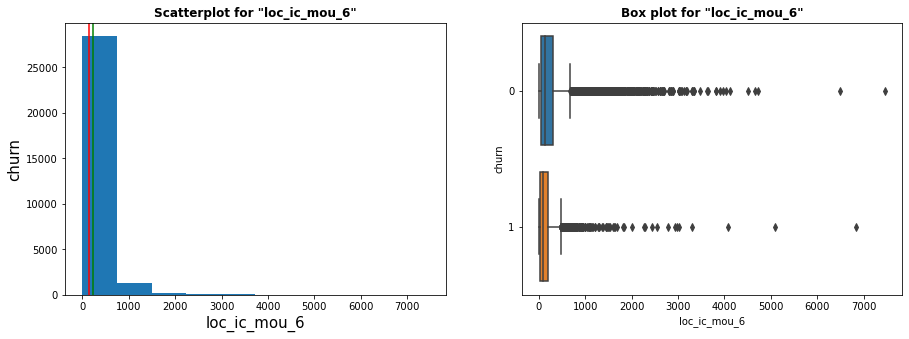

Skewness 4.711692069032696
Kurtosis 46.23826397521693
percentile value  ::
 0.05       0.4100
0.95     753.7010
0.99    1474.1151
Name: loc_ic_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


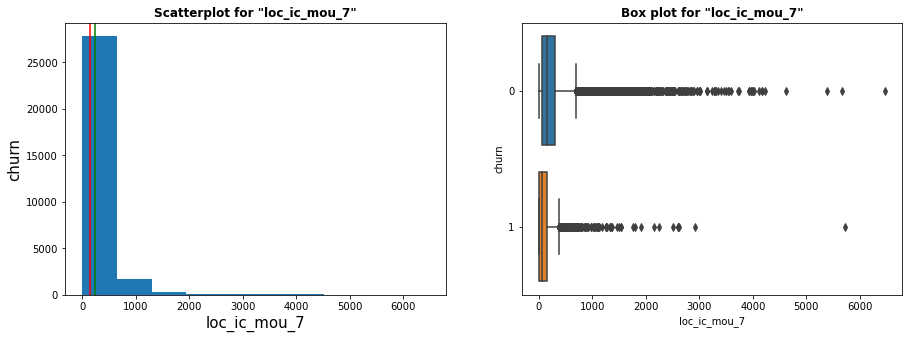

Skewness 4.545590414471346
Kurtosis 38.31813416015863
percentile value  ::
 0.05       0.9300
0.95     770.0865
0.99    1516.0132
Name: loc_ic_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


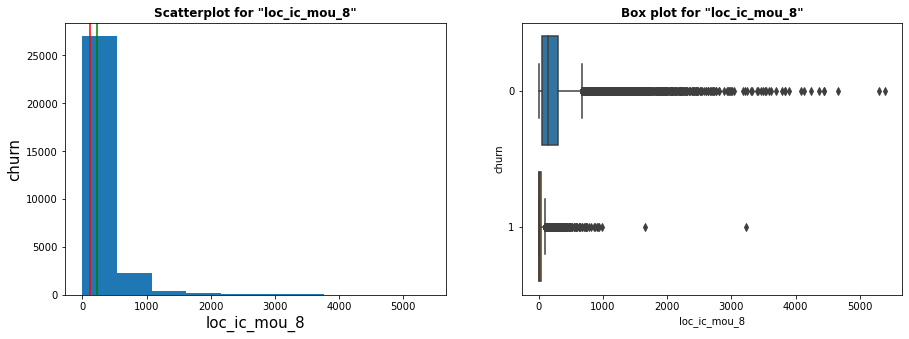

Skewness 4.20104162488163
Kurtosis 32.068764995461066
percentile value  ::
 0.05       0.0000
0.95     755.1970
0.99    1447.6777
Name: loc_ic_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


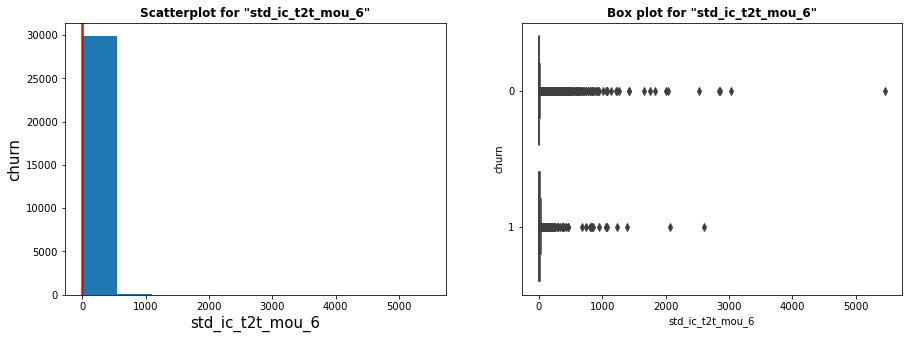

Skewness 27.09068086939486
Kurtosis 1267.7600049075145
percentile value  ::
 0.05      0.0000
0.95     58.8615
0.99    201.5605
Name: std_ic_t2t_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


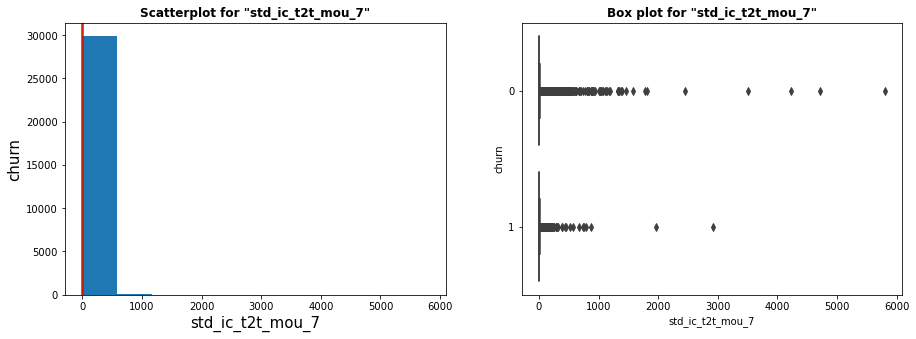

Skewness 31.65798536773716
Kurtosis 1616.3811161225276
percentile value  ::
 0.05      0.0000
0.95     60.7815
0.99    223.0520
Name: std_ic_t2t_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


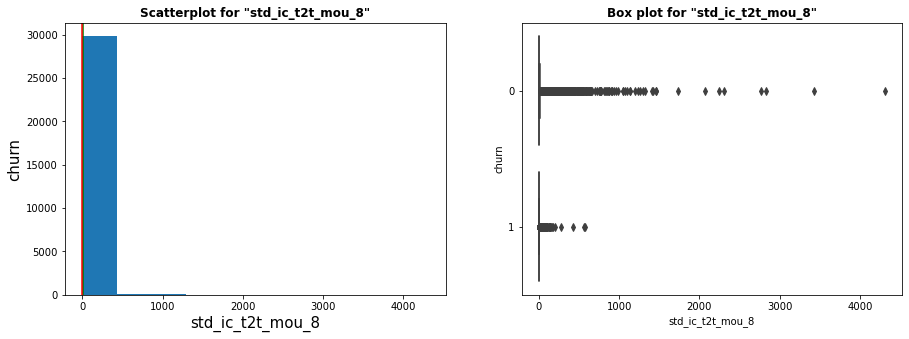

Skewness 23.85961669889539
Kurtosis 948.7623293429016
percentile value  ::
 0.05      0.0000
0.95     55.0805
0.99    214.5825
Name: std_ic_t2t_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


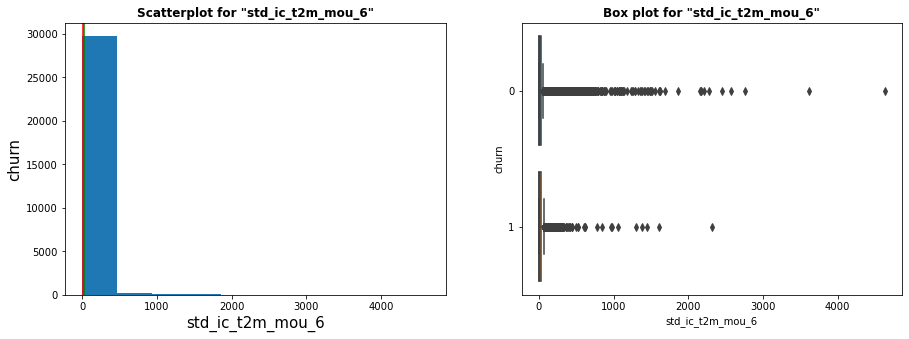

Skewness 14.739647494230544
Kurtosis 384.3933415102306
percentile value  ::
 0.05      0.0000
0.95    117.4115
0.99    358.9303
Name: std_ic_t2m_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


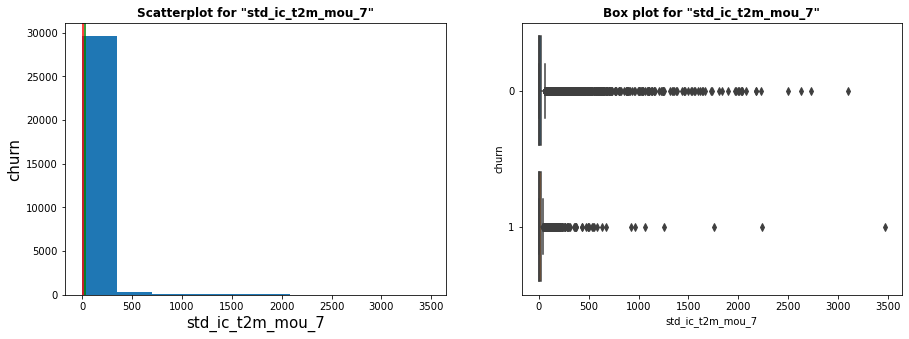

Skewness 12.490640162712797
Kurtosis 232.25040307561224
percentile value  ::
 0.05      0.0000
0.95    118.9425
0.99    385.5803
Name: std_ic_t2m_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


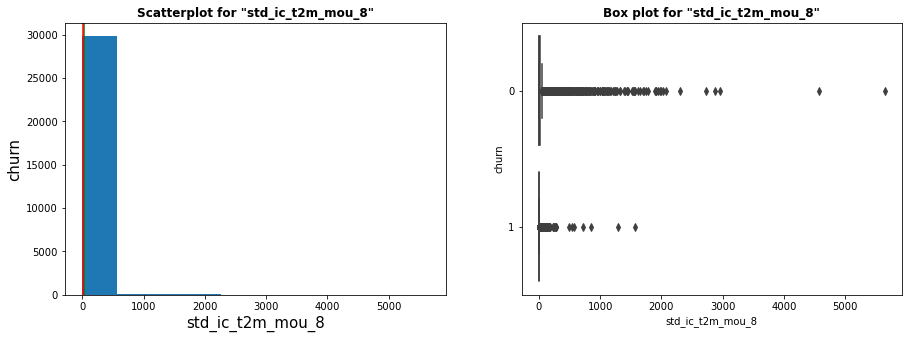

Skewness 18.003084800335113
Kurtosis 607.2495417554089
percentile value  ::
 0.05      0.0000
0.95    110.9900
0.99    348.8405
Name: std_ic_t2m_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


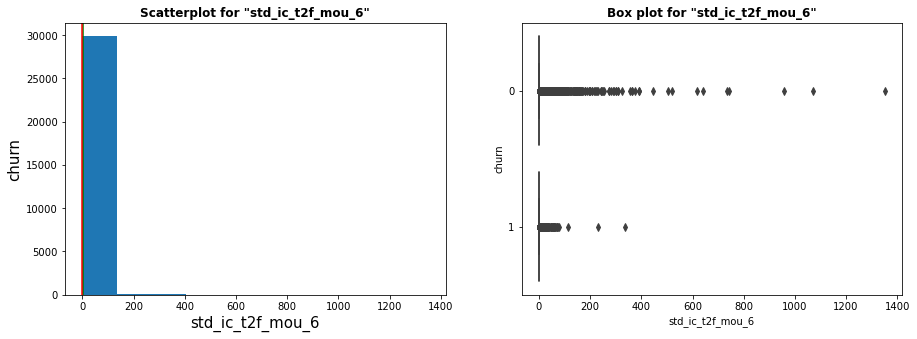

Skewness 30.551630692744563
Kurtosis 1445.4214779234132
percentile value  ::
 0.05     0.0000
0.95    11.3505
0.99    50.9108
Name: std_ic_t2f_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


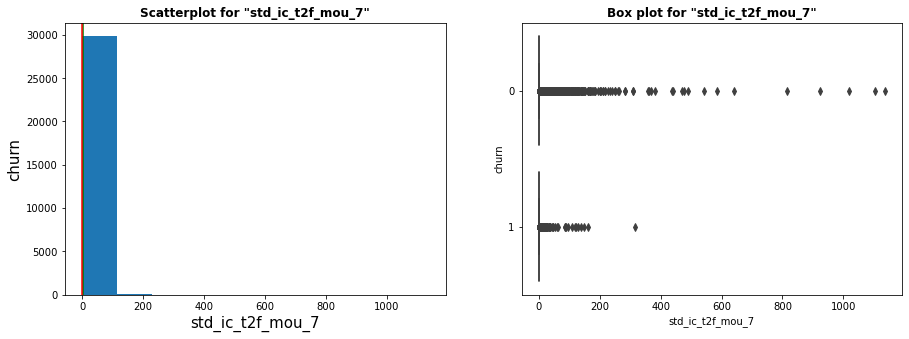

Skewness 29.316942653352662
Kurtosis 1272.0742502906446
percentile value  ::
 0.05     0.0000
0.95    11.7800
0.99    54.3806
Name: std_ic_t2f_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


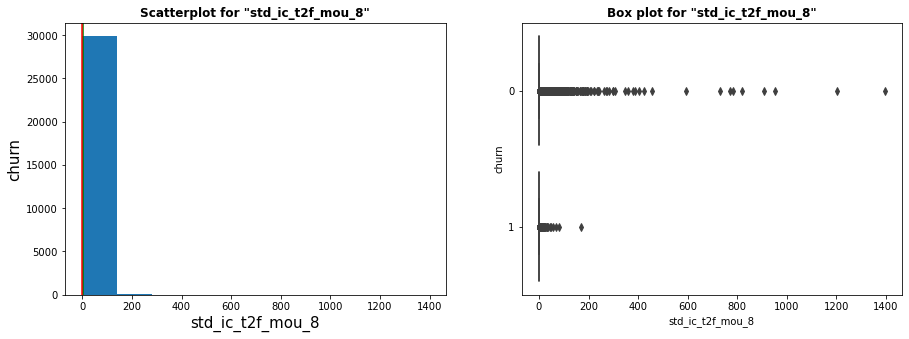

Skewness 34.425209154091995
Kurtosis 1690.3338134825558
percentile value  ::
 0.05     0.0000
0.95    10.7305
0.99    46.2107
Name: std_ic_t2f_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


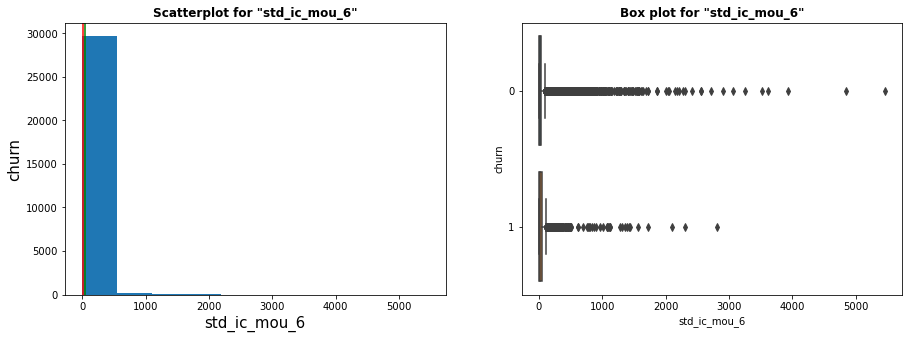

Skewness 12.536930089404434
Kurtosis 277.3365586848659
percentile value  ::
 0.05      0.0000
0.95    182.5350
0.99    539.3858
Name: std_ic_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


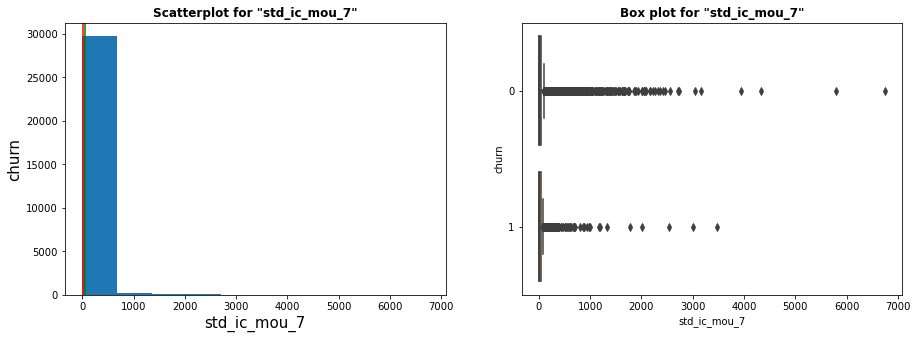

Skewness 13.665938781959037
Kurtosis 354.0474385864667
percentile value  ::
 0.05      0.0000
0.95    191.9185
0.99    580.7437
Name: std_ic_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


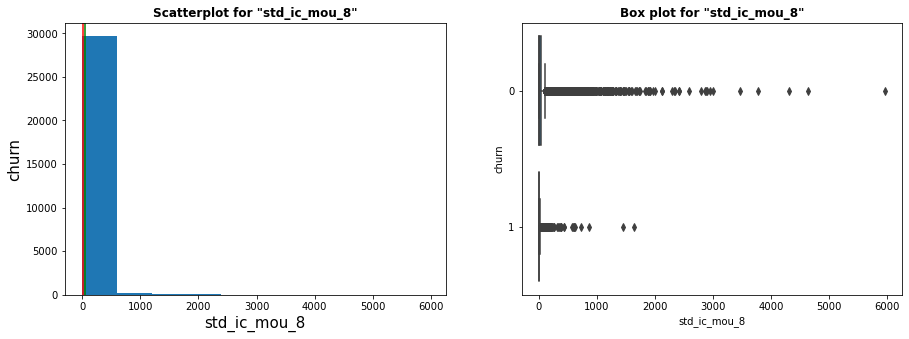

Skewness 13.155367484633114
Kurtosis 310.07721967218157
percentile value  ::
 0.05      0.0000
0.95    178.6115
0.99    534.6320
Name: std_ic_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


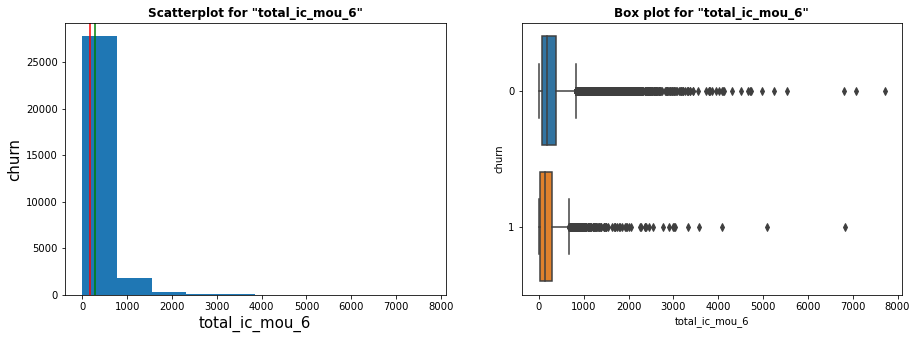

Skewness 4.29117957791547
Kurtosis 37.76026933965882
percentile value  ::
 0.05       0.9800
0.95     915.5295
0.99    1738.5914
Name: total_ic_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


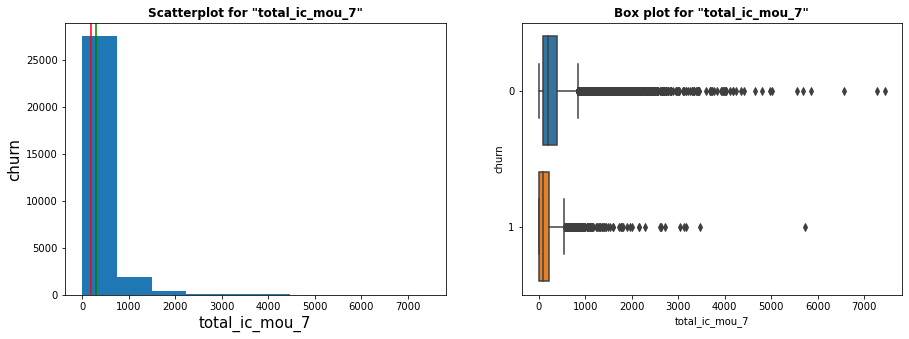

Skewness 4.307341432561154
Kurtosis 35.786729763698766
percentile value  ::
 0.05       1.8995
0.95     924.2005
0.99    1806.9028
Name: total_ic_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


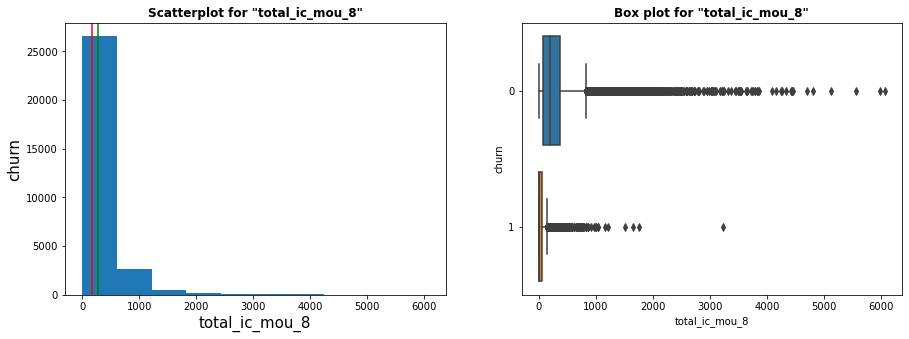

Skewness 3.865801989969384
Kurtosis 27.228826452506596
percentile value  ::
 0.05       0.0000
0.95     909.1785
0.99    1719.4130
Name: total_ic_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


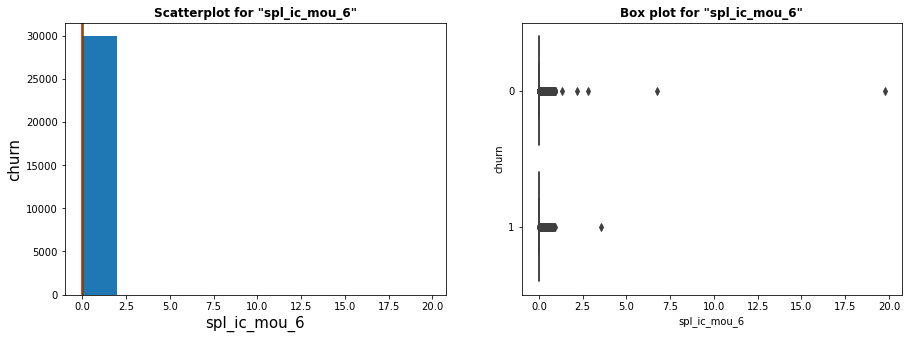

Skewness 42.59167761879706
Kurtosis 4242.079828294597
percentile value  ::
 0.05    0.0000
0.95    0.4000
0.99    0.6301
Name: spl_ic_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


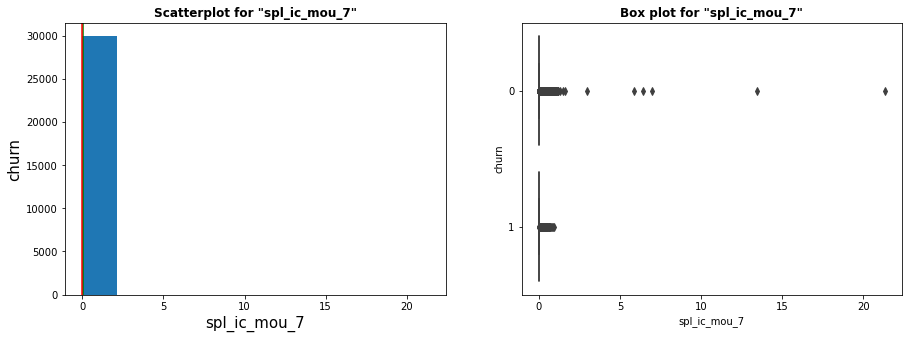

Skewness 72.98245996106954
Kurtosis 7526.301487336724
percentile value  ::
 0.05    0.00
0.95    0.11
0.99    0.48
Name: spl_ic_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


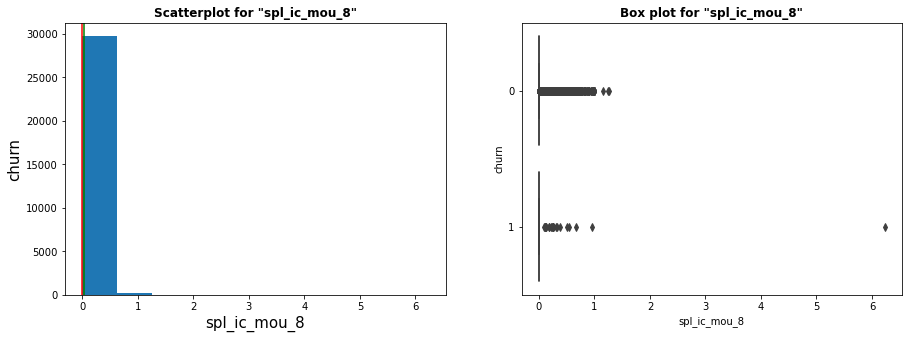

Skewness 10.515903107040872
Kurtosis 386.3971606871306
percentile value  ::
 0.05    0.00
0.95    0.23
0.99    0.53
Name: spl_ic_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


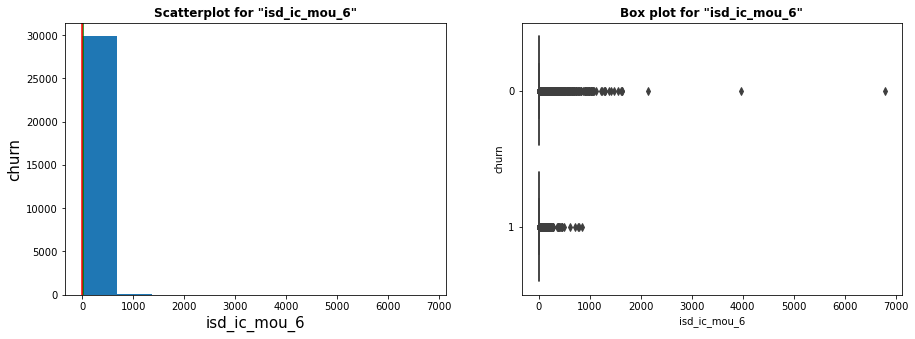

Skewness 35.443592940836304
Kurtosis 2464.159035807618
percentile value  ::
 0.05      0.000
0.95     41.311
0.99    218.985
Name: isd_ic_mou_6, dtype: float64
----------------------------------------------------------------------------------------------------


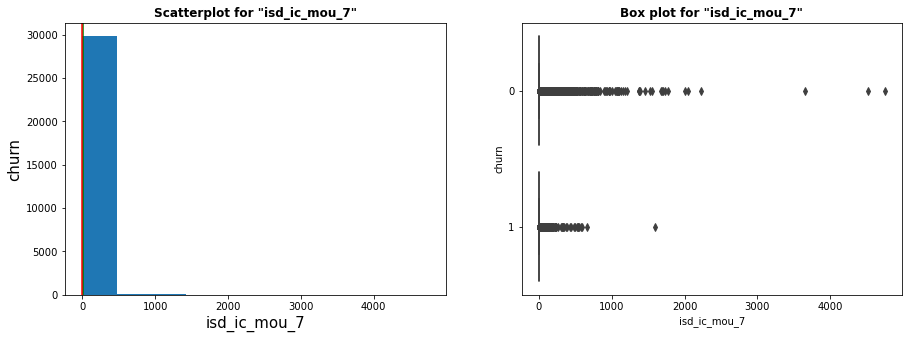

Skewness 25.561488372133024
Kurtosis 1106.7444360301427
percentile value  ::
 0.05      0.0000
0.95     44.9810
0.99    226.3405
Name: isd_ic_mou_7, dtype: float64
----------------------------------------------------------------------------------------------------


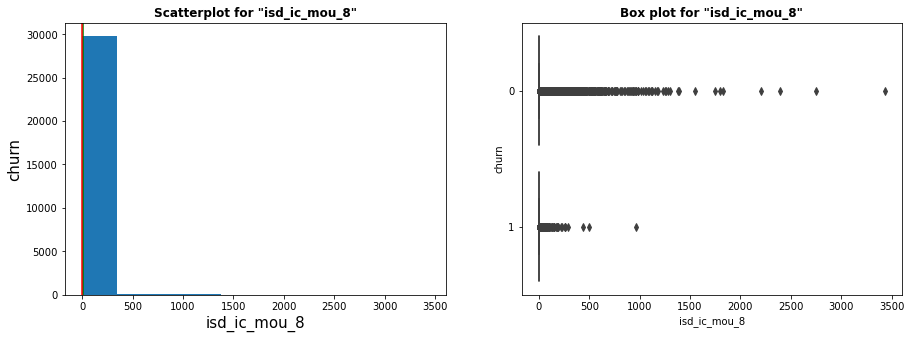

Skewness 17.962403216058387
Kurtosis 517.7383794293195
percentile value  ::
 0.05      0.0000
0.95     40.7305
0.99    225.8137
Name: isd_ic_mou_8, dtype: float64
----------------------------------------------------------------------------------------------------


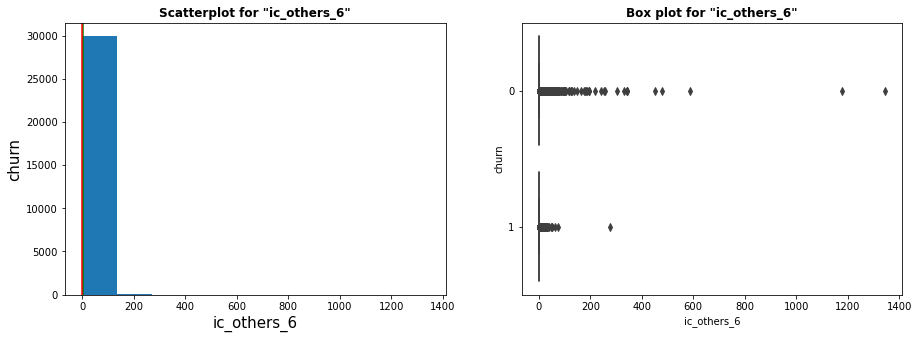

Skewness 59.01350199992355
Kurtosis 4811.879025884231
percentile value  ::
 0.05     0.0000
0.95     3.3500
0.99    19.9602
Name: ic_others_6, dtype: float64
----------------------------------------------------------------------------------------------------


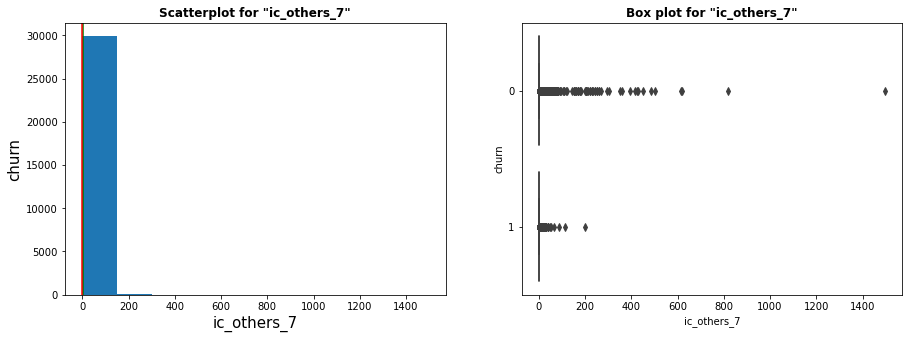

Skewness 45.216257877438096
Kurtosis 3205.2593688166207
percentile value  ::
 0.05     0.0000
0.95     4.4800
0.99    25.1806
Name: ic_others_7, dtype: float64
----------------------------------------------------------------------------------------------------


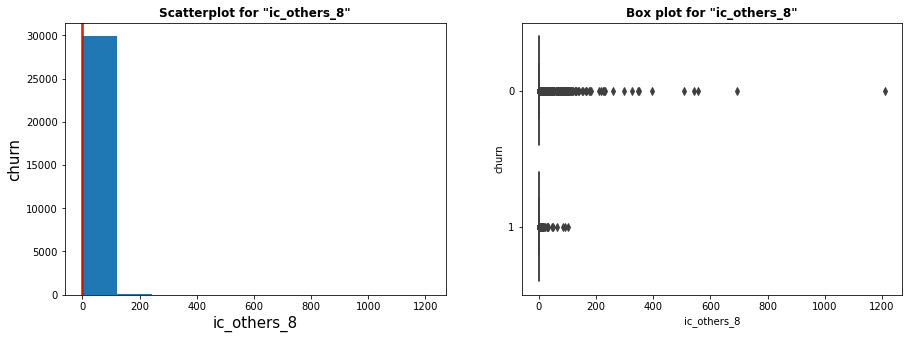

Skewness 47.12817199852233
Kurtosis 3399.847511760743
percentile value  ::
 0.05     0.00
0.95     3.73
0.99    21.53
Name: ic_others_8, dtype: float64
----------------------------------------------------------------------------------------------------


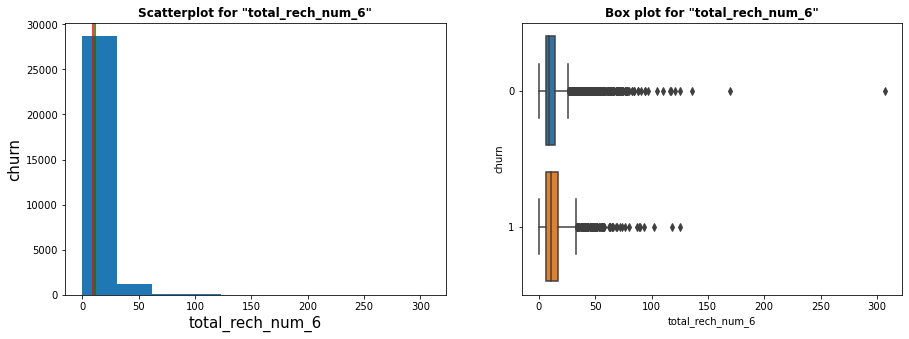

Skewness 3.836758539025465
Kurtosis 48.56646466397885
percentile value  ::
 0.05     3.0
0.95    29.0
0.99    47.0
Name: total_rech_num_6, dtype: float64
----------------------------------------------------------------------------------------------------


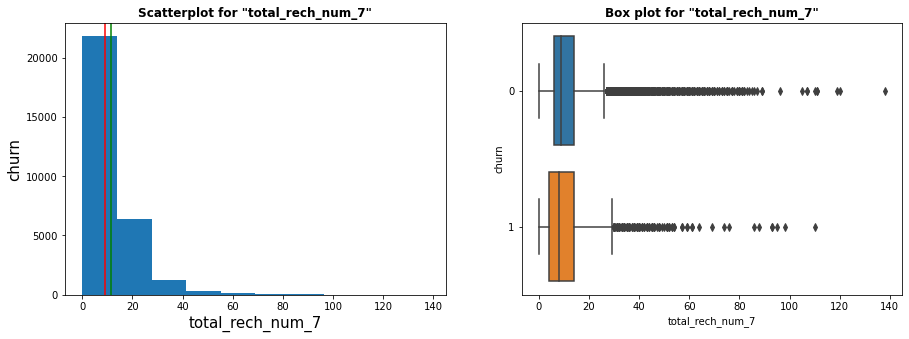

Skewness 2.8189659635574364
Kurtosis 14.202416032616144
percentile value  ::
 0.05     3.0
0.95    29.0
0.99    47.0
Name: total_rech_num_7, dtype: float64
----------------------------------------------------------------------------------------------------


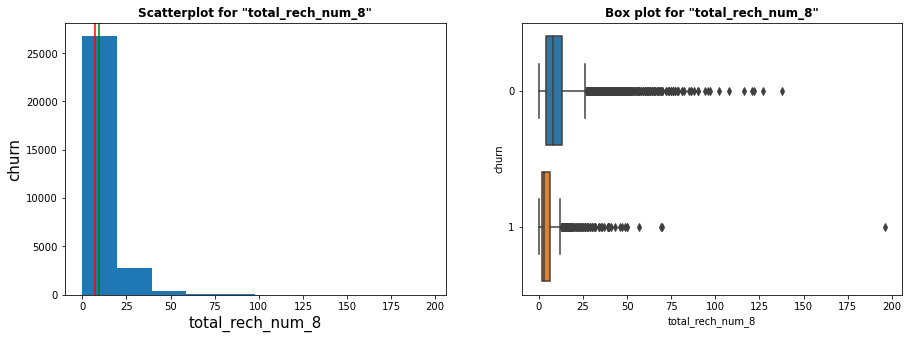

Skewness 3.0201692155114657
Kurtosis 19.441748003403333
percentile value  ::
 0.05     1.00
0.95    27.00
0.99    44.01
Name: total_rech_num_8, dtype: float64
----------------------------------------------------------------------------------------------------


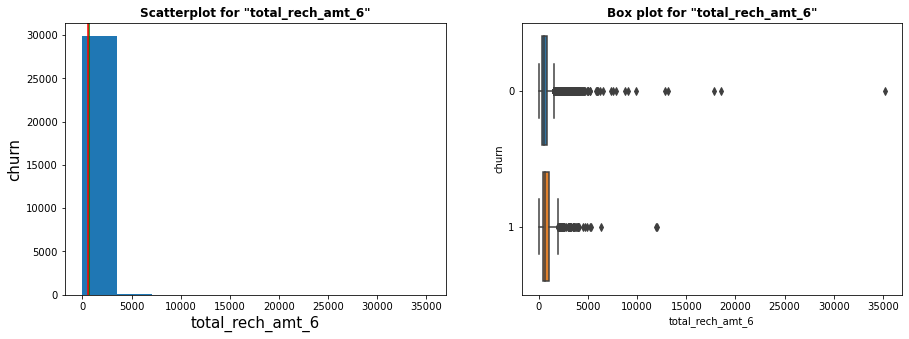

Skewness 12.619287918729547
Kurtosis 551.4733456994755
percentile value  ::
 0.05     100.00
0.95    1480.00
0.99    2376.01
Name: total_rech_amt_6, dtype: float64
----------------------------------------------------------------------------------------------------


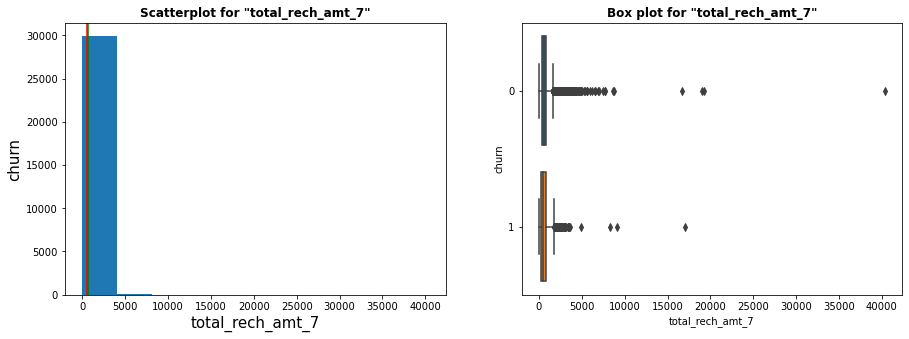

Skewness 15.49766355525485
Kurtosis 795.7230421278283
percentile value  ::
 0.05      93.00
0.95    1510.00
0.99    2427.03
Name: total_rech_amt_7, dtype: float64
----------------------------------------------------------------------------------------------------


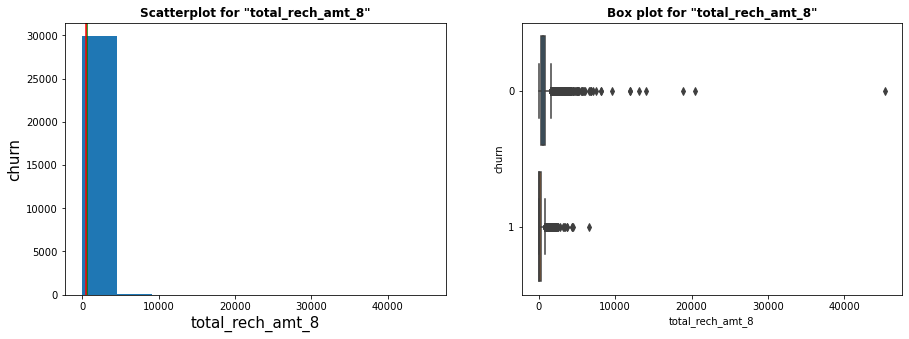

Skewness 17.779829950617497
Kurtosis 1043.7910843683349
percentile value  ::
 0.05       0.0
0.95    1486.0
0.99    2337.0
Name: total_rech_amt_8, dtype: float64
----------------------------------------------------------------------------------------------------


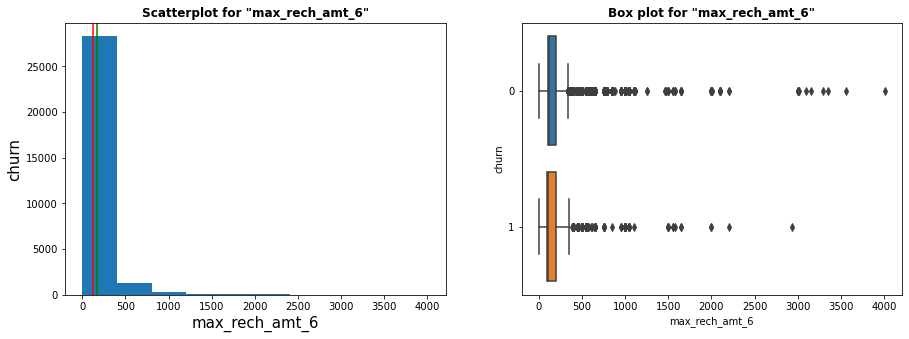

Skewness 5.711292018072602
Kurtosis 63.90146048731055
percentile value  ::
 0.05      25.0
0.95     455.0
0.99    1000.0
Name: max_rech_amt_6, dtype: float64
----------------------------------------------------------------------------------------------------


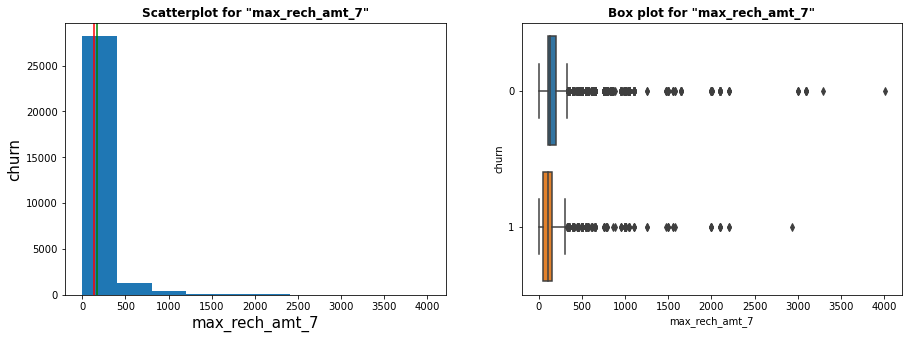

Skewness 5.4806616366852285
Kurtosis 55.24007722878848
percentile value  ::
 0.05      25.0
0.95     459.0
0.99    1000.0
Name: max_rech_amt_7, dtype: float64
----------------------------------------------------------------------------------------------------


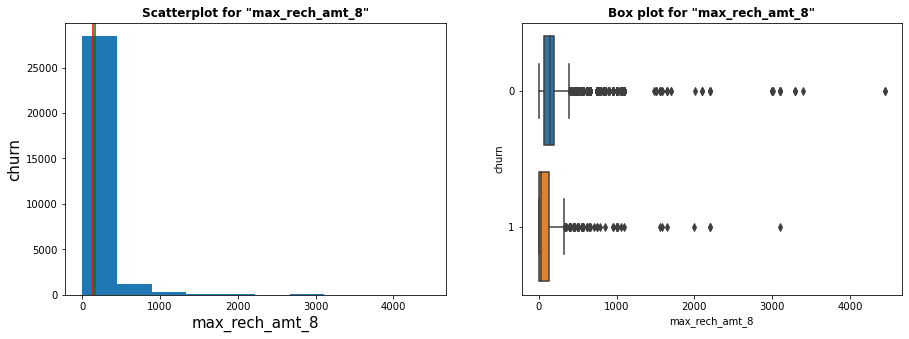

Skewness 6.279088073589375
Kurtosis 86.81343651586907
percentile value  ::
 0.05      0.00
0.95    400.25
0.99    855.00
Name: max_rech_amt_8, dtype: float64
----------------------------------------------------------------------------------------------------


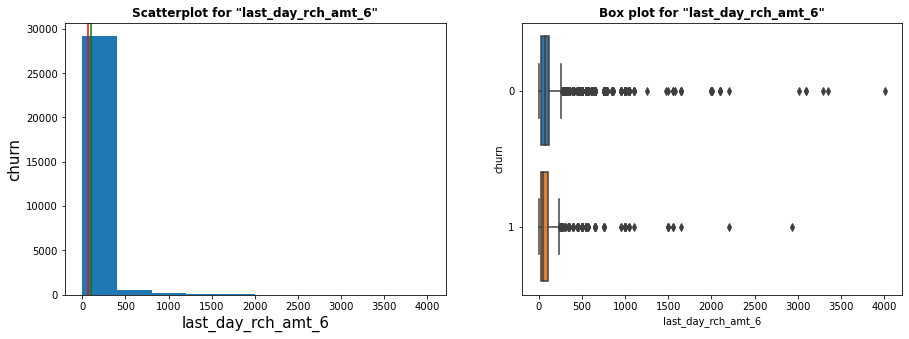

Skewness 6.806938188477308
Kurtosis 96.4402674902668
percentile value  ::
 0.05      0.0
0.95    252.0
0.99    619.0
Name: last_day_rch_amt_6, dtype: float64
----------------------------------------------------------------------------------------------------


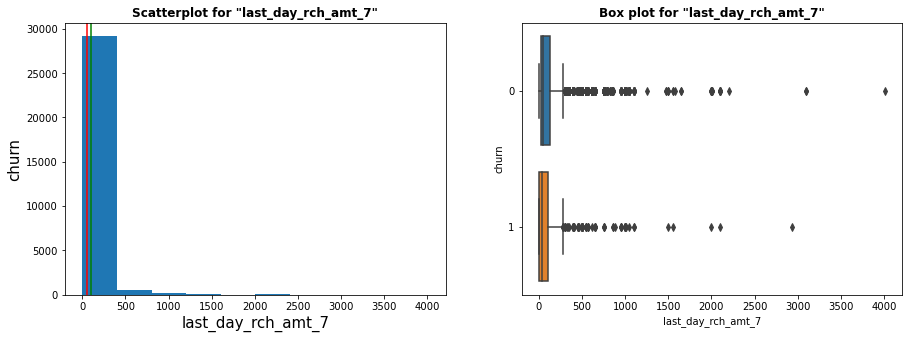

Skewness 5.873755737929943
Kurtosis 73.71663485265415
percentile value  ::
 0.05      0.0
0.95    252.0
0.99    655.0
Name: last_day_rch_amt_7, dtype: float64
----------------------------------------------------------------------------------------------------


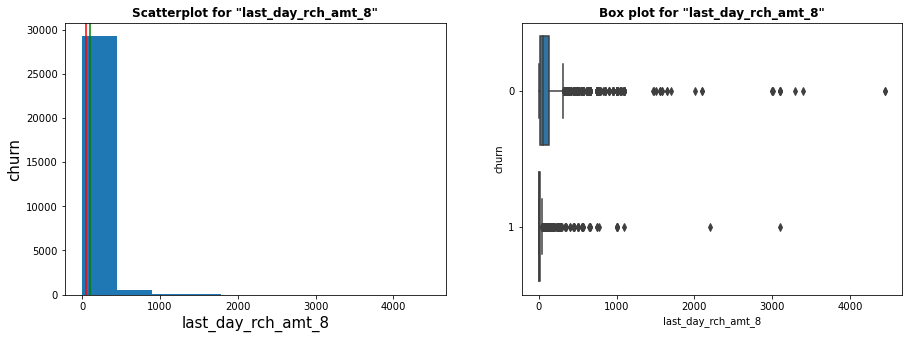

Skewness 8.044253663284184
Kurtosis 147.8813600844082
percentile value  ::
 0.05      0.0
0.95    252.0
0.99    565.0
Name: last_day_rch_amt_8, dtype: float64
----------------------------------------------------------------------------------------------------


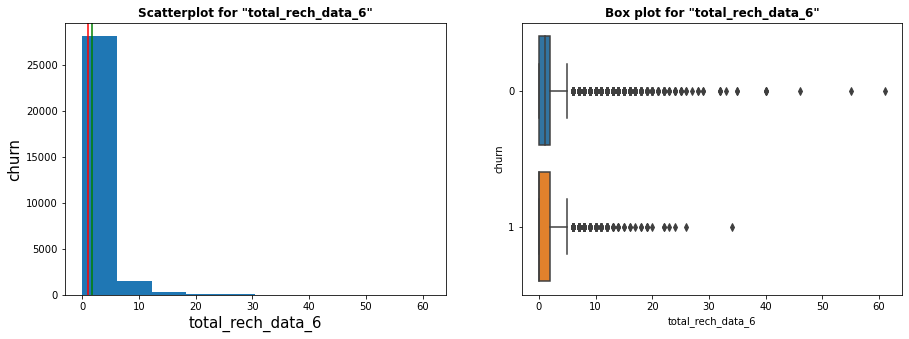

Skewness 3.9844422030521254
Kurtosis 30.99170455948693
percentile value  ::
 0.05     0.0
0.95     7.0
0.99    13.0
Name: total_rech_data_6, dtype: float64
----------------------------------------------------------------------------------------------------


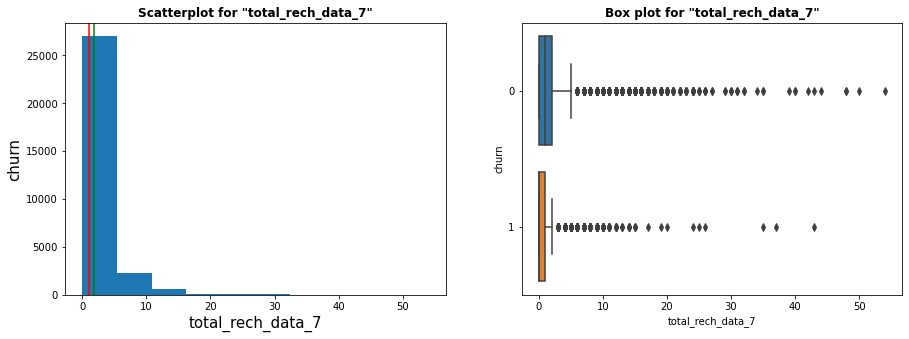

Skewness 3.8228992346515107
Kurtosis 27.249406287105753
percentile value  ::
 0.05     0.0
0.95     8.0
0.99    14.0
Name: total_rech_data_7, dtype: float64
----------------------------------------------------------------------------------------------------


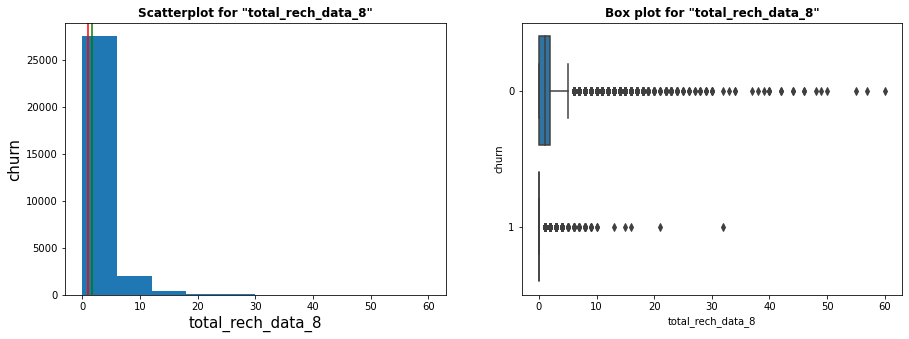

Skewness 4.780802051360295
Kurtosis 44.15209591026829
percentile value  ::
 0.05     0.0
0.95     7.0
0.99    13.0
Name: total_rech_data_8, dtype: float64
----------------------------------------------------------------------------------------------------


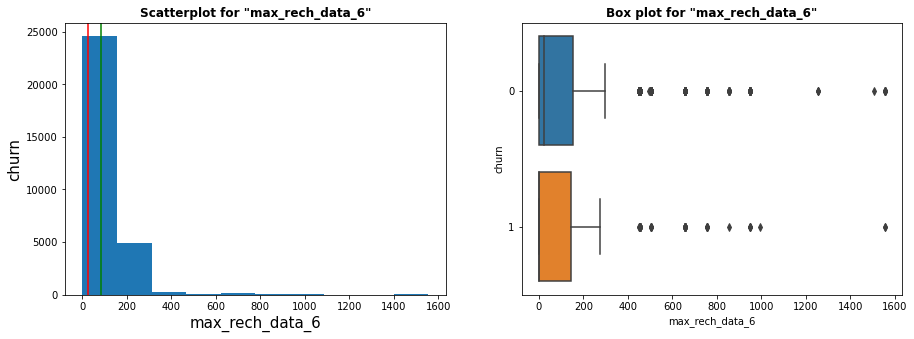

Skewness 2.658382433472593
Kurtosis 17.144925095437806
percentile value  ::
 0.05      0.0
0.95    252.0
0.99    455.0
Name: max_rech_data_6, dtype: float64
----------------------------------------------------------------------------------------------------


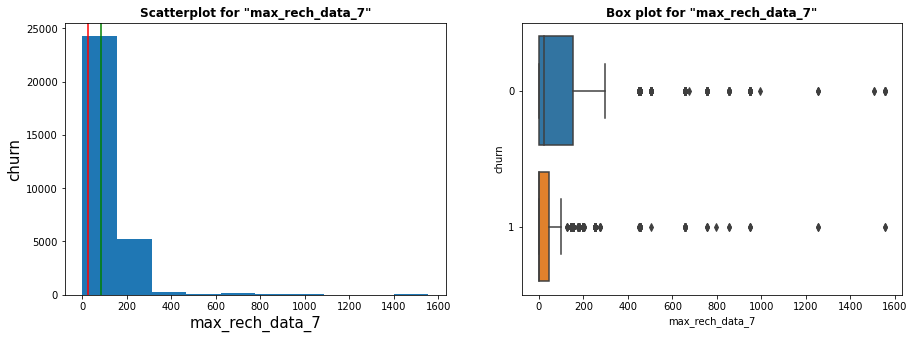

Skewness 2.722232456819599
Kurtosis 17.855397821572772
percentile value  ::
 0.05      0.0
0.95    252.0
0.99    455.0
Name: max_rech_data_7, dtype: float64
----------------------------------------------------------------------------------------------------


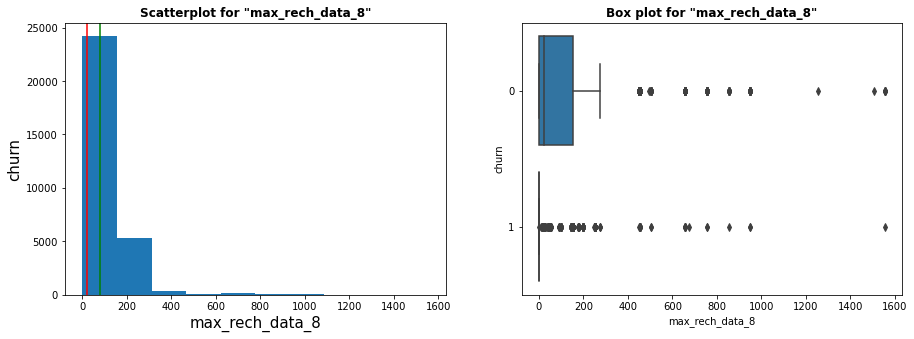

Skewness 2.6252549275504946
Kurtosis 16.110404687827703
percentile value  ::
 0.05      0.0
0.95    252.0
0.99    455.0
Name: max_rech_data_8, dtype: float64
----------------------------------------------------------------------------------------------------


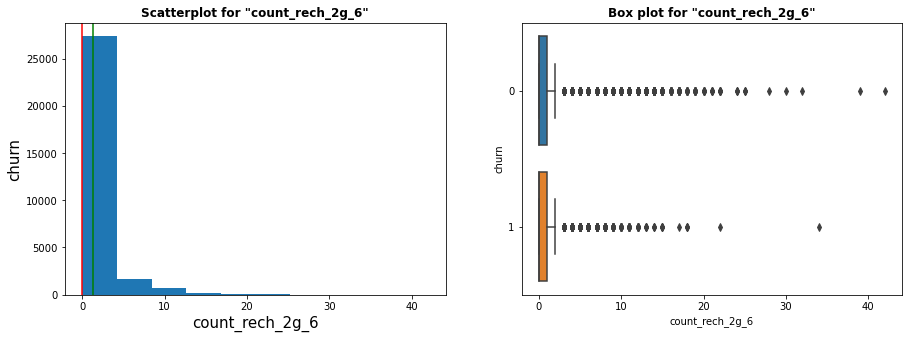

Skewness 3.5887425802595865
Kurtosis 19.453277855404192
percentile value  ::
 0.05     0.0
0.95     7.0
0.99    12.0
Name: count_rech_2g_6, dtype: float64
----------------------------------------------------------------------------------------------------


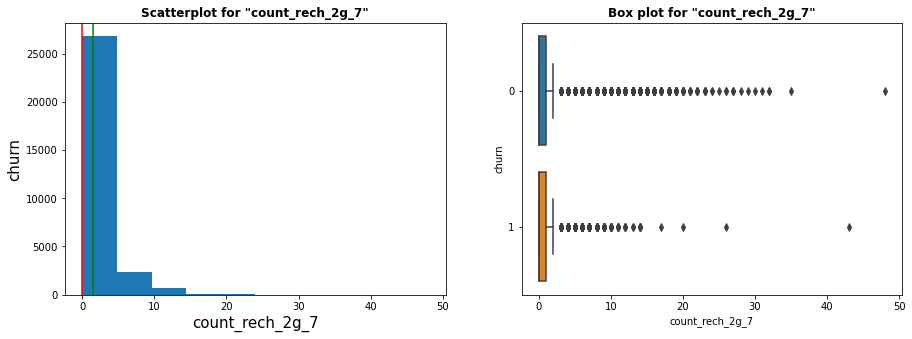

Skewness 3.436482558814586
Kurtosis 18.84707409158703
percentile value  ::
 0.05     0.0
0.95     7.0
0.99    12.0
Name: count_rech_2g_7, dtype: float64
----------------------------------------------------------------------------------------------------


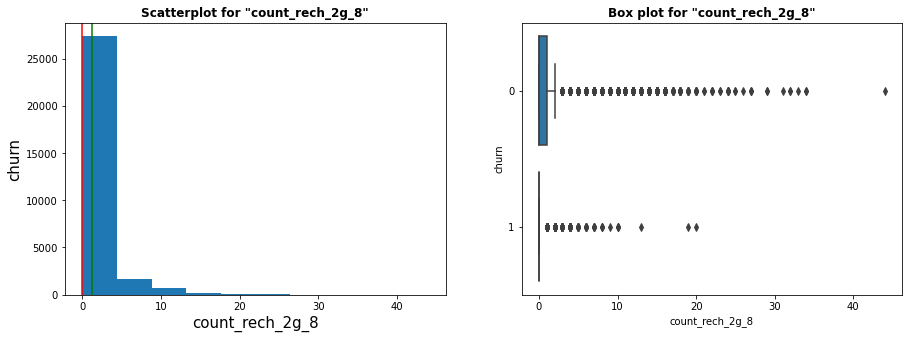

Skewness 3.7993703205906164
Kurtosis 22.06820898804791
percentile value  ::
 0.05     0.0
0.95     6.0
0.99    12.0
Name: count_rech_2g_8, dtype: float64
----------------------------------------------------------------------------------------------------


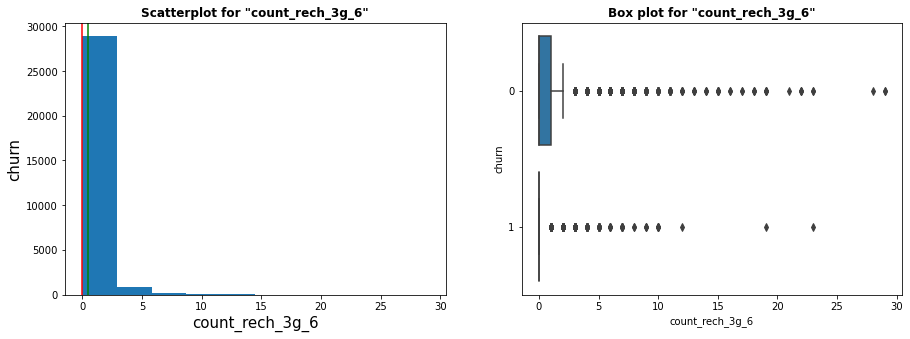

Skewness 7.640242076211222
Kurtosis 104.7657505909003
percentile value  ::
 0.05    0.0
0.95    2.0
0.99    5.0
Name: count_rech_3g_6, dtype: float64
----------------------------------------------------------------------------------------------------


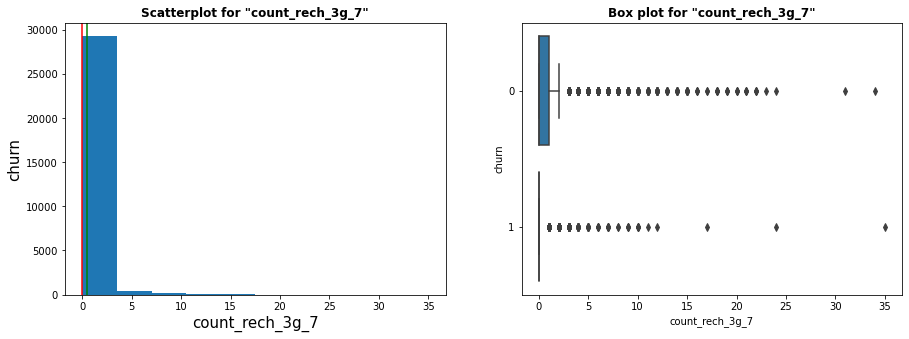

Skewness 7.8245585367780945
Kurtosis 108.67794923767958
percentile value  ::
 0.05    0.0
0.95    2.0
0.99    5.0
Name: count_rech_3g_7, dtype: float64
----------------------------------------------------------------------------------------------------


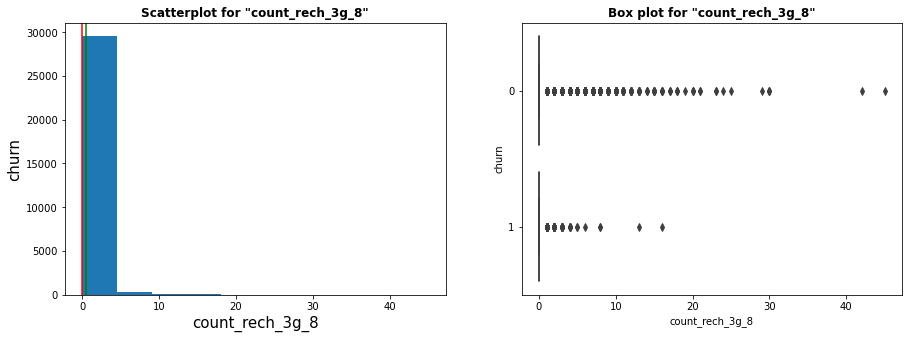

Skewness 9.615615934214736
Kurtosis 179.42720475901308
percentile value  ::
 0.05    0.0
0.95    2.0
0.99    5.0
Name: count_rech_3g_8, dtype: float64
----------------------------------------------------------------------------------------------------


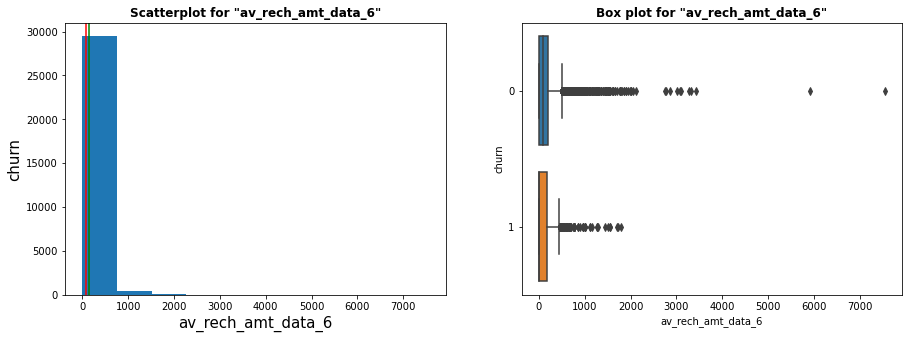

Skewness 5.718803433924943
Kurtosis 111.69853197183149
percentile value  ::
 0.05      0.0
0.95    492.0
0.99    813.0
Name: av_rech_amt_data_6, dtype: float64
----------------------------------------------------------------------------------------------------


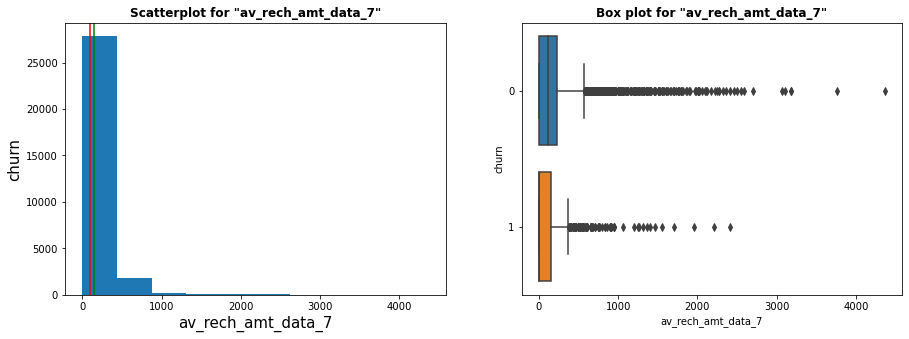

Skewness 3.898253802646745
Kurtosis 33.05286360637222
percentile value  ::
 0.05      0.0
0.95    504.0
0.99    910.0
Name: av_rech_amt_data_7, dtype: float64
----------------------------------------------------------------------------------------------------


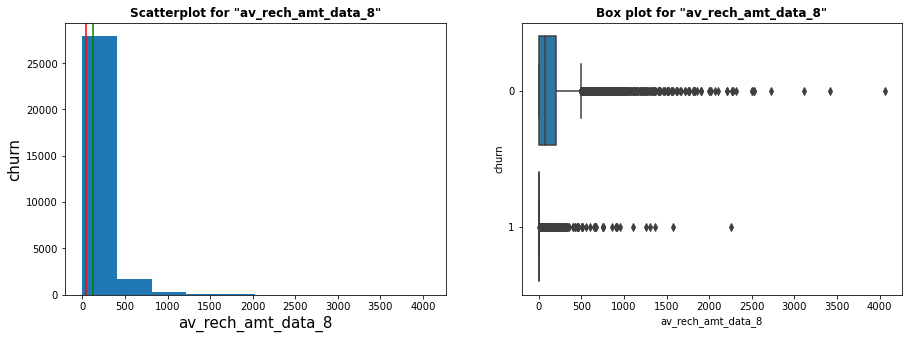

Skewness 3.662037819519841
Kurtosis 28.022473793700858
percentile value  ::
 0.05      0.0
0.95    502.0
0.99    907.0
Name: av_rech_amt_data_8, dtype: float64
----------------------------------------------------------------------------------------------------


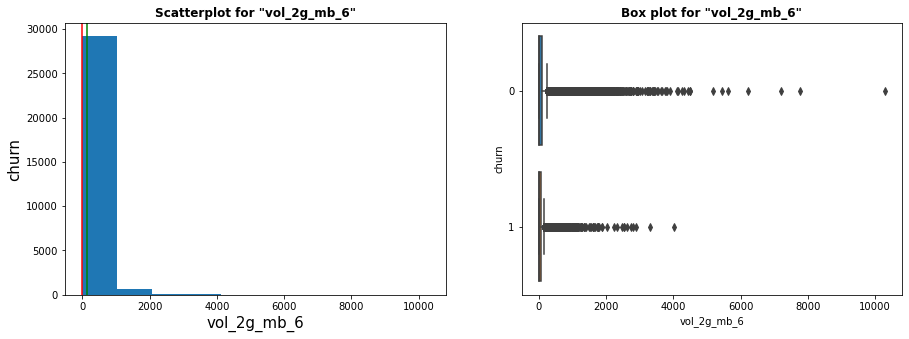

Skewness 6.339983649675385
Kurtosis 81.75192712348529
percentile value  ::
 0.05       0.0000
0.95     706.0515
0.99    1563.9169
Name: vol_2g_mb_6, dtype: float64
----------------------------------------------------------------------------------------------------


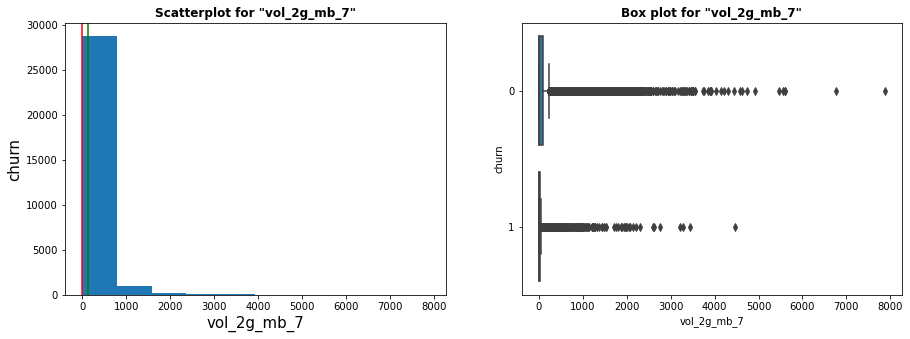

Skewness 5.860041601692794
Kurtosis 57.57210924499298
percentile value  ::
 0.05       0.0000
0.95     693.0405
0.99    1565.0917
Name: vol_2g_mb_7, dtype: float64
----------------------------------------------------------------------------------------------------


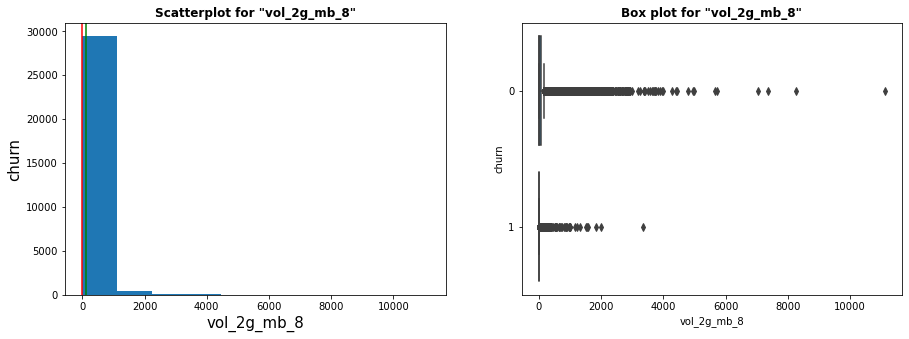

Skewness 7.719049015417989
Kurtosis 124.23270535847959
percentile value  ::
 0.05       0.0000
0.95     613.3820
0.99    1449.9016
Name: vol_2g_mb_8, dtype: float64
----------------------------------------------------------------------------------------------------


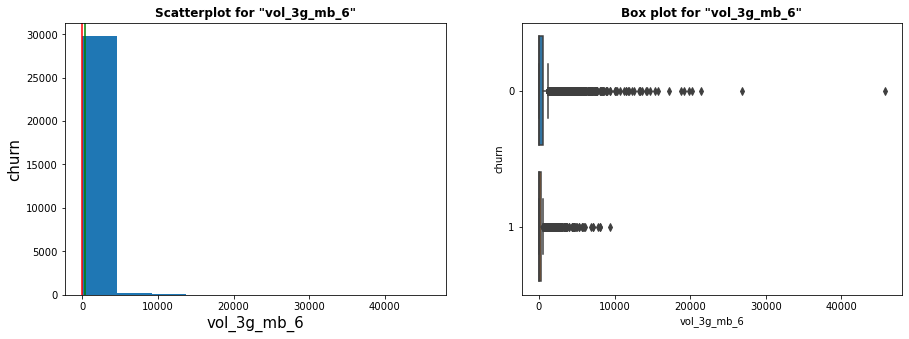

Skewness 10.463785784217515
Kurtosis 287.73984944501404
percentile value  ::
 0.05       0.0000
0.95    1761.8460
0.99    3777.5095
Name: vol_3g_mb_6, dtype: float64
----------------------------------------------------------------------------------------------------


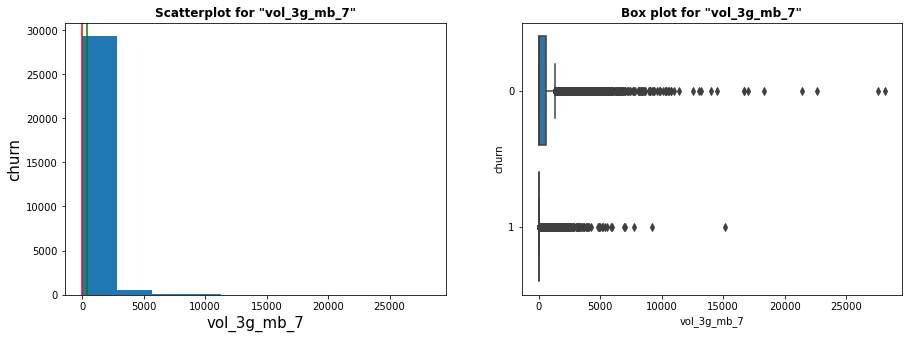

Skewness 7.317012587195817
Kurtosis 115.90819267376702
percentile value  ::
 0.05       0.0000
0.95    1824.9685
0.99    4054.4187
Name: vol_3g_mb_7, dtype: float64
----------------------------------------------------------------------------------------------------


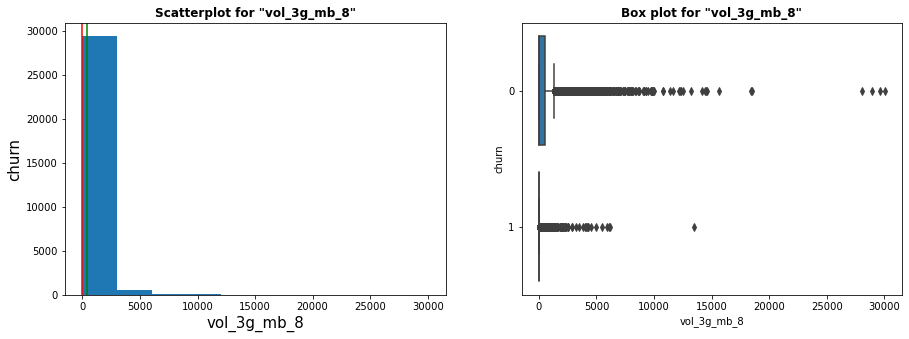

Skewness 8.503103438078165
Kurtosis 165.11743160192955
percentile value  ::
 0.05       0.0000
0.95    1789.3810
0.99    3965.0515
Name: vol_3g_mb_8, dtype: float64
----------------------------------------------------------------------------------------------------


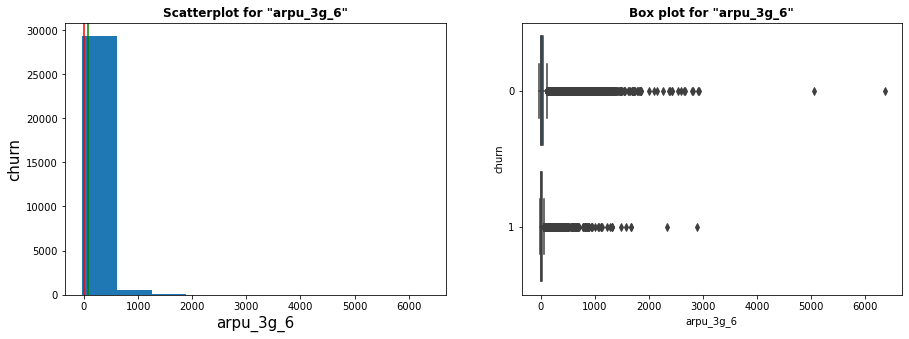

Skewness 6.773960476321482
Kurtosis 107.3985948729896
percentile value  ::
 0.05      0.000
0.95    397.892
0.99    811.930
Name: arpu_3g_6, dtype: float64
----------------------------------------------------------------------------------------------------


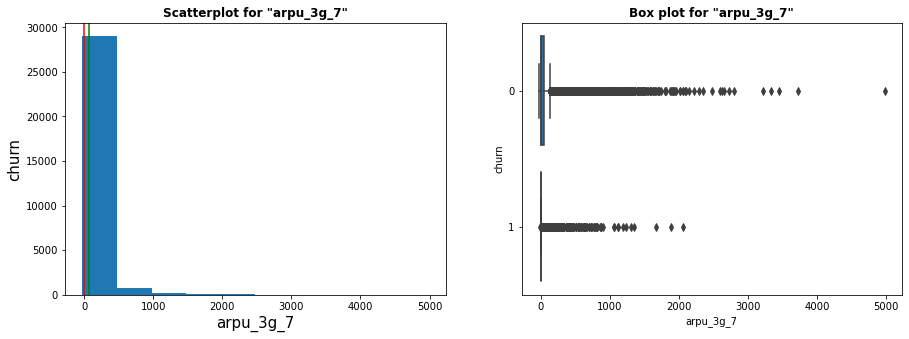

Skewness 5.897004415922783
Kurtosis 64.04675361138523
percentile value  ::
 0.05      0.0000
0.95    410.1545
0.99    817.9376
Name: arpu_3g_7, dtype: float64
----------------------------------------------------------------------------------------------------


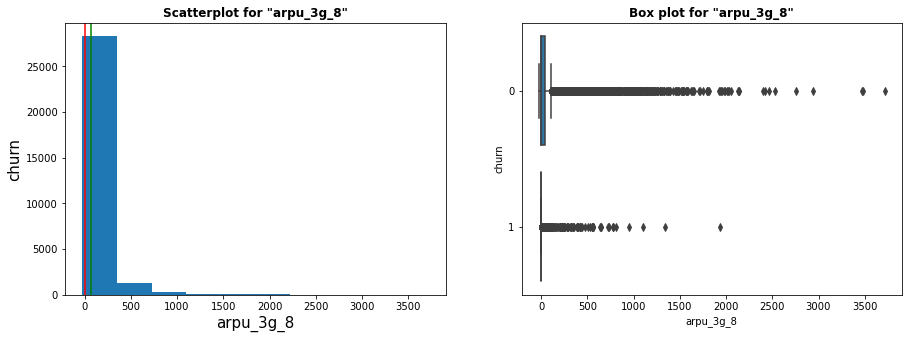

Skewness 5.396081315615562
Kurtosis 50.83222225081704
percentile value  ::
 0.05      0.000
0.95    389.010
0.99    794.935
Name: arpu_3g_8, dtype: float64
----------------------------------------------------------------------------------------------------


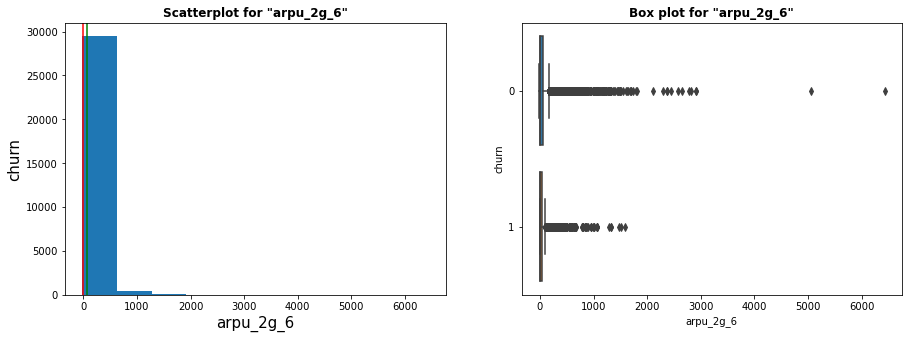

Skewness 7.488929779578712
Kurtosis 149.82371517378283
percentile value  ::
 0.05      0.0000
0.95    362.8405
0.99    675.5001
Name: arpu_2g_6, dtype: float64
----------------------------------------------------------------------------------------------------


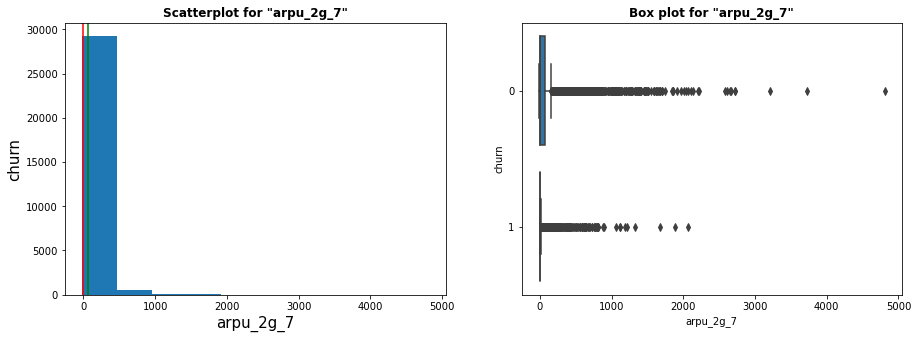

Skewness 6.087446174785021
Kurtosis 72.47538177103046
percentile value  ::
 0.05      0.0000
0.95    375.1380
0.99    758.9925
Name: arpu_2g_7, dtype: float64
----------------------------------------------------------------------------------------------------


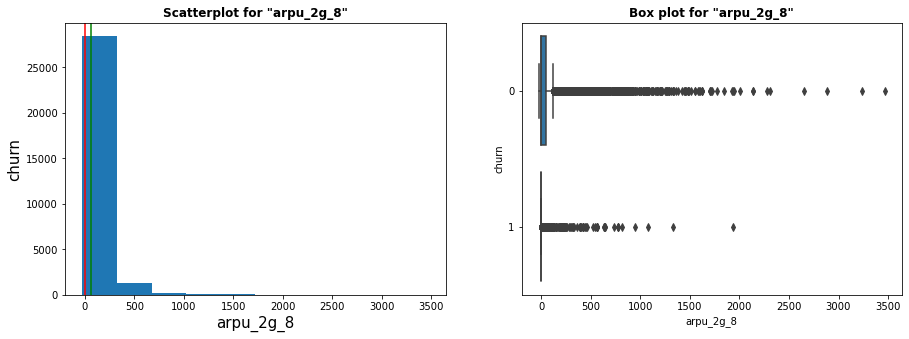

Skewness 5.285876032414697
Kurtosis 49.90715505061202
percentile value  ::
 0.05      0.0000
0.95    340.2780
0.99    700.5683
Name: arpu_2g_8, dtype: float64
----------------------------------------------------------------------------------------------------


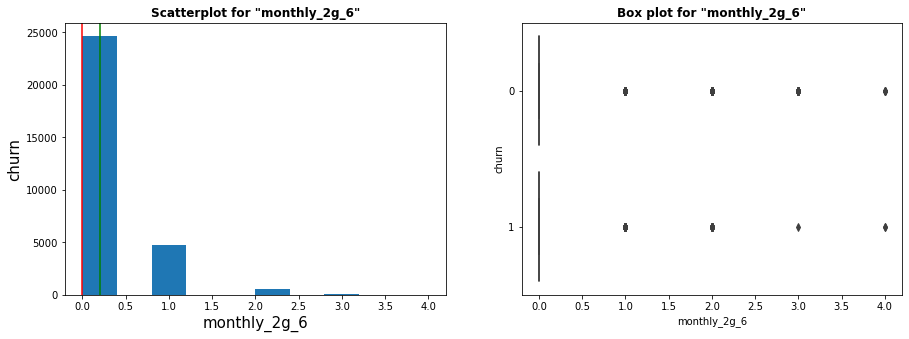

Skewness 2.341091502549129
Kurtosis 5.802869722100057
percentile value  ::
 0.05    0.0
0.95    1.0
0.99    2.0
Name: monthly_2g_6, dtype: float64
----------------------------------------------------------------------------------------------------


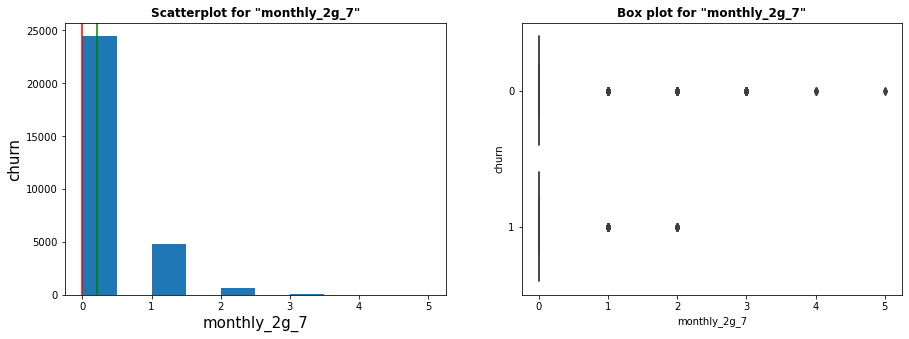

Skewness 2.332613793952914
Kurtosis 5.9305298092735725
percentile value  ::
 0.05    0.0
0.95    1.0
0.99    2.0
Name: monthly_2g_7, dtype: float64
----------------------------------------------------------------------------------------------------


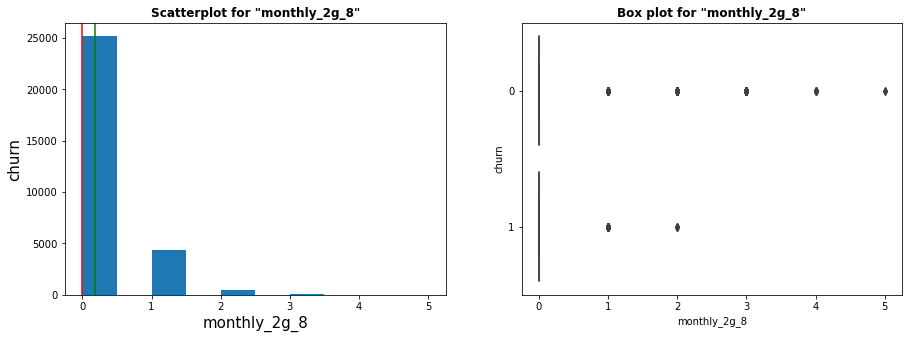

Skewness 2.6085247877008912
Kurtosis 8.138617153413017
percentile value  ::
 0.05    0.0
0.95    1.0
0.99    2.0
Name: monthly_2g_8, dtype: float64
----------------------------------------------------------------------------------------------------


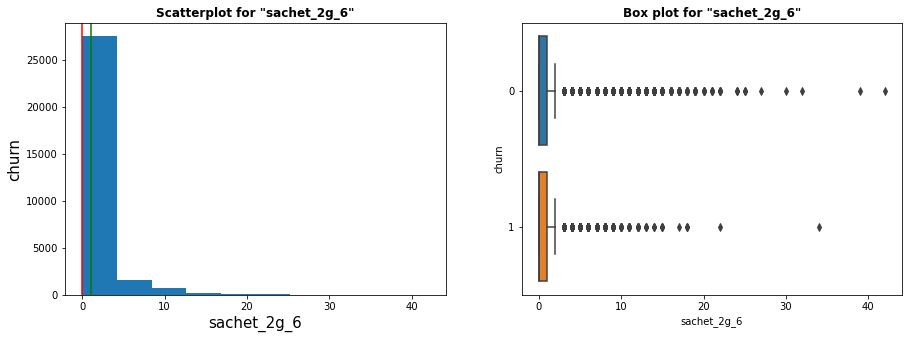

Skewness 3.707547150720151
Kurtosis 19.958143239672754
percentile value  ::
 0.05     0.0
0.95     6.0
0.99    12.0
Name: sachet_2g_6, dtype: float64
----------------------------------------------------------------------------------------------------


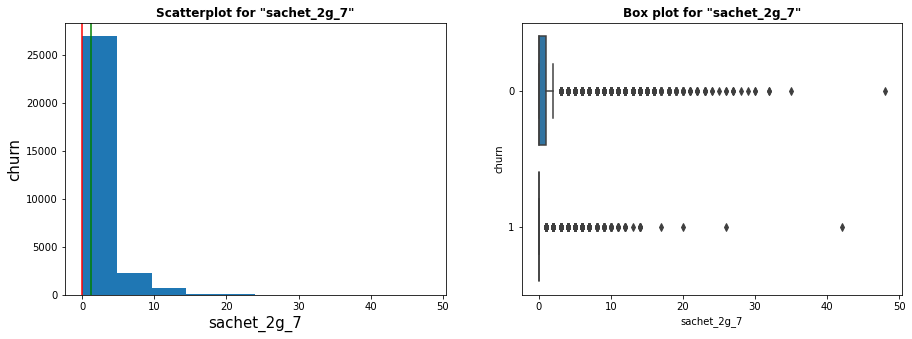

Skewness 3.525476114369798
Kurtosis 18.981992053340516
percentile value  ::
 0.05     0.0
0.95     7.0
0.99    12.0
Name: sachet_2g_7, dtype: float64
----------------------------------------------------------------------------------------------------


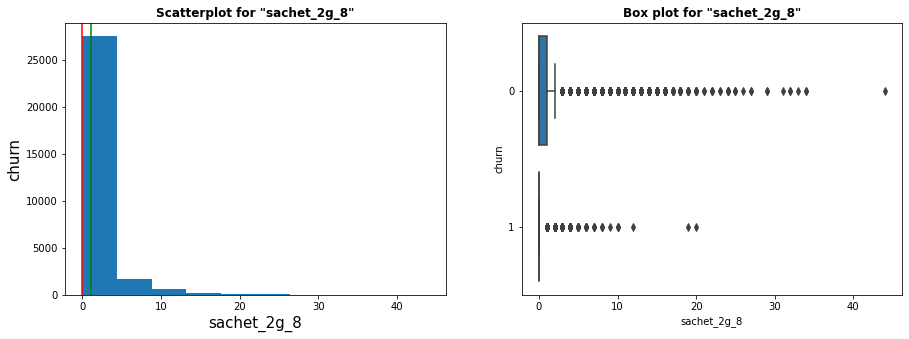

Skewness 3.9191071964567517
Kurtosis 22.731497728901022
percentile value  ::
 0.05     0.0
0.95     6.0
0.99    12.0
Name: sachet_2g_8, dtype: float64
----------------------------------------------------------------------------------------------------


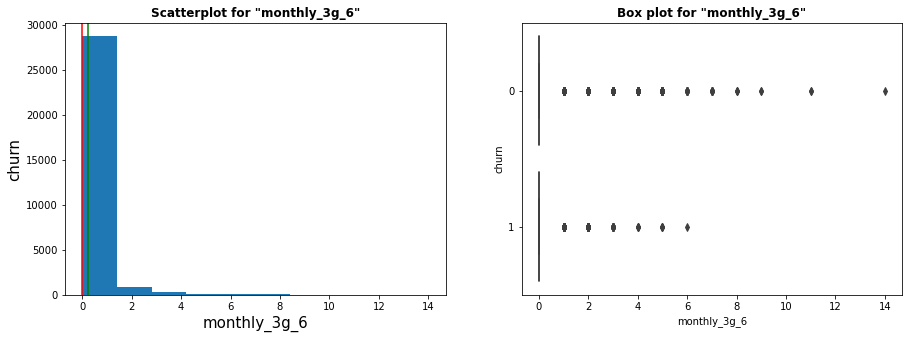

Skewness 4.553962553422753
Kurtosis 37.37326305399609
percentile value  ::
 0.05    0.0
0.95    1.0
0.99    3.0
Name: monthly_3g_6, dtype: float64
----------------------------------------------------------------------------------------------------


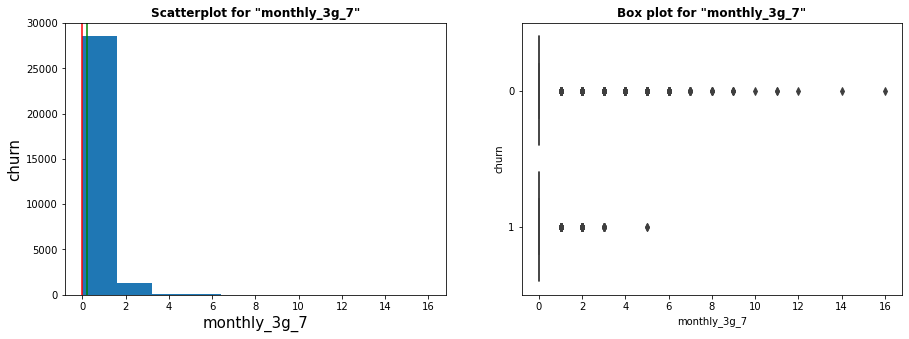

Skewness 5.161679257804949
Kurtosis 50.1987052067795
percentile value  ::
 0.05    0.0
0.95    1.0
0.99    3.0
Name: monthly_3g_7, dtype: float64
----------------------------------------------------------------------------------------------------


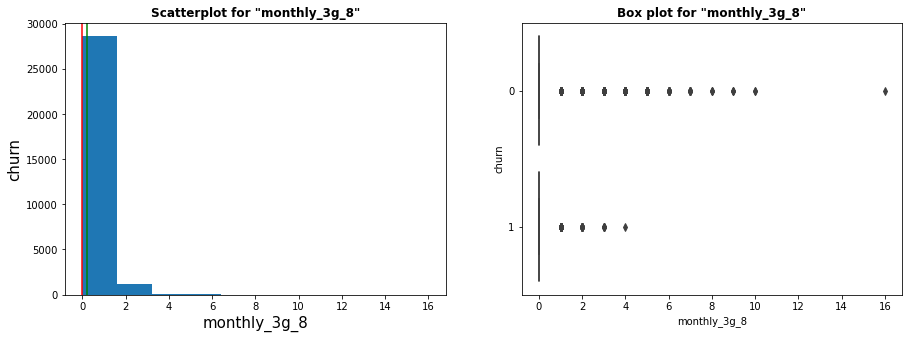

Skewness 4.709289080720516
Kurtosis 41.21696633835954
percentile value  ::
 0.05    0.0
0.95    1.0
0.99    3.0
Name: monthly_3g_8, dtype: float64
----------------------------------------------------------------------------------------------------


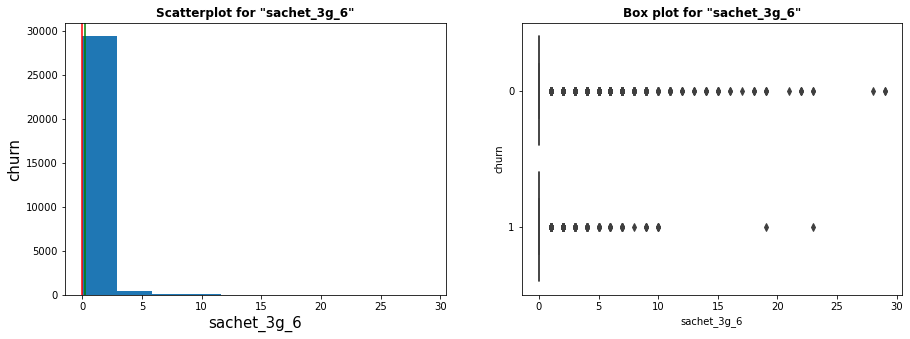

Skewness 11.448022638086197
Kurtosis 201.63461592639754
percentile value  ::
 0.05    0.0
0.95    1.0
0.99    4.0
Name: sachet_3g_6, dtype: float64
----------------------------------------------------------------------------------------------------


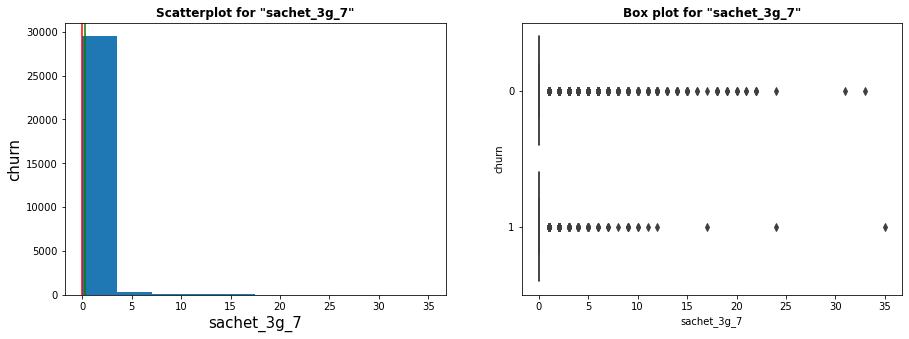

Skewness 11.24696976280262
Kurtosis 195.6375691877637
percentile value  ::
 0.05    0.0
0.95    1.0
0.99    5.0
Name: sachet_3g_7, dtype: float64
----------------------------------------------------------------------------------------------------


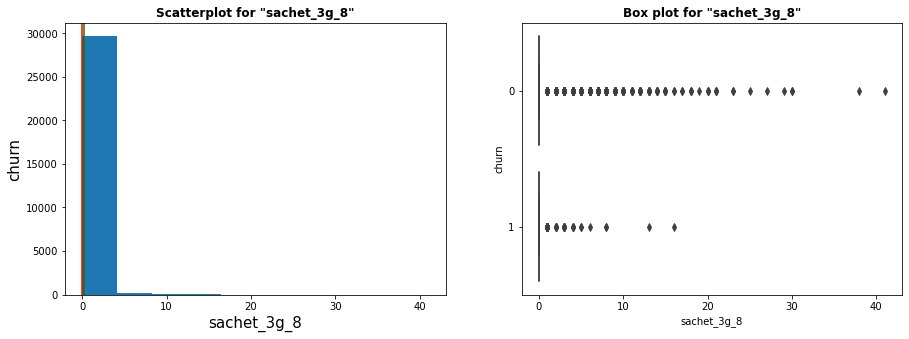

Skewness 13.022155502898444
Kurtosis 269.49089557331143
percentile value  ::
 0.05    0.0
0.95    1.0
0.99    4.0
Name: sachet_3g_8, dtype: float64
----------------------------------------------------------------------------------------------------


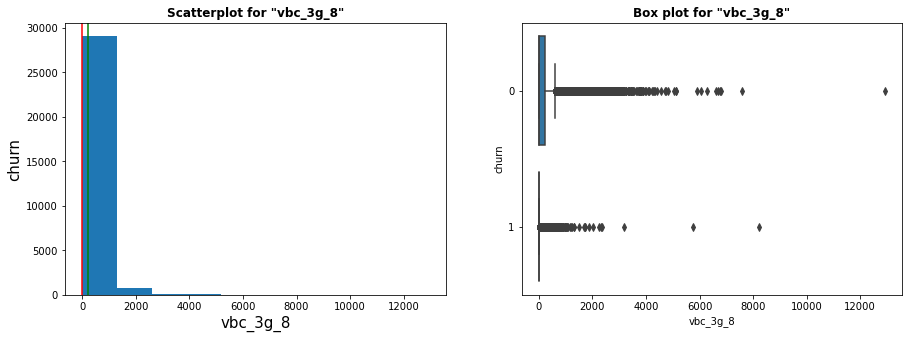

Skewness 5.090656785339195
Kurtosis 55.84470502100199
percentile value  ::
 0.05       0.0000
0.95    1001.8555
0.99    2020.8746
Name: vbc_3g_8, dtype: float64
----------------------------------------------------------------------------------------------------


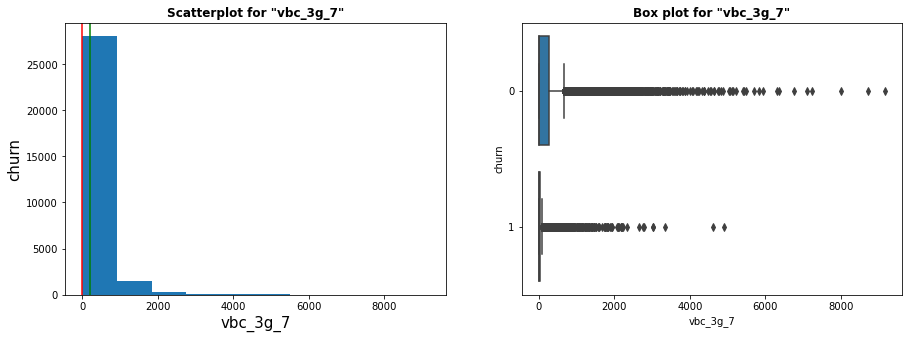

Skewness 4.625265152898034
Kurtosis 38.15234926154533
percentile value  ::
 0.05       0.0000
0.95    1039.9330
0.99    2120.0018
Name: vbc_3g_7, dtype: float64
----------------------------------------------------------------------------------------------------


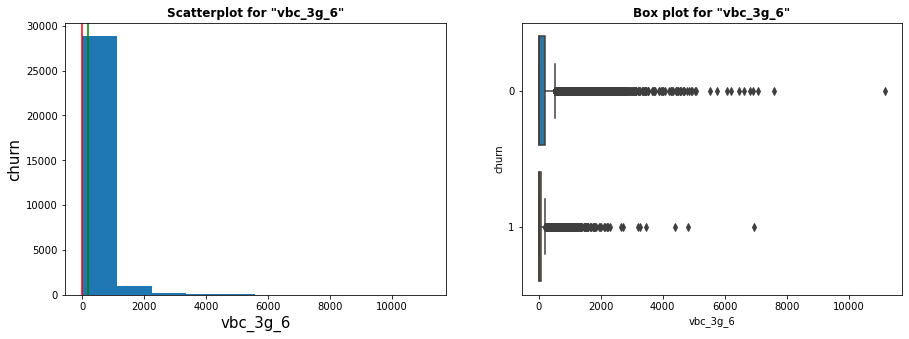

Skewness 5.14816005005581
Kurtosis 50.192334294349706
percentile value  ::
 0.05       0.0000
0.95     956.9835
0.99    1991.0706
Name: vbc_3g_6, dtype: float64
----------------------------------------------------------------------------------------------------


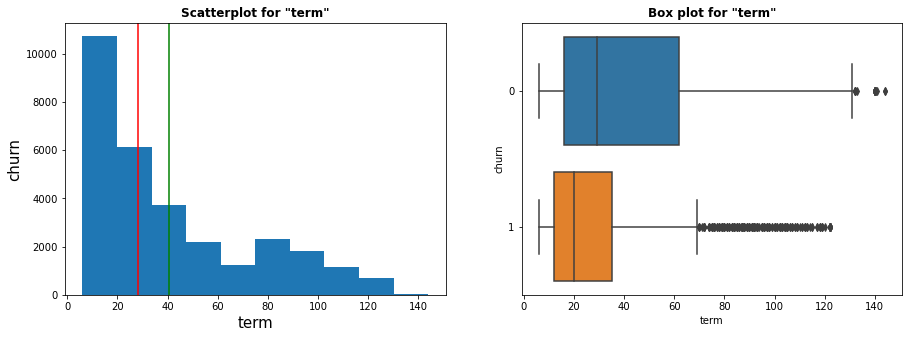

Skewness 0.9800790173909553
Kurtosis -0.20928664835553779
percentile value  ::
 0.05      8.0
0.95    105.0
0.99    122.0
Name: term, dtype: float64
----------------------------------------------------------------------------------------------------


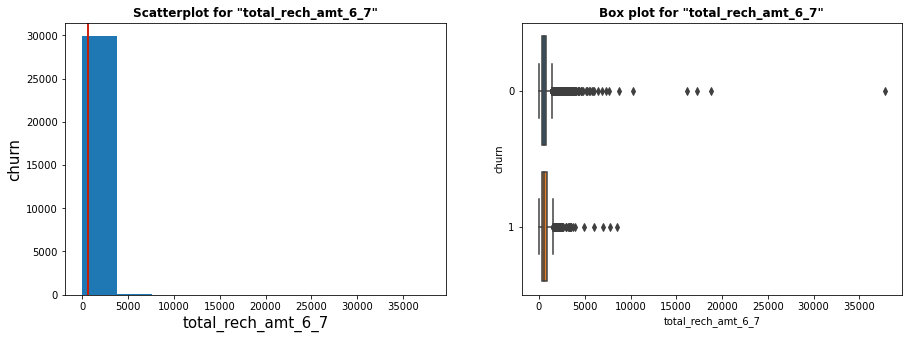

Skewness 17.27228086122244
Kurtosis 956.1917755673128
percentile value  ::
 0.05     152.975
0.95    1406.025
0.99    2217.000
Name: total_rech_amt_6_7, dtype: float64
----------------------------------------------------------------------------------------------------


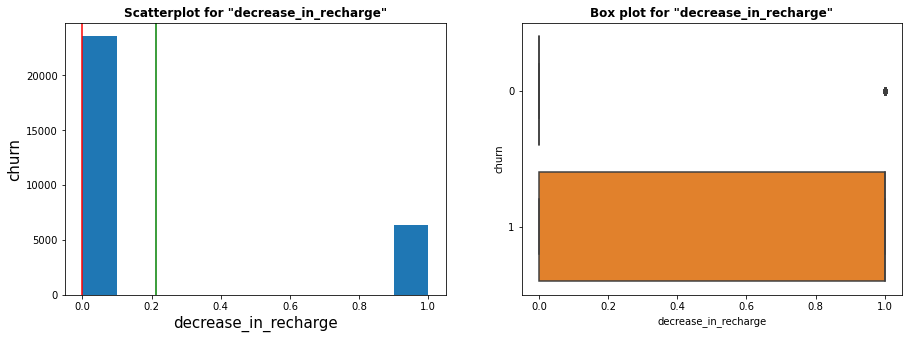

Skewness 1.4049444068725983
Kurtosis -0.0261329602393503
percentile value  ::
 0.05    0.0
0.95    1.0
0.99    1.0
Name: decrease_in_recharge, dtype: float64
----------------------------------------------------------------------------------------------------


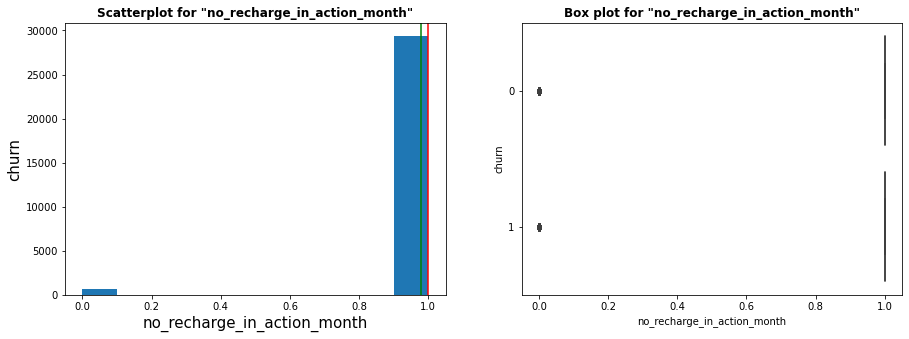

Skewness -6.881902050005166
Kurtosis 45.36360006143153
percentile value  ::
 0.05    1.0
0.95    1.0
0.99    1.0
Name: no_recharge_in_action_month, dtype: float64
----------------------------------------------------------------------------------------------------


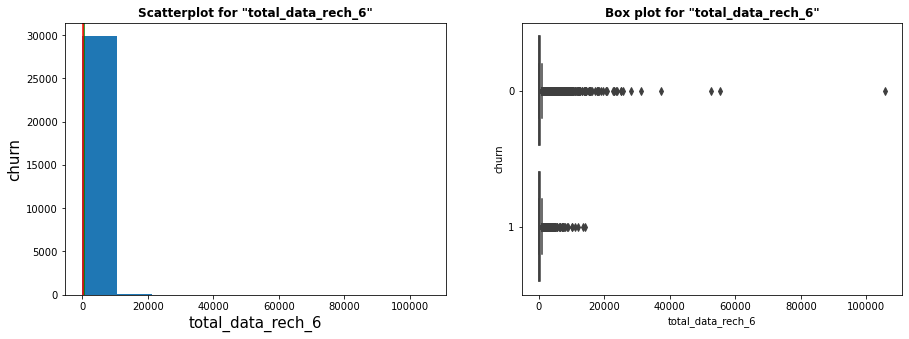

Skewness 22.74532629126848
Kurtosis 1218.4349039717217
percentile value  ::
 0.05       0.0
0.95    2060.0
0.99    5165.1
Name: total_data_rech_6, dtype: float64
----------------------------------------------------------------------------------------------------


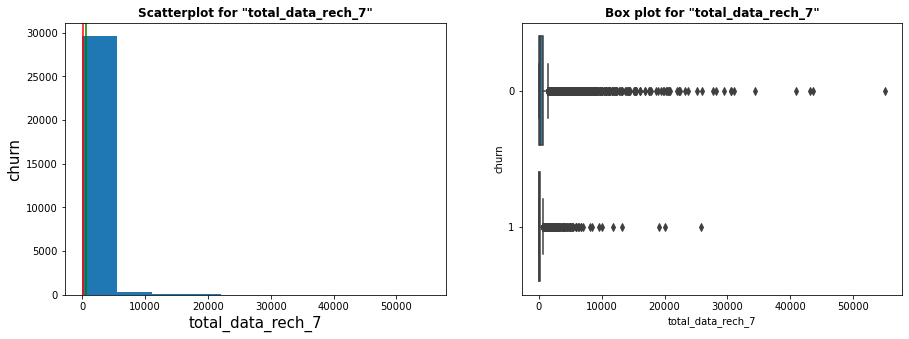

Skewness 10.992435344011222
Kurtosis 218.68991216745772
percentile value  ::
 0.05       0.00
0.95    2420.00
0.99    6192.28
Name: total_data_rech_7, dtype: float64
----------------------------------------------------------------------------------------------------


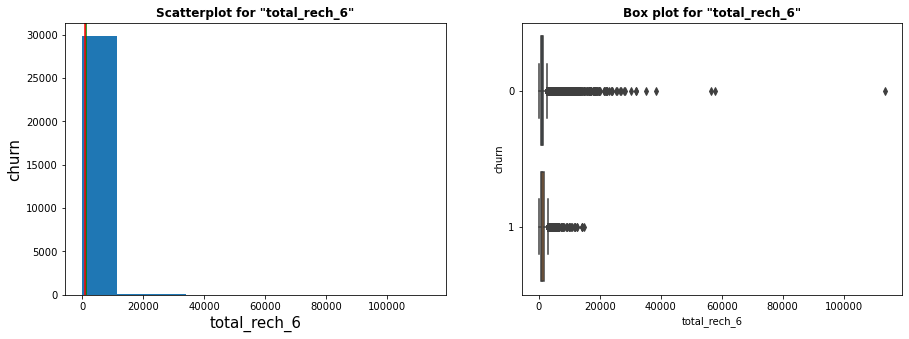

Skewness 16.367254413660557
Kurtosis 722.7662142685323
percentile value  ::
 0.05     260.0000
0.95    3447.2575
0.99    7353.1541
Name: total_rech_6, dtype: float64
----------------------------------------------------------------------------------------------------


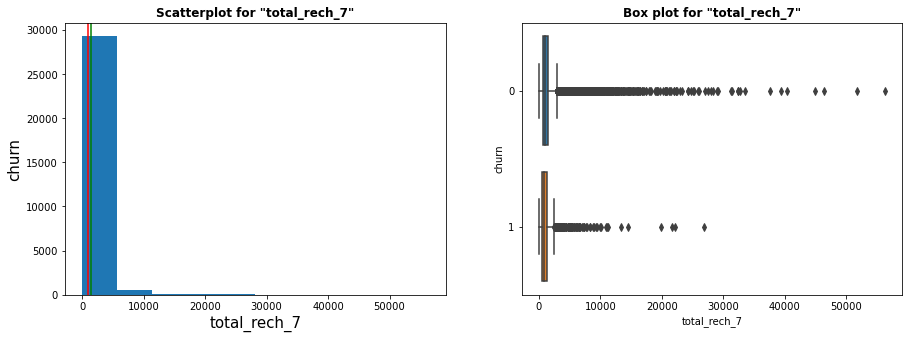

Skewness 8.901468482689205
Kurtosis 147.00704992971237
percentile value  ::
 0.05     286.0000
0.95    3760.0000
0.99    8072.2909
Name: total_rech_7, dtype: float64
----------------------------------------------------------------------------------------------------


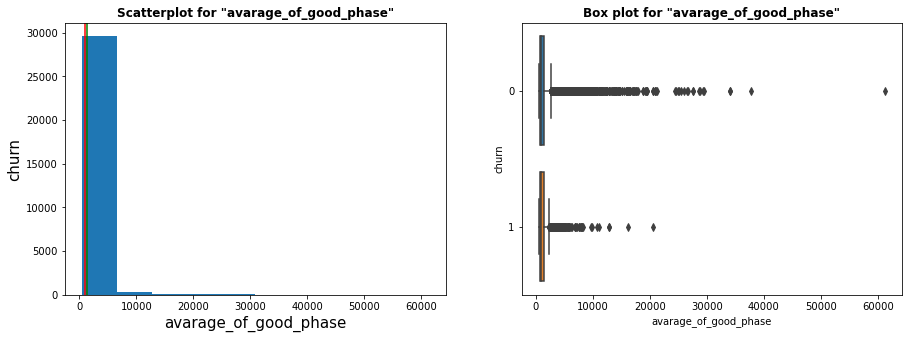

Skewness 9.14158770370066
Kurtosis 171.40626829769863
percentile value  ::
 0.05     542.0000
0.95    3381.5145
0.99    6925.2500
Name: avarage_of_good_phase, dtype: float64
----------------------------------------------------------------------------------------------------


In [49]:
n= len(numerical_col)

for column_name in numerical_col:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1,2,1)
    plt.title('Scatterplot for "{}"'.format(column_name), weight='bold')
    plt.hist(x=column_name, data=telecom_hvc)
    plt.axvline(telecom_hvc[column_name].mean(), c="green")
    plt.axvline(telecom_hvc[column_name].median(), c="red")
    plt.ylabel('churn', fontsize=15)
    plt.xlabel(column_name,fontsize=15) 
    
    plt.subplot(1,2,2)
    plt.title('Box plot for "{}"'.format(column_name), weight='bold')
    sns.boxplot( x = column_name, y='churn', data=telecom_hvc, orient = 'h')
    
    
    
    plt.show()
    print("Skewness",telecom_hvc[column_name].skew())
    print("Kurtosis",telecom_hvc[column_name].kurt())
    print("percentile value  ::\n",telecom_hvc[column_name].quantile([ .05,  .95 , 0.99]))
    print("-"*100)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  Almost all the columns have Outliers, an outlier treatment is suggested.
    </span>
</div>

### Analysis for Categorical variable

In [50]:
categorical_col.remove('churn')

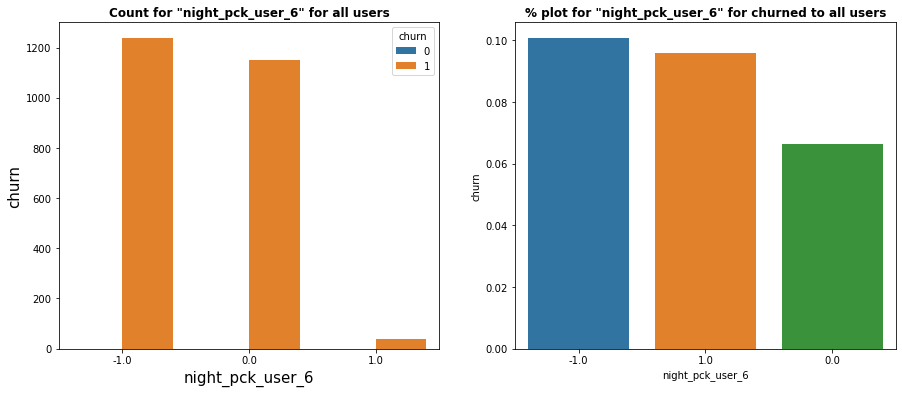

0.0     57.656667
-1.0    40.953333
1.0      1.390000
Name: night_pck_user_6, dtype: float64
---------------------------------------------------------------------------------------------------- 



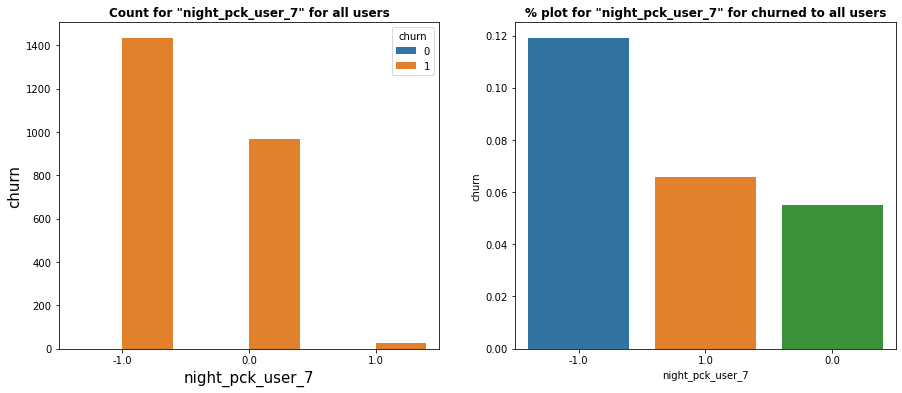

0.0     58.586667
-1.0    40.146667
1.0      1.266667
Name: night_pck_user_7, dtype: float64
---------------------------------------------------------------------------------------------------- 



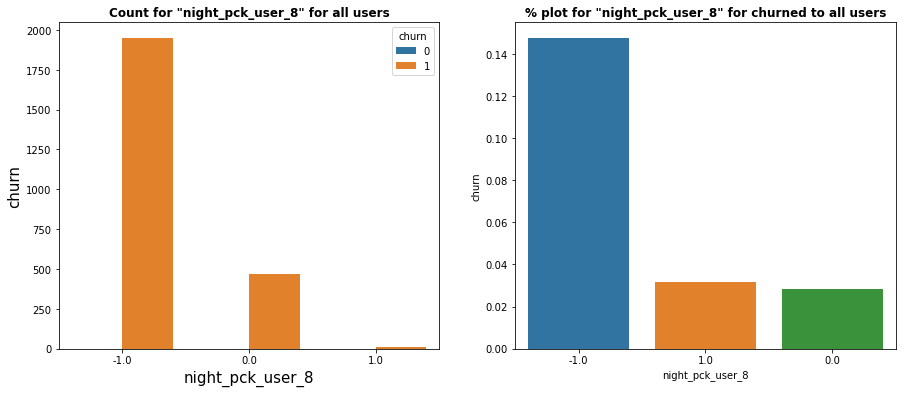

0.0     54.823333
-1.0    44.016667
1.0      1.160000
Name: night_pck_user_8, dtype: float64
---------------------------------------------------------------------------------------------------- 



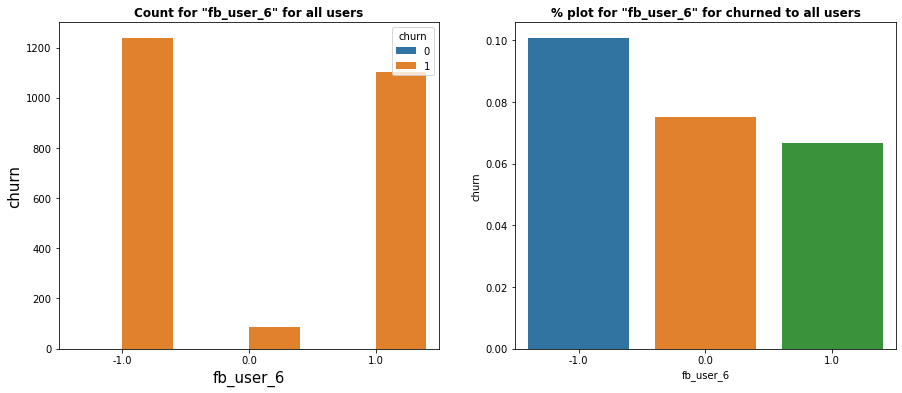

1.0     55.223333
-1.0    40.953333
0.0      3.823333
Name: fb_user_6, dtype: float64
---------------------------------------------------------------------------------------------------- 



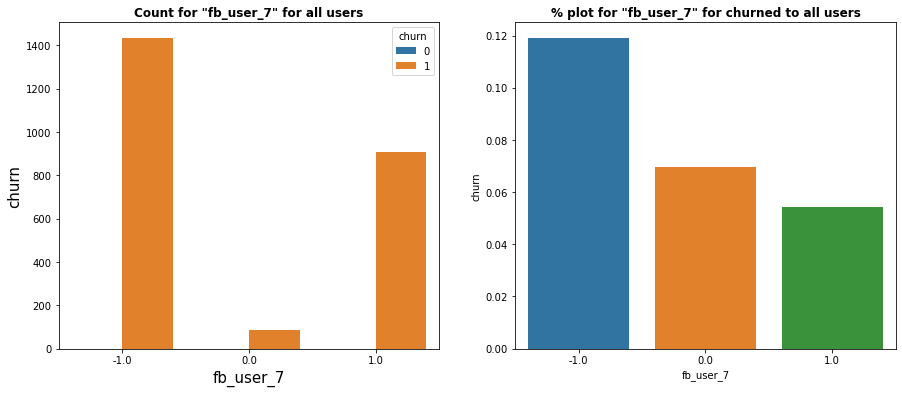

1.0     55.733333
-1.0    40.146667
0.0      4.120000
Name: fb_user_7, dtype: float64
---------------------------------------------------------------------------------------------------- 



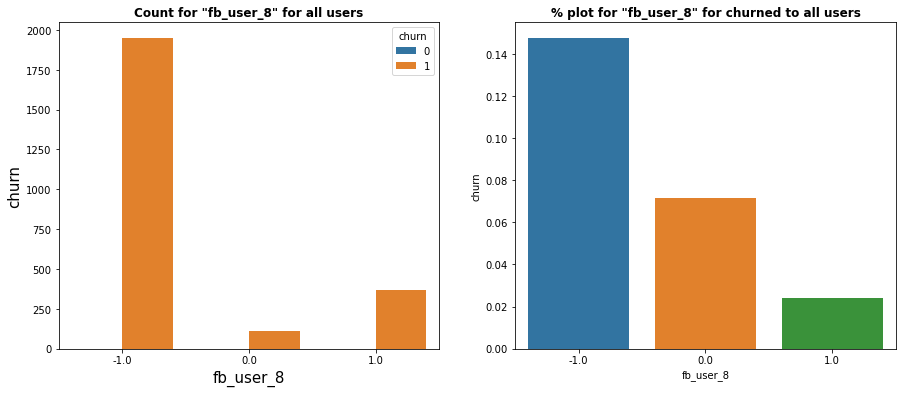

1.0     50.966667
-1.0    44.016667
0.0      5.016667
Name: fb_user_8, dtype: float64
---------------------------------------------------------------------------------------------------- 



In [51]:
for column_name in categorical_col:
    plt.figure(figsize=(15, 6))
    plt.subplot(1,2,1)
    plt.title('Count for "{}" for all users'.format(column_name), weight='bold')
    sns.countplot(x=column_name,hue='churn',data=telecom_hvc[telecom_hvc['churn']==1] )
    plt.ylabel('churn', fontsize=15)
    plt.xlabel(column_name,fontsize=15) 
    
    plt.subplot(1,2,2)
    temp_df = telecom_hvc[[column_name, 'churn']]
    temp_df['churn'] = temp_df['churn'].astype("int")
    cat_perc = temp_df.groupby([column_name],as_index=False).mean()
    cat_perc.sort_values(by='churn', ascending=False, inplace=True)
    
    plt.title('% plot for "{}" for churned to all users'.format(column_name), weight='bold')
    s = sns.barplot(x = column_name, y='churn', order=cat_perc[column_name], data=cat_perc)
    
    plt.show()
    print(telecom_hvc[column_name].value_counts(dropna=False,normalize=True)*100)
    print("-"*100,"\n")

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  There are no visible patterns for night pack or fb user
  -  There are huge number of missing values (which we considered as -1)
  -  In the rest of the data we have it is biased to wards non churn
  -  so we have decided to drop the columns
    </span>
</div>

In [52]:
# Dropping FB users column and night pack user column
drop_cols = telecom_hvc.columns[telecom_hvc.columns.str.contains('fb_user') | telecom_hvc.columns.str.contains('night_pck_user')]
print( "Columns reresenting FB users and night pack user  are ::", list(drop_cols))

telecom_hvc.drop(columns=drop_cols,inplace=True)

Columns reresenting FB users and night pack user  are :: ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


### 4.4 Bivariate Analysis

In [53]:
corr_mat = telecom_hvc.corr().round(3)

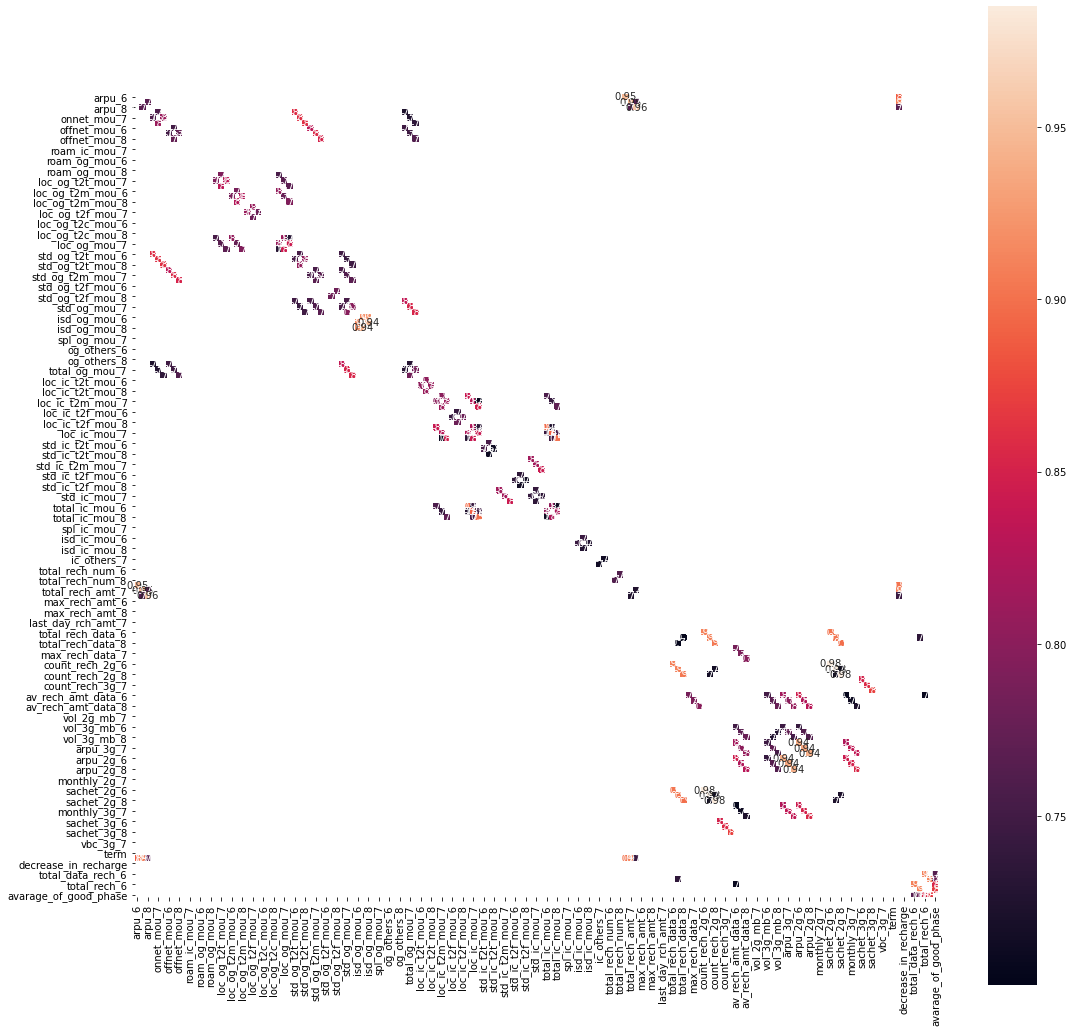

In [54]:
top_corelations_mat = corr_mat[((corr_mat != 1.000) & ((corr_mat > 0.7) | (corr_mat < -0.7)))]
plt.figure(figsize=[18,18])
sns.heatmap(data=top_corelations_mat,square=True,annot=True,cbar=True)
plt.show()

#### Top 20 correlations between all variuables

In [55]:
corr_filtered = corr_mat[corr_mat != 1.000]
corr_filtered.unstack().sort_values(ascending=False).drop_duplicates().abs().head(20)

sachet_2g_8         count_rech_2g_8      0.985
count_rech_2g_6     sachet_2g_6          0.984
total_rech_amt_8    arpu_8               0.958
total_rech_amt_6    arpu_6               0.948
total_rech_amt_7    arpu_7               0.946
isd_og_mou_8        isd_og_mou_7         0.943
arpu_2g_8           arpu_3g_8            0.941
arpu_2g_6           arpu_3g_6            0.939
arpu_3g_7           arpu_2g_7            0.936
isd_og_mou_6        isd_og_mou_8         0.919
                    isd_og_mou_7         0.916
total_rech_7        total_data_rech_7    0.911
total_data_rech_6   total_rech_6         0.910
count_rech_2g_7     total_rech_data_7    0.909
total_rech_amt_6_7  arpu_7               0.907
total_rech_data_8   count_rech_2g_8      0.905
sachet_2g_7         total_rech_data_7    0.904
sachet_2g_6         total_rech_data_6    0.903
total_rech_amt_6_7  total_rech_amt_6     0.902
loc_ic_mou_8        total_ic_mou_8       0.899
dtype: float64

## Step 5 Data Preparation

- The data doesn't need label encoding.
- The data has outliers, hence treatment is required

### 5.1 Outliers Treatment and skewness Treatment

In [56]:
non_negative_columns = []
negative_columns = []
for feature in numerical_col:
    if telecom_hvc[feature].min() >= 0:
        non_negative_columns.append(feature)
    else:
        negative_columns.append(feature)

##### Outlier treatment: will try to cap the values with 99 percentile value

In [57]:
#For non negative column, as seen we have outliers on the higher values
for feature in non_negative_columns:
    higher_cap = telecom_hvc[feature].quantile(0.99)
    print(f"---------------------- feature : {feature} ----------------")
    print(f" {len(telecom_hvc[feature][telecom_hvc[feature] > higher_cap])} values have been capped to a value of {higher_cap} \n")
    telecom_hvc[feature][telecom_hvc[feature] > higher_cap] = higher_cap


---------------------- feature : onnet_mou_6 ----------------
 300 values have been capped to a value of 2151.781199999993 

---------------------- feature : onnet_mou_7 ----------------
 300 values have been capped to a value of 2203.887799999991 

---------------------- feature : onnet_mou_8 ----------------
 300 values have been capped to a value of 2137.083499999996 

---------------------- feature : offnet_mou_6 ----------------
 300 values have been capped to a value of 2326.4432999999867 

---------------------- feature : offnet_mou_7 ----------------
 300 values have been capped to a value of 2410.895199999999 

---------------------- feature : offnet_mou_8 ----------------
 300 values have been capped to a value of 2190.2419999999993 

---------------------- feature : roam_ic_mou_6 ----------------
 300 values have been capped to a value of 334.79549999999915 

---------------------- feature : roam_ic_mou_7 ----------------
 300 values have been capped to a value of 275.384499

 291 values have been capped to a value of 0.53 

---------------------- feature : isd_ic_mou_6 ----------------
 300 values have been capped to a value of 218.9849999999992 

---------------------- feature : isd_ic_mou_7 ----------------
 300 values have been capped to a value of 226.34049999999993 

---------------------- feature : isd_ic_mou_8 ----------------
 300 values have been capped to a value of 225.81369999999941 

---------------------- feature : ic_others_6 ----------------
 300 values have been capped to a value of 19.96019999999997 

---------------------- feature : ic_others_7 ----------------
 300 values have been capped to a value of 25.180599999999902 

---------------------- feature : ic_others_8 ----------------
 298 values have been capped to a value of 21.53 

---------------------- feature : total_rech_num_6 ----------------
 287 values have been capped to a value of 47.0 

---------------------- feature : total_rech_num_7 ----------------
 299 values have been 

In [58]:
#For negative & positive column, as seen we have outliers on both the higher values and lower sides
for feature in negative_columns:
    higher_cap = telecom_hvc[feature].quantile(0.99)
    lower_cap = telecom_hvc[feature].quantile(0.01)
    print(f"---------------------- feature : {feature} ----------------")
    print(f" {len(telecom_hvc[feature][telecom_hvc[feature] > higher_cap])} values have been capped to a value of {higher_cap} \n")
    telecom_hvc[feature][telecom_hvc[feature] > higher_cap] = higher_cap
    print(f" {len(telecom_hvc[feature][telecom_hvc[feature] < lower_cap])} values have been capped to a value of {lower_cap} \n")
    telecom_hvc[feature][telecom_hvc[feature] < lower_cap] = lower_cap


---------------------- feature : arpu_6 ----------------
 300 values have been capped to a value of 1985.1208199999992 

 43 values have been capped to a value of 0.0 

---------------------- feature : arpu_7 ----------------
 300 values have been capped to a value of 1999.50044 

 53 values have been capped to a value of 0.0 

---------------------- feature : arpu_8 ----------------
 300 values have been capped to a value of 1983.5142499999988 

 99 values have been capped to a value of 0.0 

---------------------- feature : arpu_3g_6 ----------------
 298 values have been capped to a value of 811.93 

 286 values have been capped to a value of -0.14 

---------------------- feature : arpu_3g_7 ----------------
 300 values have been capped to a value of 817.9375999999971 

 163 values have been capped to a value of 0.0 

---------------------- feature : arpu_3g_8 ----------------
 300 values have been capped to a value of 794.9349999999991 

 225 values have been capped to a value of 

##### Skweness treatment: will try with changing the scale

As we have values with zero and near zero, Let's try Log 1p

In [59]:
#plotting to see difference caused ny using Log1p

skewed_numerical_feature_list = non_negative_columns
scale_comparision_list = []
for feature in skewed_numerical_feature_list:
    all_scales_comparision = pd.DataFrame( data = {
        'without_scale': telecom_hvc[feature],
        'log 1p': np.log1p(telecom_hvc[feature]),
    })
    skew_comparision = {"feature":feature,"skew_before":all_scales_comparision['without_scale'].skew(),"skew_after":all_scales_comparision['log 1p'].skew()}
    scale_comparision_list.append(skew_comparision)

skew_df = pd.DataFrame(scale_comparision_list)
skew_df

feature  skew_before  skew_after
0                    onnet_mou_6     2.659215   -0.428667
1                    onnet_mou_7     2.652074   -0.397331
2                    onnet_mou_8     2.941967   -0.312160
3                   offnet_mou_6     2.236190   -1.115889
4                   offnet_mou_7     2.270498   -1.082475
5                   offnet_mou_8     2.300641   -0.953376
6                  roam_ic_mou_6     4.975534    2.139986
7                  roam_ic_mou_7     5.424272    2.539318
8                  roam_ic_mou_8     5.450135    2.474915
9                  roam_og_mou_6     4.800261    2.019282
10                 roam_og_mou_7     5.118537    2.340645
11                 roam_og_mou_8     5.170978    2.337864
12              loc_og_t2t_mou_6     4.042869   -0.121363
13              loc_og_t2t_mou_7     4.087276   -0.125423
14              loc_og_t2t_mou_8     3.933161   -0.062831
15              loc_og_t2m_mou_6     2.401992   -0.694372
16              loc_og_t2m_mou_7     2.341852   -0.716468
17              loc_og_t2m_mou_8     2.397723   -0.600820
18              loc_og_t2f_mou_6     3.909340    1.194849
19              loc_og_t2f_mou_7     3.895223    1.181963
20              loc_og_t2f_mou_8     3.926495    1.244584
21              loc_og_t2c_mou_6     4.022670    2.205431
22              loc_og_t2c_mou_7     3.916329    2.079461
23              loc_og_t2c_mou_8     4.074032    2.167062
24                  loc_og_mou_6     2.429519   -0.850462
25                  loc_og_mou_7     2.354047   -0.874449
26                  loc_og_mou_8     2.372437   -0.743451
27              std_og_t2t_mou_6     3.089810    0.659962
28              std_og_t2t_mou_7     3.026687    0.662791
29              std_og_t2t_mou_8     3.432238    0.809360
30              std_og_t2m_mou_6     3.174137    0.299822
31              std_og_t2m_mou_7     3.227924    0.318792
32              std_og_t2m_mou_8     3.434680    0.443105
33              std_og_t2f_mou_6     5.670554    3.236252
34              std_og_t2f_mou_7     5.671383    3.263235
35              std_og_t2f_mou_8     5.665575    3.350958
36                  std_og_mou_6     2.276281    0.052372
37                  std_og_mou_7     2.275384    0.067166
38                  std_og_mou_8     2.587633    0.204258
39                  isd_og_mou_6     7.585977    5.466507
40                  isd_og_mou_7     7.522488    5.495305
41                  isd_og_mou_8     7.878501    5.949715
42                  spl_og_mou_6     3.422727    1.010930
43                  spl_og_mou_7     3.299359    0.830473
44                  spl_og_mou_8     3.276049    0.898305
45                   og_others_6     3.506149    2.273671
46                   og_others_7     0.000000    0.000000
47                   og_others_8     0.000000    0.000000
48                total_og_mou_6     1.730047   -1.257976
49                total_og_mou_7     1.732116   -1.235228
50                total_og_mou_8     1.942542   -1.050507
51              loc_ic_t2t_mou_6     3.567351   -0.290155
52              loc_ic_t2t_mou_7     3.658786   -0.304115
53              loc_ic_t2t_mou_8     3.604834   -0.259106
54              loc_ic_t2m_mou_6     2.459670   -0.927318
55              loc_ic_t2m_mou_7     2.437007   -0.961224
56              loc_ic_t2m_mou_8     2.383019   -0.903483
57              loc_ic_t2f_mou_6     3.779415    0.704362
58              loc_ic_t2f_mou_7     3.816775    0.701116
59              loc_ic_t2f_mou_8     3.799764    0.733142
60                  loc_ic_mou_6     2.320048   -1.124807
61                  loc_ic_mou_7     2.374806   -1.157853
62                  loc_ic_mou_8     2.304819   -1.089485
63              std_ic_t2t_mou_6     4.441028    1.067477
64              std_ic_t2t_mou_7     4.597923    1.057452
65              std_ic_t2t_mou_8     4.766449    1.181662
66              std_ic_t2m_mou_6     4.026577    0.452927
67              std_ic_t2m_mou_7     4.165721    0.439011
68              std_ic_

In [60]:
# A Skewness of -3 to 3 is an acceptable range
# changing rest of the columns to fit into that range

features_to_scale = list(skew_df['feature'][skew_df['skew_before'] >=3])
print(f"Features selected for scaling :: {features_to_scale}")

Features selected for scaling :: ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6

In [61]:
# Adding '_log1p' at the end of column name so that we know they are scaled
rename_dict = {}
for feature in features_to_scale:
    telecom_hvc[feature] = np.log1p(telecom_hvc[feature])
    rename_dict[feature] = feature+'_log1p'
    
telecom_hvc.rename(columns=rename_dict, inplace=True)

### 5.2 Class balancing techniques

In [62]:
class_percentage = round(telecom_hvc['churn'].value_counts(normalize=True),3)
class_percentage*100

0    91.9
1     8.1
Name: churn, dtype: float64

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -  There is a huge class imbalance
  -  In this scenario, class oversampling will make model to over fit and under sampling will loose few information
  -  The sugested way is to use weight of class while using the ML models
    </span>
</div>

<div class="alert alert-block alert-warning">
    <span>
      <b>Note : </b><br>  
        
  -  The Weight of class is used in parameters while applying ML algorithm. so there wont be any implemention here
        
  -  Formula for WOC : weight_of_class = {0: class_percentage[1], 1:class_percentage[0]}
    </span>
</div>

### 5.3 Test Train Split

In [63]:
# Creating feature variable as X
X = telecom_hvc.drop(['churn'], axis=1)

X.head()

arpu_6    arpu_7      arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.80300         0.00         0.00         0.00   
1  1069.180  1349.850  1983.51425        57.84        54.68        52.29   
2   378.721   492.223   137.36200       413.69       351.03        35.08   
3   163.430   241.218   326.92000         4.04         7.38        13.61   
4   514.453   597.753   637.76000       102.41       132.11        85.14   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6_log1p  \
0          0.00          0.00          0.00             0.000000   
1        453.43        567.16        325.91             2.846652   
2         94.66         80.63        136.48             0.000000   
3          0.51         41.28          9.46             0.000000   
4        757.93        896.68        983.39             0.000000   

   roam_ic_mou_7_log1p  roam_ic_mou_8_log1p  roam_og_mou_6_log1p  \
0             0.000000             0.000000             0.000000   
1             3.540669             3.485539             3.208421   
2             0.000000             0.000000             0.000000   
3             0.000000             0.000000             0.000000   
4             0.000000             0.000000             0.000000   

   roam_og_mou_7_log1p  roam_og_mou_8_log1p  loc_og_t2t_mou_6_log1p  \
0             0.000000             0.000000                0.000000   
1             2.609334             3.665099                3.958716   
2             0.000000             0.000000                5.697530   
3             0.000000             0.000000                1.617406   
4             0.000000             0.000000                1.701105   

   loc_og_t2t_mou_7_log1p  loc_og_t2t_mou_8_log1p  loc_og_t2m_mou_6  \
0                0.000000                0.000000              0.00   
1                3.477541                3.720378            308.63   
2                5.387198                2.601949             80.96   
3                2.065596                2.681706              0.51   
4                1.968510                3.192121             91.81   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6_log1p  \
0              0.00              0.00                0.000000   
1            447.38            162.28                4.145196   
2             70.58             50.54                0.000000   
3              1.49              9.46                0.000000   
4             87.93            104.81                0.559616   

   loc_og_t2f_mou_7_log1p  loc_og_t2f_mou_8_log1p  loc_og_t2c_mou_6_log1p  \
0                0.000000                0.000000                     0.0   
1                4.027849                3.993234                     0.0   
2                0.000000                0.000000                     0.0   
3                0.000000                0.000000                     0.0   
4                0.000000                0.947789                     0.0   

   loc_og_t2c_mou_7_log1p  loc_og_t2c_mou_8_log1p  loc_og_mou_6  loc_og_mou_7  \
0                0.000000                0.000000          0.00          0.00   
1                0.000000                0.000000        422.16        533.91   
2                0.000000                2.098018        378.09        288.18   
3                0.667829                0.000000          4.56          8.39   
4                0.000000                0.000000         97.04         94.09   

   loc_og_mou_8  std_og_t2t_mou_6_log1p  std_og_t2t_mou_7_log1p  \
0          0.00                0.000000                0.000000   
1        255.79                1.667707                3.190065   
2         63.04                4.766949                4.901044   
3         23.08                0.000000                0.392042   
4        129.74                4.594413                4.843715   

   std_og_t2t_mou_8_log1p  std_og_t2m_mou_6_log1p  std_og_t2m_mou_7_log1p  \
0                0.000000                0.000000      

In [64]:
# Creating response variable as y
y = telecom_hvc['churn']

y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: category
Categories (2, int64): [0, 1]

In [65]:
# Splitting the dataset into train and test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, train_size=0.7, test_size=0.3, random_state=100)

### 5.6 Feature Scaling

In [66]:
X_train.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean     536.071822    537.273221    486.417579    241.432603    247.538177   
std      365.650245    368.914739    385.117037    402.511135    416.782367   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      280.776250    277.501500    213.801000     12.710000     11.687500   
50%      471.402500    469.039500    412.276500     72.920000     70.500000   
75%      694.711750    696.814500    656.116000    266.892500    267.497500   
max     1985.120820   1999.500440   1983.514250   2151.781200   2203.887800   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  21000.000000  21000.000000  21000.000000  21000.000000   
mean     213.806918    348.187753    353.538894    309.856825   
std      385.613750    433.517823    445.729314    405.572506   
min        0.000000      0.000000      0.000000      0.000000   
25%        7.780000     56.655000     55.277500     37.227500   
50%       55.175000    197.205000    194.985000    161.700000   
75%      219.155000    466.250000    476.292500    419.215000   
max     2137.083500   2326.443300   2410.895200   2190.242000   

       roam_ic_mou_6_log1p  roam_ic_mou_7_log1p  roam_ic_mou_8_log1p  \
count         21000.000000         21000.000000         21000.000000   
mean              0.663122             0.517393             0.537805   
std               1.472303             1.310941             1.326978   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max               5.816502             5.621793             5.642233   

       roam_og_mou_6_log1p  roam_og_mou_7_log1p  roam_og_mou_8_log1p  \
count         21000.000000         21000.000000         21000.000000   
mean              0.768159             0.615069             0.617344   
std               1.665234             1.505407             1.500382   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max               6.273656             6.072665             6.052402   

       loc_og_t2t_mou_6_log1p  loc_og_t2t_mou_7_log1p  loc_og_t2t_mou_8_log1p  \
count            21000.000000            21000.000000            21000.000000   
mean                 2.936948                2.949875                2.782439   
std                  1.841246                1.836515                1.892589   
min                  0.000000                0.000000                0.000000   
25%                  1.534714                1.585145                1.108563   
50%                  3.143721                3.157851                2.999226   
75%                  4.325324                4.324629                4.243196   
max                  6.908474                6.920617                6.802575   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      21000.000000      21000.000000      21000.000000   
mean         151.321214        151.868000        141.241186   
std          210.453321        208.010158        200.590089   
min            0.000000          0.000000          0.000000   
25%           16.540000         17.805000         11.430000   
50%           69.785000         72.110000         62.285000   
75%          196.372500        197.865000        186.282500   
max         1135.891200       1111.341400       1084.890600   

       loc_og_t2f_mou_6_log1p  loc_og_t2f_mou_7_log1p  loc_og_t2f_mou_8_log1p  \
count            21000.000000         

In [67]:
scaler = StandardScaler()

columns_to_scale = list(telecom_hvc.select_dtypes(exclude =["category"]).columns.values)
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_train.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  2.100000e+04  2.100000e+04  2.100000e+04  2.100000e+04  2.100000e+04   
mean  -1.420861e-16 -1.621851e-16 -2.889223e-18  3.250574e-17  2.747009e-17   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -1.466113e+00 -1.456396e+00 -1.263068e+00 -5.998302e-01 -5.939408e-01   
25%   -6.982127e-01 -7.041679e-01 -7.078967e-01 -5.682527e-01 -5.658980e-01   
50%   -1.768654e-01 -1.849624e-01 -1.925203e-01 -4.186632e-01 -4.247838e-01   
75%    4.338674e-01  4.324714e-01  4.406517e-01  6.325416e-02  4.789022e-02   
max    3.963032e+00  3.963686e+00  3.887474e+00  4.746189e+00  4.694047e+00   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  2.100000e+04  2.100000e+04  2.100000e+04  2.100000e+04   
mean   1.825260e-17  1.589060e-16 -1.358702e-18  3.998125e-17   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -5.544720e-01 -8.031874e-01 -7.931884e-01 -7.640168e-01   
25%   -5.342958e-01 -6.724976e-01 -6.691696e-01 -6.722246e-01   
50%   -4.113850e-01 -3.482818e-01 -3.557264e-01 -3.653116e-01   
75%    1.386934e-02  2.723419e-01  2.754060e-01  2.696454e-01   
max    4.987691e+00  4.563371e+00  4.615818e+00  4.636483e+00   

       roam_ic_mou_6_log1p  roam_ic_mou_7_log1p  roam_ic_mou_8_log1p  \
count         2.100000e+04         2.100000e+04         2.100000e+04   
mean          3.337066e-16         7.917000e-16         3.104078e-16   
std           1.000024e+00         1.000024e+00         1.000024e+00   
min          -4.504083e-01        -3.946820e-01        -4.052956e-01   
25%          -4.504083e-01        -3.946820e-01        -4.052956e-01   
50%          -4.504083e-01        -3.946820e-01        -4.052956e-01   
75%          -4.504083e-01        -3.946820e-01        -4.052956e-01   
max           3.500300e+00         3.893785e+00         3.846748e+00   

       roam_og_mou_6_log1p  roam_og_mou_7_log1p  roam_og_mou_8_log1p  \
count         2.100000e+04         2.100000e+04         2.100000e+04   
mean          1.853914e-16        -5.620372e-17         1.622422e-15   
std           1.000024e+00         1.000024e+00         1.000024e+00   
min          -4.613030e-01        -4.085831e-01        -4.114678e-01   
25%          -4.613030e-01        -4.085831e-01        -4.114678e-01   
50%          -4.613030e-01        -4.085831e-01        -4.114678e-01   
75%          -4.613030e-01        -4.085831e-01        -4.114678e-01   
max           3.306220e+00         3.625414e+00         3.622537e+00   

       loc_og_t2t_mou_6_log1p  loc_og_t2t_mou_7_log1p  loc_og_t2t_mou_8_log1p  \
count            2.100000e+04            2.100000e+04            2.100000e+04   
mean            -1.878127e-16            5.049400e-17            1.654761e-17   
std              1.000024e+00            1.000024e+00            1.000024e+00   
min             -1.595125e+00           -1.606273e+00           -1.470211e+00   
25%             -7.615859e-01           -7.431261e-01           -8.844585e-01   
50%              1.123033e-01            1.132477e-01            1.145478e-01   
75%              7.540595e-01            7.485847e-01            7.718480e-01   
max              2.157029e+00            2.162158e+00            2.124197e+00   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      2.100000e+04      2.100000e+04      2.100000e+04   
mean      -5.112313e-18      7.453297e-17      8.001007e-17   
std        1.000024e+00      1.000024e+00      1.000024e+00   
min       -7.190422e-01     -7.301163e-01     -7.041452e-01   
25%       -6.404481e-01     -6.445175e-01     -6.471620e-01   
50%       -3.874406e-01     -3.834423e-01     -3.936289e-01   
75%        2.140729e-01      2.211339e-01      2.245494e-01   
max        4.678441e+00      4.612737e+00      4.704479e+00   

       loc_og_t2f_mou_6_log1p  loc_og_t2f_mou_7_log1p  loc_og_t2f_mou_8_log1p  \
count            2.100000e+04         

In [68]:
# Applying Scaling on the test dataset :
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
16534 -1.111230  0.355597 -0.111679    -0.578936    -0.541850    -0.370242   
14325 -0.391943 -0.172356 -0.004839    -0.599433    -0.556798    -0.540390   
5338   0.318966  0.653217  0.620116     1.160883     0.844470     1.272685   
16676 -1.247309  1.103996  0.369994    -0.489197     2.435794     1.982868   
10105  0.918999  0.268808  0.021691    -0.112900    -0.302391    -0.371409   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6_log1p  \
16534     -0.528083     -0.457237     -0.329584            -0.450408   
14325      0.289504      0.440953      0.580510            -0.450408   
5338       0.044733      1.153084      0.789331             1.797696   
16676     -0.734146     -0.029725      0.318084            -0.450408   
10105      0.634942      1.021880      0.249340             2.819302   

       roam_ic_mou_7_log1p  roam_ic_mou_8_log1p  roam_og_mou_6_log1p  \
16534            -0.394682            -0.405296            -0.461303   
14325            -0.394682            -0.405296            -0.461303   
5338              2.654281             1.347829             1.716185   
16676            -0.394682            -0.405296            -0.461303   
10105             1.611901             2.232216             1.962868   

       roam_og_mou_7_log1p  roam_og_mou_8_log1p  loc_og_t2t_mou_6_log1p  \
16534            -0.408583            -0.411468               -1.055667   
14325            -0.408583            -0.411468               -1.514515   
5338              2.349843             1.958028                1.904557   
16676            -0.408583            -0.411468               -0.505877   
10105             0.788271             1.940073                1.227640   

       loc_og_t2t_mou_7_log1p  loc_og_t2t_mou_8_log1p  loc_og_t2m_mou_6  \
16534               -0.417144               -0.169238         -0.701556   
14325               -0.827437               -1.470211         -0.575729   
5338                 1.676968                1.894834          0.365500   
16676                1.560561                1.449989         -0.684307   
10105                0.948471                0.759642          1.720559   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6_log1p  \
16534         -0.608821         -0.604487               -0.436160   
14325         -0.604494         -0.605035               -0.745802   
5338           2.361681          1.232487               -0.189268   
16676         -0.612379         -0.463649               -0.745802   
10105          2.765758          0.984862                2.082443   

       loc_og_t2f_mou_7_log1p  loc_og_t2f_mou_8_log1p  loc_og_t2c_mou_6_log1p  \
16534               -0.297374               -0.070639                3.077155   
14325               -0.751210               -0.090424               -0.460387   
5338                 0.232306                0.668319               -0.460387   
16676               -0.185617               -0.206099               -0.460387   
10105                2.086450                2.195508                1.082258   

       loc_og_t2c_mou_7_log1p  loc_og_t2c_mou_8_log1p  loc_og_mou_6  \
16534                3.375334                3.091287     -0.713948   
14325               -0.483345               -0.469775     -0.638427   
5338                -0.483345               -0.469775      1.909409   
16676               -0.483345               -0.469775     -0.689566   
10105               -0.483345               -0.469775      1.493580   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6_log1p  \
16534     -0.639143     -0.614247               -0.063822   
14325     -0.653332     -0.649894               -0.863319   
5338       2.574914      2.469548                0.775675   
16676      0.382615      0.260587                0.571600   
10105      1.964334      0.708763               -0.115293   

       std_og_t2t_mou_7_log1p  std_og_t2t_mou_8_log1p  std_og_t2m_mou_6_log1

## Step 6 Model building

## 6.1 Building a Logistic regression model

In [69]:
X_train_lr = X_train.copy()
X_test_lr = X_test.copy()
y_train_lr = y_train.copy()
y_test_lr = y_test.copy()

### 6.1.1 Feature Selection

In [70]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=25)

rfe = rfe.fit(X_train_lr, y_train_lr)

In [71]:
list(zip(X_train_lr.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 36),
 ('arpu_7', False, 15),
 ('arpu_8', False, 119),
 ('onnet_mou_6', False, 33),
 ('onnet_mou_7', False, 18),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 114),
 ('offnet_mou_7', False, 8),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6_log1p', False, 100),
 ('roam_ic_mou_7_log1p', False, 20),
 ('roam_ic_mou_8_log1p', False, 13),
 ('roam_og_mou_6_log1p', False, 60),
 ('roam_og_mou_7_log1p', False, 19),
 ('roam_og_mou_8_log1p', True, 1),
 ('loc_og_t2t_mou_6_log1p', False, 25),
 ('loc_og_t2t_mou_7_log1p', False, 77),
 ('loc_og_t2t_mou_8_log1p', False, 76),
 ('loc_og_t2m_mou_6', False, 9),
 ('loc_og_t2m_mou_7', False, 17),
 ('loc_og_t2m_mou_8', False, 71),
 ('loc_og_t2f_mou_6_log1p', False, 86),
 ('loc_og_t2f_mou_7_log1p', False, 56),
 ('loc_og_t2f_mou_8_log1p', False, 127),
 ('loc_og_t2c_mou_6_log1p', False, 94),
 ('loc_og_t2c_mou_7_log1p', False, 108),
 ('loc_og_t2c_mou_8_log1p', False, 88),
 ('loc_og_mou_6', False, 10),
 ('loc_og_mou_7', False, 113),
 ('loc_og

In [72]:
### selecting columns post rfe
columns_suggested_by_RFE = X_train_lr.columns[rfe.support_]
columns_suggested_by_RFE

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8_log1p', 'std_og_mou_8',
       'loc_ic_t2t_mou_8_log1p', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8_log1p',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_mou_8_log1p', 'total_ic_mou_6',
       'spl_ic_mou_8_log1p', 'last_day_rch_amt_8', 'total_rech_data_7',
       'total_rech_data_8', 'count_rech_2g_7', 'av_rech_amt_data_6',
       'av_rech_amt_data_8', 'vol_2g_mb_8_log1p', 'arpu_2g_6', 'monthly_2g_8',
       'vbc_3g_8', 'term', 'decrease_in_recharge', 'total_rech_6'],
      dtype='object')

In [73]:
columns_considered = list(columns_suggested_by_RFE)

In [74]:
class_percentage = round(y_train_lr.value_counts(normalize=True),3)

weight_of_class = {0: class_percentage[1], 1:class_percentage[0]}

In [75]:
def logisticmodel_stats(X_train,y_train,X_test,y_test):
    X_train_sm = sm.add_constant(X_train)
    log_reg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial(), class_weight=weight_of_class).fit()
   
    y_train_predicted = log_reg.predict(X_train_sm)
    
    X_test_sm = sm.add_constant(X_test)
    y_test_predicted = log_reg.predict(X_test_sm)
    print(log_reg.summary())

    
def checking_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [76]:
logisticmodel_stats(X_train_lr[columns_considered],y_train,X_test_lr[columns_considered],y_test)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20974
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3552.7
Date:                Wed, 04 May 2022   Deviance:                       7105.3
Time:                        22:08:05   Pearson chi2:                 5.18e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4

In [77]:
checking_vif(X_train_lr[columns_considered])

                  Features   VIF
7             loc_ic_mou_6  9.39
13       total_rech_data_7  9.27
15         count_rech_2g_7  8.89
10          total_ic_mou_6  7.00
16      av_rech_amt_data_6  4.86
3             std_og_mou_8  4.63
8             loc_ic_mou_7  4.56
19               arpu_2g_6  3.46
17      av_rech_amt_data_8  3.05
14       total_rech_data_8  3.01
1             offnet_mou_8  2.87
0              onnet_mou_8  2.82
5         loc_ic_t2m_mou_8  2.65
24            total_rech_6  2.57
4   loc_ic_t2t_mou_8_log1p  1.99
18       vol_2g_mb_8_log1p  1.95
9       std_ic_mou_8_log1p  1.62
21                vbc_3g_8  1.57
6   loc_ic_t2f_mou_8_log1p  1.53
23    decrease_in_recharge  1.51
20            monthly_2g_8  1.42
12      last_day_rch_amt_8  1.28
22                    term  1.20
2      roam_og_mou_8_log1p  1.12
11      spl_ic_mou_8_log1p  1.04


In [78]:
# Dropping count_rech_2g_7 due to High p value
columns_considered.remove('count_rech_2g_7')

In [79]:
logisticmodel_stats(X_train_lr[columns_considered],y_train,X_test_lr[columns_considered],y_test)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20975
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3554.0
Date:                Wed, 04 May 2022   Deviance:                       7108.0
Time:                        22:08:07   Pearson chi2:                 5.09e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4

In [80]:
checking_vif(X_train_lr[columns_considered])

                  Features   VIF
7             loc_ic_mou_6  9.39
10          total_ic_mou_6  7.00
15      av_rech_amt_data_6  4.82
3             std_og_mou_8  4.63
8             loc_ic_mou_7  4.56
18               arpu_2g_6  3.22
14       total_rech_data_8  2.96
16      av_rech_amt_data_8  2.88
1             offnet_mou_8  2.87
0              onnet_mou_8  2.82
5         loc_ic_t2m_mou_8  2.65
23            total_rech_6  2.56
13       total_rech_data_7  2.23
4   loc_ic_t2t_mou_8_log1p  1.99
17       vol_2g_mb_8_log1p  1.93
9       std_ic_mou_8_log1p  1.62
20                vbc_3g_8  1.56
6   loc_ic_t2f_mou_8_log1p  1.53
22    decrease_in_recharge  1.51
19            monthly_2g_8  1.42
12      last_day_rch_amt_8  1.28
21                    term  1.20
2      roam_og_mou_8_log1p  1.12
11      spl_ic_mou_8_log1p  1.04


In [81]:
# Dropping loc_ic_mou_6 due to High VIF value
columns_considered.remove('loc_ic_mou_6')

In [82]:
logisticmodel_stats(X_train_lr[columns_considered],y_train,X_test_lr[columns_considered],y_test)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20976
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3557.3
Date:                Wed, 04 May 2022   Deviance:                       7114.6
Time:                        22:08:10   Pearson chi2:                 5.15e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4

In [83]:
checking_vif(X_train_lr[columns_considered])

                  Features   VIF
14      av_rech_amt_data_6  4.82
3             std_og_mou_8  4.62
7             loc_ic_mou_7  3.91
17               arpu_2g_6  3.22
13       total_rech_data_8  2.96
15      av_rech_amt_data_8  2.88
1             offnet_mou_8  2.87
0              onnet_mou_8  2.82
9           total_ic_mou_6  2.71
5         loc_ic_t2m_mou_8  2.63
22            total_rech_6  2.56
12       total_rech_data_7  2.23
4   loc_ic_t2t_mou_8_log1p  1.97
16       vol_2g_mb_8_log1p  1.93
19                vbc_3g_8  1.56
6   loc_ic_t2f_mou_8_log1p  1.53
21    decrease_in_recharge  1.51
8       std_ic_mou_8_log1p  1.46
18            monthly_2g_8  1.42
11      last_day_rch_amt_8  1.28
20                    term  1.20
2      roam_og_mou_8_log1p  1.12
10      spl_ic_mou_8_log1p  1.04


<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   All features have p value less than 0.05 and VIF values less than 5
         
    </span>
</div>

In [84]:
print("Final number of columns considered for building logistic regresion are ::",len(columns_considered),"\n They are ::",columns_considered)

Final number of columns considered for building logistic regresion are :: 23 
 They are :: ['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8_log1p', 'std_og_mou_8', 'loc_ic_t2t_mou_8_log1p', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8_log1p', 'loc_ic_mou_7', 'std_ic_mou_8_log1p', 'total_ic_mou_6', 'spl_ic_mou_8_log1p', 'last_day_rch_amt_8', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_8', 'vol_2g_mb_8_log1p', 'arpu_2g_6', 'monthly_2g_8', 'vbc_3g_8', 'term', 'decrease_in_recharge', 'total_rech_6']


### 6.1.2  Building the model

In [85]:
X_train_lr_sm = sm.add_constant(X_train_lr[columns_considered])
log_reg = sm.GLM(y_train_lr, X_train_lr_sm, family = sm.families.Binomial(), class_weight=weight_of_class).fit()

<div class="alert alert-block alert-warning">
    <span>
      <b>Note : </b><br>  
        
  -  The Weight of class is used in parameters to deal with class imbalance.
   
    </span>
</div>

### 6.1.3 Predicted Probability Calculation

In [86]:
# Getting the Predicted values on the train set
y_train_pred = log_reg.predict(X_train_lr_sm)
y_train_pred.head(10)

21360    0.003218
18049    0.008227
27072    0.000516
887      0.002731
23009    0.029881
9595     0.604111
14091    0.352985
14693    0.001472
23775    0.083234
19699    0.040755
dtype: float64

In [87]:
#Creating a dataframe with the actual Churn flag and the Predicted probabilities to process further
y_train_pred_final = pd.DataFrame({
    'Churn':y_train_lr.values,
    'Churn_Prob':y_train_pred.values.reshape(-1)
})
y_train_pred_final.head()

Churn  Churn_Prob
0     0    0.003218
1     0    0.008227
2     0    0.000516
3     0    0.002731
4     0    0.029881

### 6.1.4 ROC Curve

n ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [88]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.title('Receiver operating characteristic example', fontsize = 20)
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

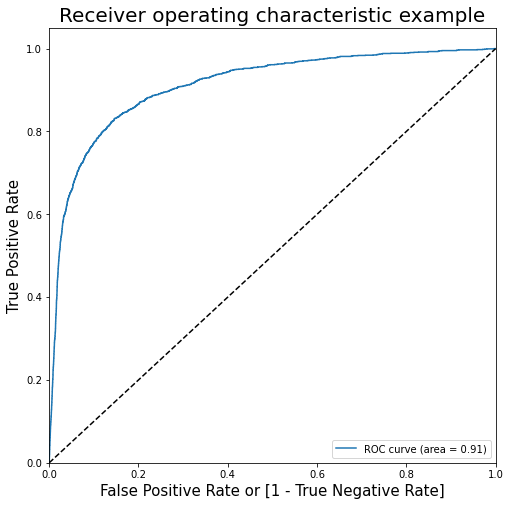

In [90]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Area under ROC Curve is 0.91, which is good for a model. 
         
    </span>
</div>

### 6.1.5 Finding Optimal Cutoff Point

In [91]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)if x%5==0]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  0.0  0.05  0.1  0.15  0.2  0.25  0.3  0.35  0.4  0.45  \
0     0    0.003218    1     0    0     0    0     0    0     0    0     0   
1     0    0.008227    1     0    0     0    0     0    0     0    0     0   
2     0    0.000516    1     0    0     0    0     0    0     0    0     0   
3     0    0.002731    1     0    0     0    0     0    0     0    0     0   
4     0    0.029881    1     0    0     0    0     0    0     0    0     0   

   0.5  0.55  0.6  0.65  0.7  0.75  0.8  0.85  0.9  0.95  
0    0     0    0     0    0     0    0     0    0     0  
1    0     0    0     0    0     0    0     0    0     0  
2    0     0    0     0    0     0    0     0    0     0  
3    0     0    0     0    0     0    0     0    0     0  
4    0     0    0     0    0     0    0     0    0     0

In [92]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['PROBABILITY','ACCURACY','PRECISION','RECALL'])

num = [float(x)/100 for x in range(100) if x%5==0]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final[i] )
    accuracy = (cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Churn'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,prec[1], rec[1]]

#let's view the values
cutoff_df    

PROBABILITY  ACCURACY  PRECISION    RECALL
0.00         0.00  0.080952   1.000000  0.000000
0.05         0.05  0.780762   0.254315  0.884118
0.10         0.10  0.866429   0.356605  0.808235
0.15         0.15  0.898571   0.427949  0.751176
0.20         0.20  0.916857   0.490589  0.705294
0.25         0.25  0.924667   0.527596  0.663529
0.30         0.30  0.931143   0.566077  0.640000
0.35         0.35  0.934857   0.596176  0.605294
0.40         0.40  0.938286   0.631169  0.571765
0.45         0.45  0.938762   0.652880  0.520000
0.50         0.50  0.937810   0.678119  0.441176
0.55         0.55  0.933381   0.673988  0.342941
0.60         0.60  0.929762   0.683524  0.246471
0.65         0.65  0.926857   0.690698  0.174706
0.70         0.70  0.924238   0.686007  0.118235
0.75         0.75  0.922619   0.719298  0.072353
0.80         0.80  0.920714   0.733333  0.032353
0.85         0.85  0.919905   0.736842  0.016471
0.90         0.90  0.919524   0.750000  0.008824
0.95         0.95  0.919238   1.000000  0.002353

We were given "it is more important to identify churners than the non-churners accurately"

So the correct metric is Precision and recall (f1_score) .

In [93]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Churn'], y_train_pred_final['Churn_Prob'])

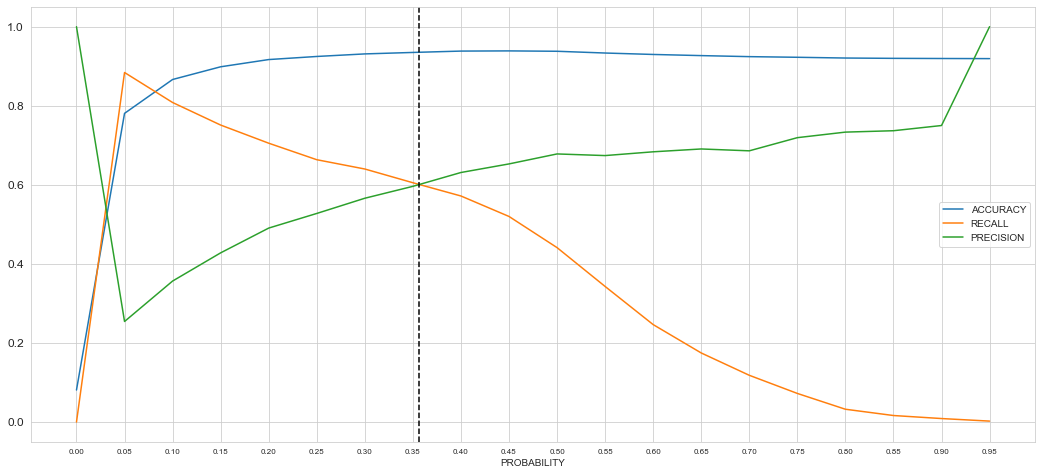

In [94]:
# Let's plot accuracy sensitivity and specificity for above calculated.
sns.set_style("whitegrid")
cutoff_df.plot.line(x='PROBABILITY', y=['ACCURACY','RECALL','PRECISION']  , figsize =(18,8))
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.356, color='black', linestyle='--',) # additing a line at recall and precision intercection
plt.yticks(size=12)
plt.show()

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  - From the above graph, probability at 0.356 has an ideal trade off between Precision and Recall
         
    </span>
</div>

In [95]:
y_train_pred_final = y_train_pred_final[['Churn','Churn_Prob']]
y_train_pred_final['Churn_prediction'] = y_train_pred_final['Churn_Prob'].map( lambda x: 1 if x > 0.356 else 0)
y_train_pred_final

Churn  Churn_Prob  Churn_prediction
0         0    0.003218                 0
1         0    0.008227                 0
2         0    0.000516                 0
3         0    0.002731                 0
4         0    0.029881                 0
...     ...         ...               ...
20995     0    0.000557                 0
20996     0    0.001590                 0
20997     0    0.015102                 0
20998     0    0.005713                 0
20999     0    0.018029                 0

[21000 rows x 3 columns]

### 6.1.6 Evaluation Matrix

In [96]:
# Let's check the overall accuracy.
Accuracy_Train = accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Churn_prediction)
Accuracy_Train

0.9354761904761905

In [97]:
CM = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Churn_prediction)
CM

array([[18622,   678],
       [  677,  1023]], dtype=int64)

In [98]:
Precision_Train = CM[1,1]/(CM[0,1]+CM[1,1])
Precision_Train

0.6014109347442681

In [99]:
Recall_Train = CM[1,1]/(CM[1,0]+CM[1,1])
Recall_Train

0.601764705882353

### 6.1.7  Model Evalution (on Test Dataset)

In [100]:
X_test_sm = sm.add_constant(X_test_lr[columns_considered])
y_test_predicted = log_reg.predict(X_test_sm)

In [101]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities to process further
y_test_pred_final = pd.DataFrame({
    'Churn':y_test_lr.values,
    'Churn_Prob':y_test_predicted.values.reshape(-1)
})
y_test_pred_final['Churn_prediction'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.356 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  Churn_prediction
0     0    0.008939                 0
1     0    0.101467                 0
2     0    0.010532                 0
3     0    0.011229                 0
4     0    0.019173                 0

In [102]:
# Let's check the accuracy for test datset.
Accuracy_Test = accuracy_score(y_test_pred_final.Churn, y_test_pred_final.Churn_prediction)
Accuracy_Test

0.9352222222222222

In [103]:
CM_test = confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Churn_prediction)
CM_test

array([[7982,  290],
       [ 293,  435]], dtype=int64)

In [104]:
Precision_Test = CM_test[1,1]/(CM_test[0,1]+CM_test[1,1])
Precision_Test

0.6

In [105]:
Recall_Test = CM_test[1,1]/(CM_test[1,0]+CM_test[1,1])
Recall_Test

0.5975274725274725

#### To compare the metrics of Train and Trest data

In [106]:
print("\t \t Train  \t Test")
print("Accuracy   \t", round(Accuracy_Train,3) ,'\t\t', round(Accuracy_Test,3))
print("Precision  \t", round(Precision_Train,3) ,'\t\t', round(Precision_Test,3))
print("Recall     \t", round(Recall_Train,3) ,'\t\t', round(Recall_Test,3))

	 	 Train  	 Test
Accuracy   	 0.935 		 0.935
Precision  	 0.601 		 0.6
Recall     	 0.602 		 0.598


<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        

  -  The Model has a good accuracy of 93.5% and 93.5% respectively on both Train and Test data. 
  
  -  The Model seems good. It's neither over fitting nor under fitting.
        
  -  The Model has precision and recall over 60% for test datasets, which was best of the model built but could have got better.
         
    </span>
</div>

### 6.1.8 Model Features / Predictors

In [107]:
# coefficients of final model
feature_explanation = log_reg.params
feature_explanation

const                    -4.010834
onnet_mou_8              -0.366671
offnet_mou_8             -0.332377
roam_og_mou_8_log1p       0.372325
std_og_mou_8              0.436333
loc_ic_t2t_mou_8_log1p   -0.654192
loc_ic_t2m_mou_8         -0.726859
loc_ic_t2f_mou_8_log1p   -0.201065
loc_ic_mou_7              0.310743
std_ic_mou_8_log1p       -0.373082
total_ic_mou_6            0.284034
spl_ic_mou_8_log1p       -0.597488
last_day_rch_amt_8       -0.311798
total_rech_data_7         0.121780
total_rech_data_8        -0.442720
av_rech_amt_data_6       -0.375928
av_rech_amt_data_8       -0.265378
vol_2g_mb_8_log1p        -0.333154
arpu_2g_6                 0.236171
monthly_2g_8             -0.218661
vbc_3g_8                 -0.185951
term                     -0.196432
decrease_in_recharge      0.324551
total_rech_6              0.288937
dtype: float64

<div class="alert alert-block alert-info">
    <span>
      <b>Observation 2: </b><br>  
          

  -  We have dropped so many columns and there could be some valuable information that is lost that could have given us more performance in metrics
  -  One way to solve this is by using PCA
         
    </span>
</div>

## 6.2 PCA

In [108]:
X_train_to_PCA = X_train.copy()
X_test_to_PCA = X_test.copy()

In [109]:
pca = PCA(random_state=100)
pca.fit(X_train_to_PCA)

PCA(random_state=100)

In [110]:
pca.components_

array([[ 1.18069536e-01,  1.27677870e-01,  1.19236012e-01, ...,
        -4.09390543e-02, -4.18319748e-02, -4.77909258e-02],
       [ 7.67105919e-02,  8.51093502e-02,  1.03203725e-01, ...,
         1.20373148e-01,  1.27423138e-01,  1.41442768e-01],
       [ 8.48642817e-02,  1.07672305e-01,  8.63908715e-02, ...,
         9.42750085e-02,  1.10157183e-01,  1.17756473e-01],
       ...,
       [-8.11466190e-04,  3.57459927e-04,  4.28784095e-04, ...,
         5.76034192e-03,  4.66313718e-03, -7.99370109e-03],
       [ 0.00000000e+00,  5.18461285e-17,  1.67689032e-16, ...,
         2.03984154e-16,  3.52331649e-16, -4.21957475e-16],
       [ 0.00000000e+00, -1.95627973e-16, -1.15640098e-16, ...,
         1.46043673e-16,  2.33044226e-16,  7.88090546e-18]])

In [111]:
#Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([1.52373645e-01, 1.18124355e-01, 7.50539086e-02, 5.88586716e-02,
       3.86927794e-02, 2.96181031e-02, 2.70550396e-02, 2.33788652e-02,
       2.28196470e-02, 2.07459294e-02, 1.96277773e-02, 1.81041053e-02,
       1.74244376e-02, 1.54507226e-02, 1.43836510e-02, 1.38294214e-02,
       1.29488804e-02, 1.24445436e-02, 1.21898945e-02, 1.08832911e-02,
       1.02184053e-02, 9.80448748e-03, 8.96556250e-03, 8.66874743e-03,
       8.45446395e-03, 7.69131709e-03, 7.36558851e-03, 6.70954926e-03,
       6.60666006e-03, 6.34961358e-03, 6.20345090e-03, 6.16337865e-03,
       5.98841730e-03, 5.82242505e-03, 5.59751296e-03, 5.48463660e-03,
       5.44687820e-03, 5.27970614e-03, 5.04731833e-03, 4.94774476e-03,
       4.76691978e-03, 4.63929339e-03, 4.59215351e-03, 4.31317799e-03,
       4.29356742e-03, 4.07738679e-03, 3.94462524e-03, 3.90415204e-03,
       3.73251619e-03, 3.61959577e-03, 3.46004143e-03, 3.39341662e-03,
       3.22112017e-03, 3.18458883e-03, 3.04550518e-03, 2.96058396e-03,
      

In [112]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

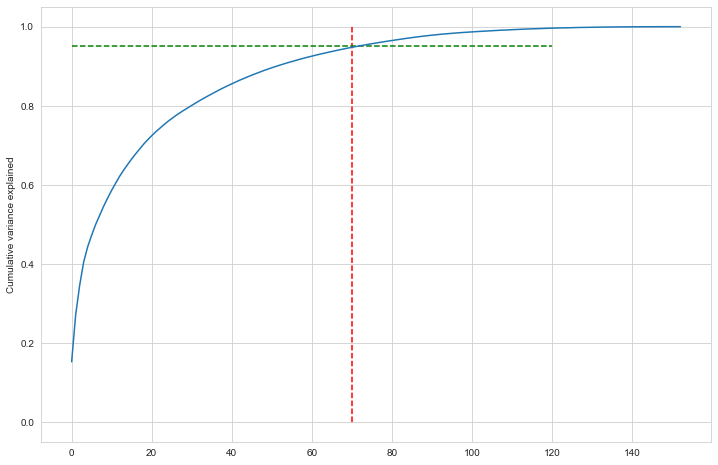

In [113]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
          

  -  From the graph we can observe, 90% of the variance in data is explained by 70 columns
         
    </span>
</div>

In [114]:
pca_final = IncrementalPCA(n_components=70)

In [115]:
#Applying the transformation on the train set
df_train_pca = pca_final.fit_transform(X_train_to_PCA)

In [116]:
df_train_pca.shape

(21000, 70)

In [117]:
X_train_pca = pd.DataFrame(data=df_train_pca,index=X_train_to_PCA.index, columns=["column_"+str(a) for a in range(df_train_pca.shape[1])])
X_train_pca

column_0  column_1  column_2  column_3  column_4  column_5  column_6  \
21360  -1.390436 -2.054370  0.959225  3.065132  3.297592 -0.943072  1.138906   
18049   2.628681 -3.436959  0.672735  2.001729  1.344469 -0.050751 -1.922885   
27072  10.410730  3.436454 -5.183934  1.766809 -0.221019 -0.526591 -1.958052   
887     7.663424  1.076868 -0.216828 -1.030276  1.056648  0.376457  1.561344   
23009  -1.331448 -2.910113 -1.640039 -2.074678  0.207395 -0.704613 -1.249229   
...          ...       ...       ...       ...       ...       ...       ...   
8228    5.181271  4.313556 -2.287650  3.402954 -5.965126 -2.856148 -1.417114   
6495    5.220639  0.885348 -1.978173  5.507078  0.354954  1.445599 -1.516290   
2432    7.122087  1.538709 -1.545209 -0.517840  5.410638  0.784869 -2.664106   
1462   -6.134625 -2.078992 -2.494902 -2.409301  0.290280 -2.728282  1.035249   
27022   0.095704  2.030544 -6.415580 -0.627720 -0.706392  0.064317 -0.523927   

       column_7  column_8  column_9  column_10  column_11  column_12  \
21360  0.098415 -1.949663  0.644183   0.301919  -1.671757  -0.380013   
18049  1.946474 -0.867827 -1.887815   3.687273   0.037749   1.549974   
27072 -0.651413 -2.113530 -2.116858  -0.276751  -2.013474  -0.012624   
887    0.161384 -0.305779  0.818767  -1.382427  -1.337393  -0.439357   
23009  0.319442 -0.176250  2.066966  -0.506377  -0.549158   0.742135   
...         ...       ...       ...        ...        ...        ...   
8228  -2.272270  0.293113  3.109906  -3.397630   4.755298  -2.081550   
6495  -0.498593 -0.960209 -1.965817   0.576626  -1.478298  -1.361918   
2432   0.484061 -1.503039  2.440712   0.871022  -0.223207  -3.820227   
1462  -2.381802  2.570774 -1.225188  -0.057559   0.267723  -0.728256   
27022 -2.106364  0.704388 -0.708952   0.370497  -0.406868  -1.382015   

       column_13  column_14  column_15  column_16  column_17  column_18  \
21360   2.413011   0.616079  -0.176979   0.441278  -0.006401   1.087877   
18049   0.305082  -2.086835  -0.447233  -0.138290  -1.142273   2.118310   
27072  -1.356469  -0.799754  -1.081970   1.694810  -1.316080  -0.885915   
887    -0.659487  -0.039807  -1.325203   1.432434  -2.488688  -1.186382   
23009  -0.276458  -0.106522  -1.427030  -0.147942  -1.052676   0.388746   
...          ...        ...        ...        ...        ...        ...   
8228   -0.099648   3.013009   1.669729  -0.095933  -1.964376  -3.898391   
6495    0.527780  -2.459424   0.097373   0.906917  -0.651378   1.569064   
2432   -0.221871  -0.536804   2.804042   0.649897  -0.107726   0.657313   
1462   -0.108624   0.734252   1.322122   1.607684   0.172397  -0.184660   
27022  -1.170901  -0.142262   1.971676  -0.828342  -1.298332  -1.596505   

       column_19  column_20  column_21  column_22  column_23  column_24  \
21360  -0.261777  -0.593667  -1.405390   2.653071  -0.464805  -0.566209   
18049   0.049456   0.046917  -0.630414   0.258140  -0.698569   0.446106   
27072   1.367062  -0.532426  -1.228367  -0.287903  -0.282387  -1.935743   
887     1.455487   0.415073   0.943488   1.127470  -0.321004  -1.525256   
23009   1.959804   0.265339  -0.622868  -1.044256  -0.141882  -0.087098   
...          ...        ...        ...        ...        ...        ...   
8228    1.342274  -1.140628  -2.354585  -1.251457  -0.819500  -1.419099   
6495    0.912718  -1.142637   0.886792   0.001074  -1.171070  -0.050193   
2432    1.151424  -1.601338   0.753001  -0.876139  -0.715068  -0.379665   
1462   -1.564489  -0.695429   0.749144   0.168182  -0.610296   0.060098   
27022  -2.177225   0.749790   0.347540  -0.394714  -0.584672  -0.376980   

       column_25  column_26  column_27  column_28  column_29  column_30  \
21360   0.270395  -0.271916   0.914202  -0.237958  -0.201639   0.427613   
18049  -0.170496  -1.251817   0.965880   0.089488  -3.018612  -0.790211   
27072   0.293054   0.014819   0.635749   0.371411  -0.236456   0.165587   
887    -0.725300  -1.281170   0.299591  -0.255815   1.522939   0.189620   
23009

In [118]:
#Applying the transformation on the test set
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9000, 70)

In [119]:
# We got the values as an 2 dim list, making it into Dataframe with the same indexes as before.
X_test_pca = pd.DataFrame(data=df_test_pca,index=X_test_to_PCA.index, columns=["column_"+str(a) for a in range(df_test_pca.shape[1])])
X_test_pca

column_0  column_1  column_2  column_3  column_4  column_5  column_6  \
16534 -0.759558  3.350845  2.840288  3.413022  5.081857 -1.315843 -1.173783   
14325  0.562881 -4.378923  1.358925 -2.840912  1.245589 -0.392453  1.580390   
5338   8.302157  0.750443 -0.510740 -1.437514  2.585956  0.136741  2.452192   
16676  3.707839 -2.916931  0.428241  0.071581  0.055629 -4.014665 -1.254644   
10105  7.505462  3.645577 -6.453055 -1.427160  2.704322  3.132696  1.739666   
...         ...       ...       ...       ...       ...       ...       ...   
5395  -2.578671 -2.131613  0.093240  0.445238  4.769508  0.497381  0.388504   
11901  4.455128 -4.328679  3.315658 -1.556092  0.016534  0.996564 -2.626091   
27444 -0.865315 -3.503386 -0.674064 -1.748702 -2.537399  4.499967 -1.341116   
20521  1.273720  4.521388 -4.557448 -1.223222  2.362669 -1.027873 -0.210300   
13977 -1.064589  3.086001 -4.343648 -1.161013  2.651842  1.017273 -2.108996   

       column_7  column_8  column_9  column_10  column_11  column_12  \
16534  7.099474  1.235998 -4.570764  -1.035659   4.855255   1.548615   
14325  3.486472  0.892390 -2.236321   0.529191  -2.371303  -1.294516   
5338  -2.170979 -3.545685  2.377723  -0.396688   0.685231   0.030160   
16676  0.352134 -0.527459  1.849197  -1.930010  -1.453462  -1.730571   
10105 -1.751173 -4.461080  2.274940   1.637034   2.310435   0.184571   
...         ...       ...       ...        ...        ...        ...   
5395  -2.041203 -1.004715 -2.255517  -1.092332   0.038658   0.103372   
11901 -0.503947  1.611830  2.604817  -2.702906   0.247044  -2.583983   
27444  0.178811  0.390272  1.233338   1.352967   0.379798  -0.044296   
20521 -1.462156  2.566999 -0.425573   0.483564  -0.169728  -0.290038   
13977  1.475036 -0.898626  0.292402   0.475853  -0.502484  -1.592985   

       column_13  column_14  column_15  column_16  column_17  column_18  \
16534  -0.993800  -0.477978   1.207271   3.794094   0.538969  -1.486146   
14325   0.099654   0.431907   0.035481   0.219179   0.012222  -0.255841   
5338   -0.339273   2.089123  -0.677749  -1.635100  -1.362021  -1.504116   
16676  -1.497335   0.490377   0.034757  -1.374947   0.987827   1.744330   
10105  -0.970625  -0.831091   2.960378  -3.061397   0.159255  -0.532091   
...          ...        ...        ...        ...        ...        ...   
5395    0.486653   0.321263   0.578563  -0.990155   0.689818  -2.414549   
11901   1.238000   0.077171   0.745398   0.528333   1.211281  -0.156078   
27444   1.472066   0.581291   0.698194   0.764230   0.525838   1.696353   
20521   1.015106   0.173536   0.411257   1.888916   1.501255   3.310379   
13977  -2.263843   0.255310   0.140033   0.158367   4.425120   2.076221   

       column_19  column_20  column_21  column_22  column_23  column_24  \
16534   2.333661   1.367754  -3.739732  -0.008574  -0.930986  -0.271244   
14325   0.505656  -0.629158  -2.724612  -0.993933  -0.306536  -0.032571   
5338    0.563225  -0.978249  -1.428213  -0.248853   0.789720   0.168259   
16676   0.093864  -0.351235  -0.519101   0.482682   0.899803   1.521748   
10105  -0.125032  -0.679307  -0.895683   1.153483   0.410362   0.022019   
...          ...        ...        ...        ...        ...        ...   
5395    0.319851  -1.417717   1.770294  -1.281149   0.609435   0.370278   
11901   0.838777   0.563523   1.891218   0.233624   0.392873  -0.490941   
27444   0.698777  -0.835996  -0.510148  -0.128265   0.046710  -0.446305   
20521   0.969323   0.530628   0.405951   0.113696   0.282186  -0.006883   
13977  -0.217925  -0.663815   2.979574   0.022516  -0.208022   0.583091   

       column_25  column_26  column_27  column_28  column_29  column_30  \
16534   1.073238  -1.095066   0.030228   0.989852  -0.724145  -0.171183   
14325   1.709035  -0.896025   0.427211   2.134322   0.166285   0.311006   
5338   -1.547206  -0.545152   0.143528   1.274917   0.226059  -1.105188   
16676  -0.781357   0.235440  -0.465218  -0.159823  -0.818643  -1.633787   
10105   0.708850

## 6.3 Building a Logistic regression model with PCA

In [120]:
X_train_lr_pca = X_train_pca.copy()
X_test_lr_pca = X_test_pca.copy()
y_train_lr_pca = y_train.copy()
y_test_lr_pca = y_test.copy()

In [121]:
columns_considered = list(X_train_lr_pca.columns)

In [122]:
logisticmodel_stats(X_train_lr_pca[columns_considered],y_train_lr_pca,X_test_lr_pca[columns_considered],y_test_lr_pca)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20929
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3513.5
Date:                Wed, 04 May 2022   Deviance:                       7027.0
Time:                        22:08:20   Pearson chi2:                 4.42e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0088      0.068    -59.239      0.0

In [123]:
checking_vif(X_train_lr_pca[columns_considered])

     Features  VIF
0    column_0  1.0
44  column_44  1.0
50  column_50  1.0
49  column_49  1.0
48  column_48  1.0
47  column_47  1.0
46  column_46  1.0
45  column_45  1.0
43  column_43  1.0
52  column_52  1.0
42  column_42  1.0
41  column_41  1.0
40  column_40  1.0
39  column_39  1.0
38  column_38  1.0
37  column_37  1.0
51  column_51  1.0
53  column_53  1.0
1    column_1  1.0
62  column_62  1.0
68  column_68  1.0
67  column_67  1.0
66  column_66  1.0
65  column_65  1.0
64  column_64  1.0
63  column_63  1.0
61  column_61  1.0
54  column_54  1.0
60  column_60  1.0
59  column_59  1.0
58  column_58  1.0
57  column_57  1.0
56  column_56  1.0
55  column_55  1.0
36  column_36  1.0
35  column_35  1.0
34  column_34  1.0
9    column_9  1.0
15  column_15  1.0
14  column_14  1.0
13  column_13  1.0
12  column_12  1.0
11  column_11  1.0
10  column_10  1.0
8    column_8  1.0
33  column_33  1.0
7    column_7  1.0
6    column_6  1.0
5    column_5  1.0
4    column_4  1.0
3    column_3  1.0
2    column_

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
          

  -  After PCA there is no problem with multi collinearity, but few have high p values.
         
    </span>
</div>

### 6.3.1 Feature Selection

In [124]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=45)

rfe = rfe.fit(X_train_lr_pca, y_train_lr_pca)

In [125]:
list(zip(X_train_lr_pca.columns, rfe.support_, rfe.ranking_))

[('column_0', False, 7),
 ('column_1', True, 1),
 ('column_2', True, 1),
 ('column_3', True, 1),
 ('column_4', True, 1),
 ('column_5', True, 1),
 ('column_6', False, 17),
 ('column_7', False, 9),
 ('column_8', True, 1),
 ('column_9', True, 1),
 ('column_10', True, 1),
 ('column_11', True, 1),
 ('column_12', True, 1),
 ('column_13', True, 1),
 ('column_14', False, 11),
 ('column_15', False, 2),
 ('column_16', False, 14),
 ('column_17', False, 5),
 ('column_18', False, 18),
 ('column_19', True, 1),
 ('column_20', True, 1),
 ('column_21', True, 1),
 ('column_22', False, 15),
 ('column_23', True, 1),
 ('column_24', True, 1),
 ('column_25', False, 21),
 ('column_26', True, 1),
 ('column_27', True, 1),
 ('column_28', True, 1),
 ('column_29', True, 1),
 ('column_30', True, 1),
 ('column_31', False, 25),
 ('column_32', False, 3),
 ('column_33', False, 6),
 ('column_34', False, 10),
 ('column_35', True, 1),
 ('column_36', True, 1),
 ('column_37', True, 1),
 ('column_38', True, 1),
 ('column_39'

In [126]:
### selecting columns post rfe
columns_suggested_by_RFE = X_train_lr_pca.columns[rfe.support_]
columns_suggested_by_RFE

Index(['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_8',
       'column_9', 'column_10', 'column_11', 'column_12', 'column_13',
       'column_19', 'column_20', 'column_21', 'column_23', 'column_24',
       'column_26', 'column_27', 'column_28', 'column_29', 'column_30',
       'column_35', 'column_36', 'column_37', 'column_38', 'column_41',
       'column_42', 'column_44', 'column_46', 'column_47', 'column_48',
       'column_49', 'column_50', 'column_52', 'column_53', 'column_55',
       'column_57', 'column_58', 'column_59', 'column_60', 'column_63',
       'column_64', 'column_67', 'column_68', 'column_69'],
      dtype='object')

In [127]:
columns_considered = list(columns_suggested_by_RFE)

In [128]:
logisticmodel_stats(X_train_lr_pca[columns_considered],y_train_lr_pca,X_test_lr_pca[columns_considered],y_test_lr_pca)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20954
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3550.7
Date:                Wed, 04 May 2022   Deviance:                       7101.4
Time:                        22:08:43   Pearson chi2:                 4.00e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9919      0.065    -61.877      0.0

In [129]:
checking_vif(X_train_lr_pca[columns_considered])

     Features  VIF
0    column_1  1.0
23  column_37  1.0
25  column_41  1.0
26  column_42  1.0
27  column_44  1.0
28  column_46  1.0
29  column_47  1.0
30  column_48  1.0
31  column_49  1.0
32  column_50  1.0
33  column_52  1.0
34  column_53  1.0
35  column_55  1.0
36  column_57  1.0
37  column_58  1.0
38  column_59  1.0
39  column_60  1.0
40  column_63  1.0
41  column_64  1.0
42  column_67  1.0
43  column_68  1.0
24  column_38  1.0
22  column_36  1.0
1    column_2  1.0
21  column_35  1.0
2    column_3  1.0
3    column_4  1.0
4    column_5  1.0
5    column_8  1.0
6    column_9  1.0
7   column_10  1.0
8   column_11  1.0
9   column_12  1.0
10  column_13  1.0
11  column_19  1.0
12  column_20  1.0
13  column_21  1.0
14  column_23  1.0
15  column_24  1.0
16  column_26  1.0
17  column_27  1.0
18  column_28  1.0
19  column_29  1.0
20  column_30  1.0
44  column_69  1.0


In [130]:
# Dropping column_58 due to High p value
columns_considered.remove('column_58')

In [131]:
logisticmodel_stats(X_train_lr_pca[columns_considered],y_train_lr_pca,X_test_lr_pca[columns_considered],y_test_lr_pca)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20955
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3552.1
Date:                Wed, 04 May 2022   Deviance:                       7104.2
Time:                        22:08:50   Pearson chi2:                 3.99e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9883      0.064    -61.956      0.0

In [132]:
checking_vif(X_train_lr_pca[columns_considered])

     Features  VIF
0    column_1  1.0
1    column_2  1.0
24  column_38  1.0
25  column_41  1.0
26  column_42  1.0
27  column_44  1.0
28  column_46  1.0
29  column_47  1.0
30  column_48  1.0
31  column_49  1.0
32  column_50  1.0
33  column_52  1.0
34  column_53  1.0
35  column_55  1.0
36  column_57  1.0
37  column_59  1.0
38  column_60  1.0
39  column_63  1.0
40  column_64  1.0
41  column_67  1.0
42  column_68  1.0
23  column_37  1.0
22  column_36  1.0
21  column_35  1.0
10  column_13  1.0
2    column_3  1.0
3    column_4  1.0
4    column_5  1.0
5    column_8  1.0
6    column_9  1.0
7   column_10  1.0
8   column_11  1.0
9   column_12  1.0
11  column_19  1.0
20  column_30  1.0
12  column_20  1.0
13  column_21  1.0
14  column_23  1.0
15  column_24  1.0
16  column_26  1.0
17  column_27  1.0
18  column_28  1.0
19  column_29  1.0
43  column_69  1.0


<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   All features have p value less than 0.05 and VIF values less than 5
         
    </span>
</div>

### 6.3.2 Building the model

In [133]:
X_train_lr_sm = sm.add_constant(X_train_lr_pca[columns_considered])
log_reg = sm.GLM(y_train_lr_pca, X_train_lr_sm, family = sm.families.Binomial(), class_weight=weight_of_class).fit()

### 6.3.3 Predicted Probability Calculation

In [134]:
# Getting the Predicted values on the train set
y_train_pred = log_reg.predict(X_train_lr_sm)
y_train_pred.head(10)

21360    0.002791
18049    0.005477
27072    0.001728
887      0.007879
23009    0.025692
9595     0.761881
14091    0.283791
14693    0.008525
23775    0.171649
19699    0.014249
dtype: float64

In [135]:
#Creating a dataframe with the actual Churn flag and the Predicted probabilities to process further
y_train_pred_final = pd.DataFrame({
    'Churn':y_train_lr_pca.values,
    'Churn_Prob':y_train_pred.values.reshape(-1)
})
y_train_pred_final.head()

Churn  Churn_Prob
0     0    0.002791
1     0    0.005477
2     0    0.001728
3     0    0.007879
4     0    0.025692

### 6.3.4 ROC Curve

n ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.title('Receiver operating characteristic example', fontsize = 20)
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [137]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

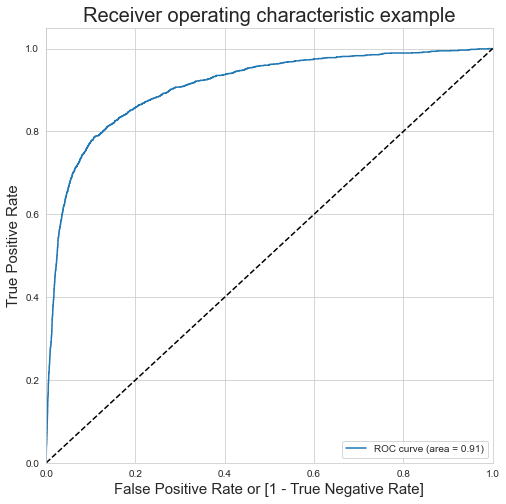

In [138]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  -   Area under ROC Curve is 0.91, which is good for a model. 
         
    </span>
</div>

### 6.3.5 Finding Optimal Cutoff Point

In [139]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)if x%5==0]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  0.0  0.05  0.1  0.15  0.2  0.25  0.3  0.35  0.4  0.45  \
0     0    0.002791    1     0    0     0    0     0    0     0    0     0   
1     0    0.005477    1     0    0     0    0     0    0     0    0     0   
2     0    0.001728    1     0    0     0    0     0    0     0    0     0   
3     0    0.007879    1     0    0     0    0     0    0     0    0     0   
4     0    0.025692    1     0    0     0    0     0    0     0    0     0   

   0.5  0.55  0.6  0.65  0.7  0.75  0.8  0.85  0.9  0.95  
0    0     0    0     0    0     0    0     0    0     0  
1    0     0    0     0    0     0    0     0    0     0  
2    0     0    0     0    0     0    0     0    0     0  
3    0     0    0     0    0     0    0     0    0     0  
4    0     0    0     0    0     0    0     0    0     0

In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['PROBABILITY','ACCURACY','PRECISION','RECALL'])

num = [float(x)/100 for x in range(100) if x%5==0]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final[i] )
    accuracy = (cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Churn'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,prec[1], rec[1]]

#let's view the values
cutoff_df    

PROBABILITY  ACCURACY  PRECISION    RECALL
0.00         0.00  0.080952   1.000000  0.000000
0.05         0.05  0.772762   0.246535  0.878824
0.10         0.10  0.865286   0.353643  0.802353
0.15         0.15  0.899524   0.430930  0.752353
0.20         0.20  0.917143   0.491870  0.711765
0.25         0.25  0.926762   0.538571  0.665294
0.30         0.30  0.931762   0.571659  0.626471
0.35         0.35  0.935333   0.603261  0.587647
0.40         0.40  0.938238   0.641008  0.538824
0.45         0.45  0.936857   0.653028  0.469412
0.50         0.50  0.936238   0.675413  0.408824
0.55         0.55  0.933952   0.691554  0.332353
0.60         0.60  0.932714   0.723869  0.272941
0.65         0.65  0.931000   0.754564  0.218824
0.70         0.70  0.928714   0.778082  0.167059
0.75         0.75  0.926095   0.776119  0.122353
0.80         0.80  0.923333   0.784810  0.072941
0.85         0.85  0.921810   0.881579  0.039412
0.90         0.90  0.920095   0.892857  0.014706
0.95         0.95  0.919476   0.909091  0.005882

In [141]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Churn'], y_train_pred_final['Churn_Prob'])

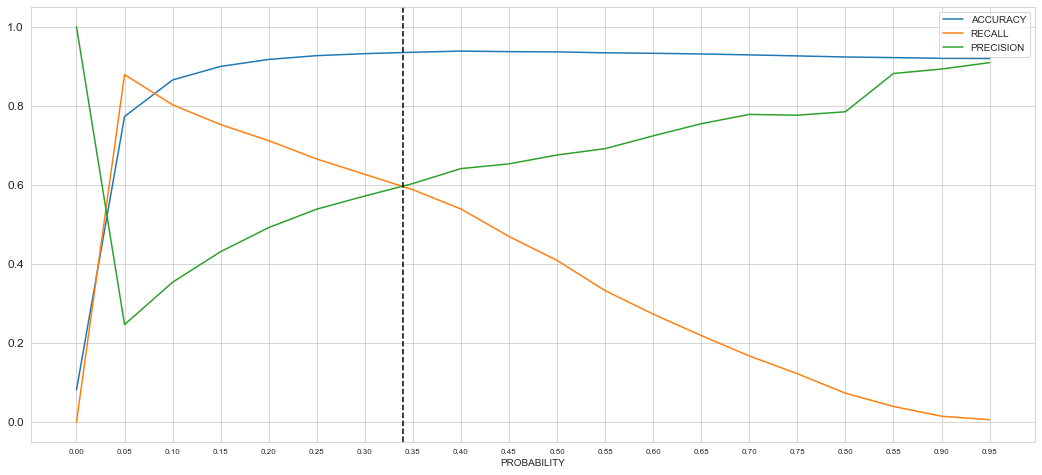

In [142]:
# Let's plot accuracy sensitivity and specificity for above calculated.
sns.set_style("whitegrid")
cutoff_df.plot.line(x='PROBABILITY', y=['ACCURACY','RECALL','PRECISION']  , figsize =(18,8))
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.34, color='black', linestyle='--',) # additing a line at recall and precision intercection
plt.yticks(size=12)
plt.show()

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        
  - From the above graph, probability at 0.342 has an ideal trade off between Precision and Recall
         
    </span>
</div>

In [143]:
y_train_pred_final = y_train_pred_final[['Churn','Churn_Prob']]
y_train_pred_final['Churn_prediction'] = y_train_pred_final['Churn_Prob'].map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final

Churn  Churn_Prob  Churn_prediction
0         0    0.002791                 0
1         0    0.005477                 0
2         0    0.001728                 0
3         0    0.007879                 0
4         0    0.025692                 0
...     ...         ...               ...
20995     0    0.005342                 0
20996     0    0.002697                 0
20997     0    0.030260                 0
20998     0    0.005836                 0
20999     0    0.014085                 0

[21000 rows x 3 columns]

### 6.3.6 Evaluation Matrix

In [144]:
# Let's check the overall accuracy.
Accuracy_Train = accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Churn_prediction)
Accuracy_Train

0.9350952380952381

In [145]:
CM = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Churn_prediction)
CM

array([[18624,   676],
       [  687,  1013]], dtype=int64)

In [146]:
Precision_Train = CM[1,1]/(CM[0,1]+CM[1,1])
Precision_Train

0.5997631734754293

In [147]:
Recall_Train = CM[1,1]/(CM[1,0]+CM[1,1])
Recall_Train

0.5958823529411764

### 6.3.7 Model Evalution (on Test Dataset)

In [148]:
X_test_sm = sm.add_constant(X_test_lr_pca[columns_considered])
y_test_predicted = log_reg.predict(X_test_sm)

In [149]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities to process further
y_test_pred_final = pd.DataFrame({
    'Churn':y_test_lr_pca.values,
    'Churn_Prob':y_test_predicted.values.reshape(-1)
})
y_test_pred_final['Churn_prediction'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  Churn_prediction
0     0    0.003610                 0
1     0    0.083259                 0
2     0    0.013132                 0
3     0    0.011741                 0
4     0    0.024473                 0

In [150]:
# Let's check the accuracy for test datset.
Accuracy_Test = accuracy_score(y_test_pred_final.Churn, y_test_pred_final.Churn_prediction)
Accuracy_Test

0.9342222222222222

In [151]:
CM_test = confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Churn_prediction)
CM_test

array([[7992,  280],
       [ 312,  416]], dtype=int64)

In [152]:
Precision_Test = CM_test[1,1]/(CM_test[0,1]+CM_test[1,1])
Precision_Test

0.5977011494252874

In [153]:
Recall_Test = CM_test[1,1]/(CM_test[1,0]+CM_test[1,1])
Recall_Test

0.5714285714285714

#### To compare the metrics of Train and Trest data

In [154]:
print("\t \t Train  \t Test")
print("Accuracy   \t", round(Accuracy_Train,3) ,'\t\t', round(Accuracy_Test,3))
print("Precision  \t", round(Precision_Train,2) ,'\t\t', round(Precision_Test,2))
print("Recall     \t", round(Recall_Train,2) ,'\t\t', round(Recall_Test,2))

	 	 Train  	 Test
Accuracy   	 0.935 		 0.934
Precision  	 0.6 		 0.6
Recall     	 0.6 		 0.57


<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        

  -  The Model has a good accuracy of 93.5% and 93.5% respectively on both Train and Test data. 
  
  -  The Model seems good. It's neither over fitting nor under fitting.
        
  -  The Model has precision and recall are around 60% for both train and test datasets, which was best of the model built but could have got better.
         
    </span>
</div>

## 6.4 Building a Decision Tree (with PCA)

In [155]:
X_train_dt_pca = X_train_pca.copy()
X_test_dt_pca = X_test_pca.copy()
y_train_dt_pca = y_train.copy()
y_test_dt_pca = y_test.copy()

In [156]:
class_percentage = round(y_train_dt_pca.value_counts(normalize=True),3)
weight_of_class = {0: class_percentage[1], 1:class_percentage[0]}

### 6.4.1 Initial model

In [157]:
dt_initial = DecisionTreeClassifier(class_weight= weight_of_class,random_state=100,max_depth=5)
dt_initial.fit(X_train_dt_pca, y_train_dt_pca)

DecisionTreeClassifier(class_weight={0: 0.081, 1: 0.919}, max_depth=5,
                       random_state=100)

In [158]:
y_train_pred = dt_initial.predict(X_train_dt_pca)
y_test_pred = dt_initial.predict(X_test_dt_pca)

In [159]:
y_train_pred_final = pd.DataFrame({
    'Churn':y_train_dt_pca.values,
    'Churn_Prob':y_train_pred
})
y_train_pred_final.head()

Churn  Churn_Prob
0     0           0
1     0           0
2     0           0
3     0           0
4     0           0

#### Plot the ROC curve

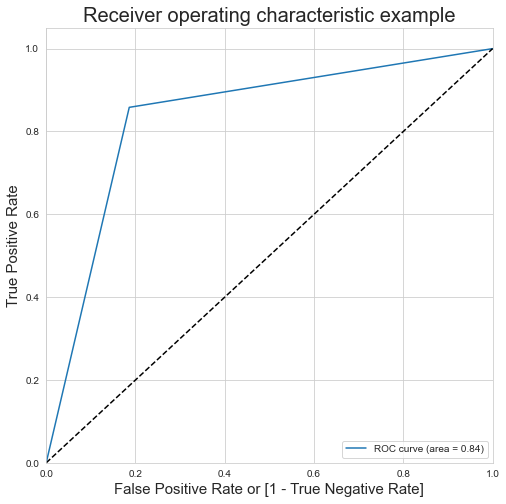

In [160]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        

  -  The initial model has a ROC os 0.84, let's see if we can do better.
         
    </span>
</div>

### 6.4.2 Hyper-parameter tuning for the Decision Tree

#### To find optimal depth

In [161]:
param_grid = {
    'max_depth':range(1, 40,2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

In [162]:
dtree = DecisionTreeClassifier( class_weight= weight_of_class,random_state=100)
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, scoring='f1',
                          cv = n_folds, verbose = 1, n_jobs=-1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train_dt_pca, y_train_dt_pca)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 0.081, 1: 0.919},
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 40, 2)},
             return_train_score=True, scoring='f1', verbose=1)

<div class="alert alert-block alert-warning">
    <span>
      <b>Note : </b><br>  
        
  -  The Weight of class is used in parameters to deal with class imbalance.
  -  As mentioned, our intrest is aboutf1 score, so we set scoring='f1'
   
    </span>
</div>

In [163]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
30       5.573917      0.326486         0.017363        0.003549   
29       5.712100      0.336576         0.017203        0.002792   
26       4.092061      0.109539         0.016787        0.001494   
28       4.954198      0.178017         0.020793        0.007458   
27       4.335381      0.104423         0.016167        0.002561   
31       6.298029      0.535467         0.020565        0.007007   
33       6.134016      0.609155         0.022580        0.010971   
34       6.394726      0.540524         0.015581        0.001348   
25       4.112950      0.171169         0.016632        0.001014   
32       6.752770      0.777554         0.047320        0.053164   
35       7.043679      0.713394         0.023119        0.008698   
24       3.749020      0.347355         0.023121        0.007476   
8        6.883341      0.269362         0.018895        0.006087   
1        2.170919      0.023405         0.021942        0.006645   
2        3.698742      0.119728         0.018852        0.008176   
36       5.606999      0.522129         0.015559        0.001493   
7        7.071211      0.300316         0.030217        0.016380   
23       3.821089      0.195720         0.030725        0.013707   
37       5.401470      0.372586         0.015462        0.001091   
10       6.996838      0.258787         0.019548        0.010260   
11       6.441238      0.397847         0.016983        0.003304   
6        7.091293      0.444042         0.021163        0.011791   
3        5.057508      0.195325         0.015862        0.003849   
38       5.850018      0.599609         0.019659        0.003799   
4        5.809273      0.306234         0.021537        0.005698   
9        7.322572      0.761080         0.016467        0.001948   
22       2.386849      0.083768         0.017787        0.004283   
39       5.898623      0.746177         0.023948        0.010558   
21       1.444606      0.077647         0.016201        0.003424   
12       6.306353      0.359846         0.015166        0.001693   
19       7.664665      0.834596         0.025624        0.012232   
18       6.744553      0.237555         0.017605        0.002801   
17       6.681795      0.441806         0.018804        0.003079   
14       6.668960      0.339115         0.018004        0.005759   
13       6.507888      0.453190         0.019205        0.001904   
16       6.590439      0.420693         0.015451        0.001194   
15       6.435289      0.474495         0.013699        0.000867   
5        7.095942      0.336487         0.015958        0.001669   
0        0.827142      0.022409         0.023537        0.011811   
20       0.512790      0.052289         0.019202        0.005730   

   param_criterion param_max_depth                                     params  \
30            gini              21     {'criterion': 'gini', 'max_depth': 21}   
29            gini              19     {'criterion': 'gini', 'max_depth': 19}   
26            gini              13     {'criterion': 'gini', 'max_depth': 13}   
28            gini              17     {'criterion': 'gini', 'max_depth': 17}   
27            gini              15     {'criterion': 'gini', 'max_depth': 15}   
31            gini              23     {'criterion': 'gini', 'max_depth': 23}   
33            gini              27     {'criterion': 'gini', 'max_depth': 27}   
34            gini              29     {'criterion': 'gini', 'max_depth': 29}   
25            gini              11     {'criterion': 'gini', 'max_depth': 11}   
32            gini              25     {'criterion': 'gini', 'max_depth': 25}   
35            gini              31     {'criterion': 'gini', 'max_depth': 31}   
24            gini               9      {'criterion': 'gini', 'max_depth': 9}   
8          entropy              17  {'criterion': 'entropy', 'max_depth': 17}   
1          entropy               3   {'criterion': 'entropy', 'max_depth': 3}   


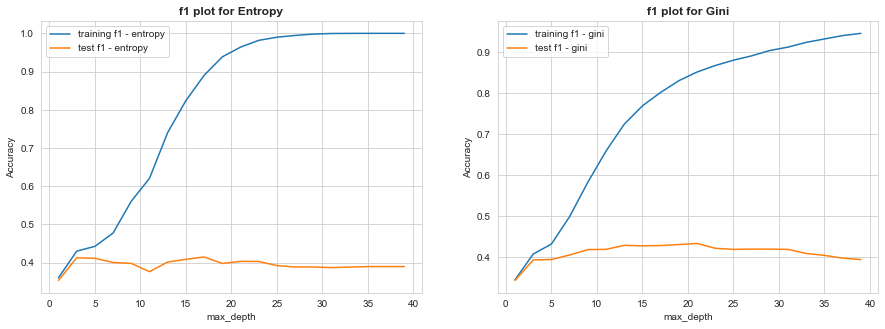

In [164]:
plt.figure(figsize=(15, 5))
    
plt.subplot(1,2,1)
plt.title('f1 plot for Entropy', weight='bold')
plt.plot(cv_results["param_max_depth"][cv_results['param_criterion']=='entropy'], 
         cv_results["mean_train_score"][cv_results['param_criterion']=='entropy'], 
         label="training f1 - entropy")
plt.plot(cv_results["param_max_depth"][cv_results['param_criterion']=='entropy'], 
         cv_results["mean_test_score"][cv_results['param_criterion']=='entropy'], 
         label="test f1 - entropy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()   
    
plt.subplot(1,2,2)
plt.title('f1 plot for Gini', weight='bold')
plt.plot(cv_results["param_max_depth"][cv_results['param_criterion']=='gini'], 
         cv_results["mean_train_score"][cv_results['param_criterion']=='gini'], 
         label="training f1 - gini")
plt.plot(cv_results["param_max_depth"][cv_results['param_criterion']=='gini'], 
         cv_results["mean_test_score"][cv_results['param_criterion']=='gini'], 
         label="test f1 - gini")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        

  -  The gini is doing a good job compared to entropy and in the depth range of 10 to 25.
         
    </span>
</div>

#### Now we will tune Minimum samples leaf and min samples split

In [165]:
param_grid = {
    'max_depth': [10, 15, 20, 25],
    'min_samples_leaf': [10, 20, 50],
    'min_samples_split': [20, 50, 100],
    'criterion': ["gini"]
}

n_folds = 5

In [166]:
dtree = DecisionTreeClassifier( class_weight= weight_of_class,random_state=100)
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,scoring='f1', 
                          cv = n_folds, verbose = 1, n_jobs=-1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train_dt_pca, y_train_dt_pca)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 0.081, 1: 0.919},
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10, 15, 20, 25],
                         'min_samples_leaf': [10, 20, 50],
                         'min_samples_split': [20, 50, 100]},
             return_train_score=True, scoring='f1', verbose=1)

In [167]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        4.180862      0.123917         0.018789        0.003984   
4        4.105572      0.197007         0.019841        0.004553   
3        3.311564      0.048079         0.017187        0.001924   
1        4.157771      0.177096         0.019299        0.006518   
5        4.126210      0.200154         0.020605        0.007591   
13       4.855335      0.351792         0.015789        0.002794   
6        3.544085      0.130889         0.019414        0.008874   
7        3.308511      0.029126         0.023001        0.006893   
8        3.680236      0.109804         0.028194        0.012287   
22       5.026232      0.456807         0.030419        0.020409   
16       4.506726      0.238683         0.013996        0.000904   
15       4.142961      0.263800         0.020812        0.006051   
17       4.684989      0.510584         0.021611        0.007319   
31       4.548178      0.336846         0.018949        0.003622   
2        3.626942      0.173850         0.016803        0.003564   
24       3.833106      0.375698         0.014603        0.001516   
33       3.730393      0.321125         0.017155        0.002130   
26       4.609738      0.424709         0.018779        0.003165   
25       4.112798      0.410696         0.017998        0.003893   
35       3.857724      0.383242         0.014170        0.002209   
34       3.803096      0.375285         0.017353        0.004910   
9        4.806391      0.270763         0.016791        0.002771   
12       4.605731      0.405252         0.019798        0.003942   
21       4.530738      0.319748         0.014794        0.001601   
30       4.299490      0.323987         0.015558        0.002409   
27       5.019980      0.519914         0.017753        0.004737   
18       5.584706      0.479728         0.021273        0.005175   
14       4.567048      0.126670         0.016961        0.003146   
10       4.663800      0.133263         0.020999        0.008809   
23       4.180967      0.333842         0.015608        0.001953   
32       4.634121      0.434647         0.016260        0.002349   
28       4.853725      0.545885         0.018551        0.003969   
19       5.030711      0.581078         0.015662        0.001983   
11       4.647988      0.191962         0.018188        0.004143   
20       4.683607      0.396178         0.015992        0.002100   
29       4.581154      0.476259         0.015160        0.000978   

   param_criterion param_max_depth param_min_samples_leaf  \
0             gini              10                     10   
4             gini              10                     20   
3             gini              10                     20   
1             gini              10                     10   
5             gini              10                     20   
13            gini              15                     20   
6             gini              10                     50   
7             gini              10                     50   
8             gini              10                     50   
22            gini              20                     20   
16            gini              15                     50   
15            gini              15                     50   
17            gini              15                     50   
31            gini              25                     20   
2             gini              10                     10   
24            gini              20                     50   
33            gini              25                     50   
26            gini              20                     50   
25            gini              20                     50   
35            gini              25                     50   
34            gini              25                     50   
9             gini              15                     10   
12            gini              15                     20   
21            gini     

In [168]:
# printing the optimal f1 score and max depth parameter
print("best f1 score", grid_search.best_score_)
print(grid_search.best_estimator_)

best f1 score 0.40849248839860886
DecisionTreeClassifier(class_weight={0: 0.081, 1: 0.919}, max_depth=10,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=100)


In [169]:
print("Params of best estimator ::",grid_search.best_params_)

Params of best estimator :: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}


### 6.4.3 Building the model

In [170]:
dt_classifier = DecisionTreeClassifier(
                        class_weight=weight_of_class,
                        criterion='gini',
                        max_depth=10,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=100 )
dt_classifier.fit(X_train_dt_pca, y_train_dt_pca)

DecisionTreeClassifier(class_weight={0: 0.081, 1: 0.919}, max_depth=10,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=100)

In [171]:
y_train_pred = dt_classifier.predict(X_train_dt_pca)


### Model Evalution

In [172]:
y_train_pred_final = pd.DataFrame({
    'Churn':y_train_dt_pca.values,
    'Churn_Pred':y_train_pred
})
y_train_pred_final.head()

Churn  Churn_Pred
0     0           0
1     0           1
2     0           0
3     0           0
4     0           0

#### Plot the ROC curve

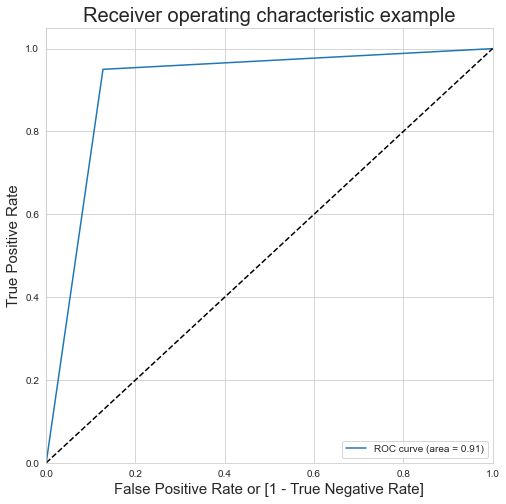

In [173]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Pred)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        

  -  The initial model has a ROC os 0.91, better than the inital model, same as the one in logistic regresion
         
    </span>
</div>

### 6.4.4 Evaluation Matrix

In [174]:
# Let's check the overall accuracy.
Accuracy_Train = accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Churn_Pred)
Accuracy_Train

0.8790476190476191

In [175]:
CM = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Churn_Pred)
CM

array([[16845,  2455],
       [   85,  1615]], dtype=int64)

In [176]:
Precision_Train = CM[1,1]/(CM[0,1]+CM[1,1])
Precision_Train

0.3968058968058968

In [177]:
Recall_Train = CM[1,1]/(CM[1,0]+CM[1,1])
Recall_Train

0.95

### 6.4.5 Model Evalution (on Test Dataset)

In [178]:
y_test_pred = dt_classifier.predict(X_test_dt_pca)

In [179]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities to process further
y_test_pred_final = pd.DataFrame({
    'Churn':y_test_dt_pca.values,
    'Churn_Pred':y_test_pred
})

In [180]:
# Let's check the accuracy for test datset.
Accuracy_Test = accuracy_score(y_test_pred_final.Churn, y_test_pred_final.Churn_Pred)
Accuracy_Test

0.8417777777777777

In [181]:
CM_test = confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Churn_Pred)
CM_test

array([[7056, 1216],
       [ 208,  520]], dtype=int64)

In [182]:
Precision_Test = CM_test[1,1]/(CM_test[0,1]+CM_test[1,1])
Precision_Test

0.2995391705069124

In [183]:
Recall_Test = CM_test[1,1]/(CM_test[1,0]+CM_test[1,1])
Recall_Test

0.7142857142857143

#### To compare the metrics of Train and Trest data

In [184]:
print("\t \t Train  \t Test")
print("Accuracy   \t", round(Accuracy_Train,3) ,'\t\t', round(Accuracy_Test,3))
print("Precision  \t", round(Precision_Train,3) ,'\t\t', round(Precision_Test,3))
print("Recall     \t", round(Recall_Train,3) ,'\t\t', round(Recall_Test,3))

	 	 Train  	 Test
Accuracy   	 0.879 		 0.842
Precision  	 0.397 		 0.3
Recall     	 0.95 		 0.714


<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        

  -  The Model has a accuracy of 88% and 84% respectively on both Train and Test data. 
  
  -  The Model is less than 5% difference in test and train, so it's not over fitting.
        
  -  The Model has low precision and recall values and are less then the logistic regression.

  -  This can be over comes by ensemble models
         
    </span>
</div>

## 6.5 Building a Random Forest model (with PCA)

In [185]:
X_train_RF_pca = X_train_pca.copy()
X_test_RF_pca = X_test_pca.copy()
y_train_RF_pca = y_train.copy()
y_test_RF_pca = y_test.copy()

In [186]:
class_percentage = round(y_train_RF_pca.value_counts(normalize=True),3)
weight_of_class = {0: class_percentage[1], 1:class_percentage[0]}

### 6.5.1 Initial model

In [187]:
# Running the random forest with 15 trees
rfc = RandomForestClassifier(n_estimators=15, class_weight= weight_of_class,random_state=100)
rfc.fit(X_train_RF_pca,y_train_RF_pca)

RandomForestClassifier(class_weight={0: 0.081, 1: 0.919}, n_estimators=15,
                       random_state=100)

<div class="alert alert-block alert-warning">
    <span>
      <b>Note : </b><br>  
        
  -  The Weight of class is used in parameters to deal with class imbalance.
   
    </span>
</div>

In [188]:
# Making predictions
predictions = rfc.predict(X_test_RF_pca)

In [189]:
y_test_pred_final = pd.DataFrame({
    'Churn':y_test_RF_pca.values,
    'Churn_Pred':predictions
})
y_test_pred_final.head()

Churn  Churn_Pred
0     0           0
1     0           0
2     0           0
3     0           0
4     0           0

In [190]:
# Let's check the overall accuracy.
Accuracy_Test = accuracy_score(y_test_pred_final.Churn, y_test_pred_final.Churn_Pred)
Accuracy_Test

0.9282222222222222

In [191]:
CM = confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Churn_Pred)
CM

array([[8215,   57],
       [ 589,  139]], dtype=int64)

In [192]:
Precision_Test = CM[1,1]/(CM[0,1]+CM[1,1])
Precision_Test

0.7091836734693877

In [193]:
Recall_Test = CM[1,1]/(CM[1,0]+CM[1,1])
Recall_Test

0.19093406593406592

### 6.5.2 Hyper-parameter tuning

In [194]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,9,11,15],
    'min_samples_leaf': [10,15,30],
    'min_samples_split': [20,50,60],
    'n_estimators': [20,40], 
    'max_features': [10,15,20] 
}

In [195]:
rf = RandomForestClassifier(class_weight= weight_of_class,random_state=100)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='f1',
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_RF_pca,y_train_RF_pca)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 0.081, 1: 0.919},
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [5, 9, 11, 15],
                         'max_features': [10, 15, 20],
                         'min_samples_leaf': [10, 15, 30],
                         'min_samples_split': [20, 50, 60],
                         'n_estimators': [20, 40]},
             scoring='f1', verbose=1)

In [196]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
127      17.075394      0.439655         0.184691        0.054967   
167      11.640984      0.113273         0.139985        0.011661   
165      11.956521      0.067689         0.120473        0.006750   
180      12.242437      0.240125         0.133357        0.052676   
205      21.962083      0.395405         0.181524        0.089949   
187      17.558900      0.340079         0.158759        0.051524   
171      14.771608      0.336069         0.163566        0.015251   
163      12.043938      0.305214         0.133530        0.010504   
199      22.859308      0.530254         0.137812        0.023999   
145      25.800323      1.195001         0.160332        0.050180   
191      20.996811      0.933557         0.118027        0.005491   
111      11.059178      0.035047         0.119900        0.003382   
151      26.118682      0.354683         0.116544        0.002263   
181      23.318448      0.776956         0.118693        0.001776   
109      10.653442      0.158686         0.130121        0.012311   
133      17.016852      0.076418         0.146494        0.025292   
55        9.460325      0.128159         0.118582        0.009013   
115       9.821132      0.092886         0.118863        0.003761   
126       7.384345      0.045060         0.065649        0.002033   
57        9.129571      0.150193         0.121857        0.009006   
144      16.501597      0.790070         0.074105        0.006458   
185      21.079149      0.211673         0.139140        0.009800   
113      10.452823      0.074926         0.113374        0.002718   
200      10.972761      0.217087         0.090264        0.034978   
201      22.684836      0.232833         0.173717        0.088755   
73       14.048357      0.140679         0.134810        0.021460   
119       9.683475      0.042942         0.125858        0.007963   
129      15.333938      0.068318         0.121009        0.009876   
117       9.854250      0.094508         0.127550        0.010366   
177      13.542746      0.008198         0.122878        0.006810   
175      15.861931      0.286814         0.277613        0.008469   
179      16.006732      0.276524         0.186685        0.087302   
198      12.763591      0.255386         0.070478        0.002860   
61       10.514240      0.044848         0.109384        0.006179   
169      13.107174      0.529607         0.192333        0.051283   
132       8.329631      0.446484         0.064685        0.002070   
108       4.981516      0.128580         0.064495        0.001244   
189      18.802053      0.236469         0.160343        0.030980   
183      21.151230      0.199766         0.122118        0.003602   
150      14.076429      0.111663         0.073111        0.008646   
137      21.202554      0.071895         0.171375        0.030966   
204      11.035596      0.169624         0.096914        0.033028   
110       5.221709      0.226147         0.072279        0.006260   
207      21.737416      0.299594         0.126006        0.021624   
147      32.919030      1.767180         0.244048        0.108574   
186      10.014186      0.760099         0.118756        0.065703   
135      19.461586      0.360259         0.124379        0.003796   
63        8.958310      0.105677         0.120024        0.014641   
203      22.816118      0.498262         0.160750        0.069717   
188       8.842114      0.221463         0.071492        0.007783   
153      25.288414      1.536236         0.129400        0.008235   
93       17.678935      0.052924         0.117797        0.020123   
114       5.133542      0.157423         0.080874        0.011018   
166       5.864995      0.050966         0.109552        0.059759   
209      23.769770      0.431031         0.135317        0.017924   
170       7.074615      0.332657         0.111715        0.040788   
173      17.091253      0.299181         0.174973        0.034634   
131

In [197]:
# printing the optimal f1 score and max depth parameter
print("best f1 score", grid_search.best_score_)
print(grid_search.best_estimator_)

best f1 score 0.562010260872791
RandomForestClassifier(class_weight={0: 0.081, 1: 0.919}, max_depth=11,
                       max_features=15, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=40, random_state=100)


In [198]:
print('best params',grid_search.best_params_)

best params {'max_depth': 11, 'max_features': 15, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 40}


### 6.5.3 Building the model

In [199]:
rfc = RandomForestClassifier(class_weight= weight_of_class,random_state=100,
                             max_depth= 11, 
                             max_features= 15, 
                             min_samples_leaf= 10, 
                             min_samples_split= 20, 
                             n_estimators= 40)
rfc.fit(X_train_RF_pca,y_train_RF_pca)

RandomForestClassifier(class_weight={0: 0.081, 1: 0.919}, max_depth=11,
                       max_features=15, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=40, random_state=100)

#### Model Evalution

In [200]:
# predict
predictions = rfc.predict(X_train_RF_pca)

In [201]:
y_train_pred_final = pd.DataFrame({
    'Churn':y_train_RF_pca.values,
    'Churn_Pred':predictions
})
y_train_pred_final.head()

Churn  Churn_Pred
0     0           0
1     0           0
2     0           0
3     0           0
4     0           0

#### Plot the ROC curve

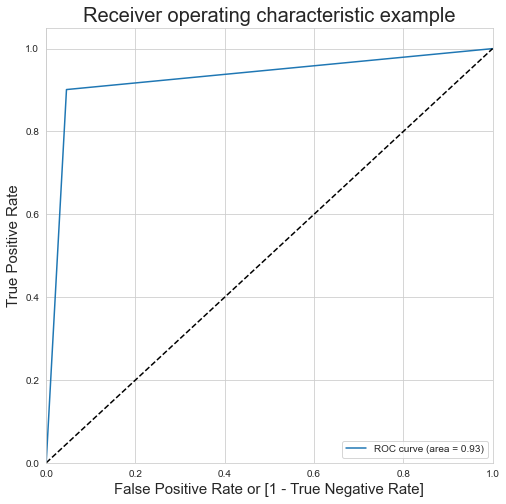

In [202]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Pred)

<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        

  -  The initial model has a ROC os 0.96, the Best ROC model yet.
         
    </span>
</div>

### 6.4.4 Evaluation Matrix

In [203]:
# Let's check the overall accuracy.
Accuracy_Train = accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Churn_Pred)
Accuracy_Train

0.9502380952380952

In [204]:
CM = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Churn_Pred)
CM

array([[18423,   877],
       [  168,  1532]], dtype=int64)

In [205]:
Precision_Train = CM[1,1]/(CM[0,1]+CM[1,1])
Precision_Train

0.6359485263594853

In [206]:
Recall_Train = CM[1,1]/(CM[1,0]+CM[1,1])
Recall_Train

0.9011764705882352

### 6.5.5 Model Evalution (on Test Dataset)

In [207]:
# predict
predictions = rfc.predict(X_test_RF_pca)

In [208]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities to process further
y_test_pred_final = pd.DataFrame({
    'Churn':y_test_dt_pca.values,
    'Churn_Pred':y_test_pred
})

In [209]:
# Let's check the accuracy for test datset.
Accuracy_Test = accuracy_score(y_test_pred_final.Churn, y_test_pred_final.Churn_Pred)
Accuracy_Test

0.8417777777777777

In [210]:
CM_test = confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Churn_Pred)
CM_test

array([[7056, 1216],
       [ 208,  520]], dtype=int64)

In [211]:
Precision_Test = CM[1,1]/(CM[0,1]+CM[1,1])
Precision_Test

0.6359485263594853

In [212]:
Recall_Test = CM_test[1,1]/(CM_test[1,0]+CM_test[1,1])
Recall_Test

0.7142857142857143

#### To compare the metrics of Train and Trest data

In [213]:
print("\t \t Train  \t Test")
print("Accuracy   \t", round(Accuracy_Train,3) ,'\t\t', round(Accuracy_Test,3))
print("Precision  \t", round(Precision_Train,3) ,'\t\t', round(Precision_Test,3))
print("Recall     \t", round(Recall_Train,3) ,'\t\t', round(Recall_Test,3))

	 	 Train  	 Test
Accuracy   	 0.95 		 0.842
Precision  	 0.636 		 0.636
Recall     	 0.901 		 0.714


<div class="alert alert-block alert-info">
    <span>
      <b>Observation : </b><br>  
        

  -  The Model has a accuracy of 98% and 84.5% respectively on both Train and Test data. 
  
  -  The Model seems to be over fitting, but still the test results are acceptable.
        
  -  The Model has good precision and recall values and are excellent when compared to previous models.

  -  This model can be finalised.
         
    </span>
</div>

## Conclusion

### Important predictor attributes

In [214]:
feature_explanation.sort_values(ascending=False)

std_og_mou_8              0.436333
roam_og_mou_8_log1p       0.372325
decrease_in_recharge      0.324551
loc_ic_mou_7              0.310743
total_rech_6              0.288937
total_ic_mou_6            0.284034
arpu_2g_6                 0.236171
total_rech_data_7         0.121780
vbc_3g_8                 -0.185951
term                     -0.196432
loc_ic_t2f_mou_8_log1p   -0.201065
monthly_2g_8             -0.218661
av_rech_amt_data_8       -0.265378
last_day_rch_amt_8       -0.311798
offnet_mou_8             -0.332377
vol_2g_mb_8_log1p        -0.333154
onnet_mou_8              -0.366671
std_ic_mou_8_log1p       -0.373082
av_rech_amt_data_6       -0.375928
total_rech_data_8        -0.442720
spl_ic_mou_8_log1p       -0.597488
loc_ic_t2t_mou_8_log1p   -0.654192
loc_ic_t2m_mou_8         -0.726859
const                    -4.010834
dtype: float64

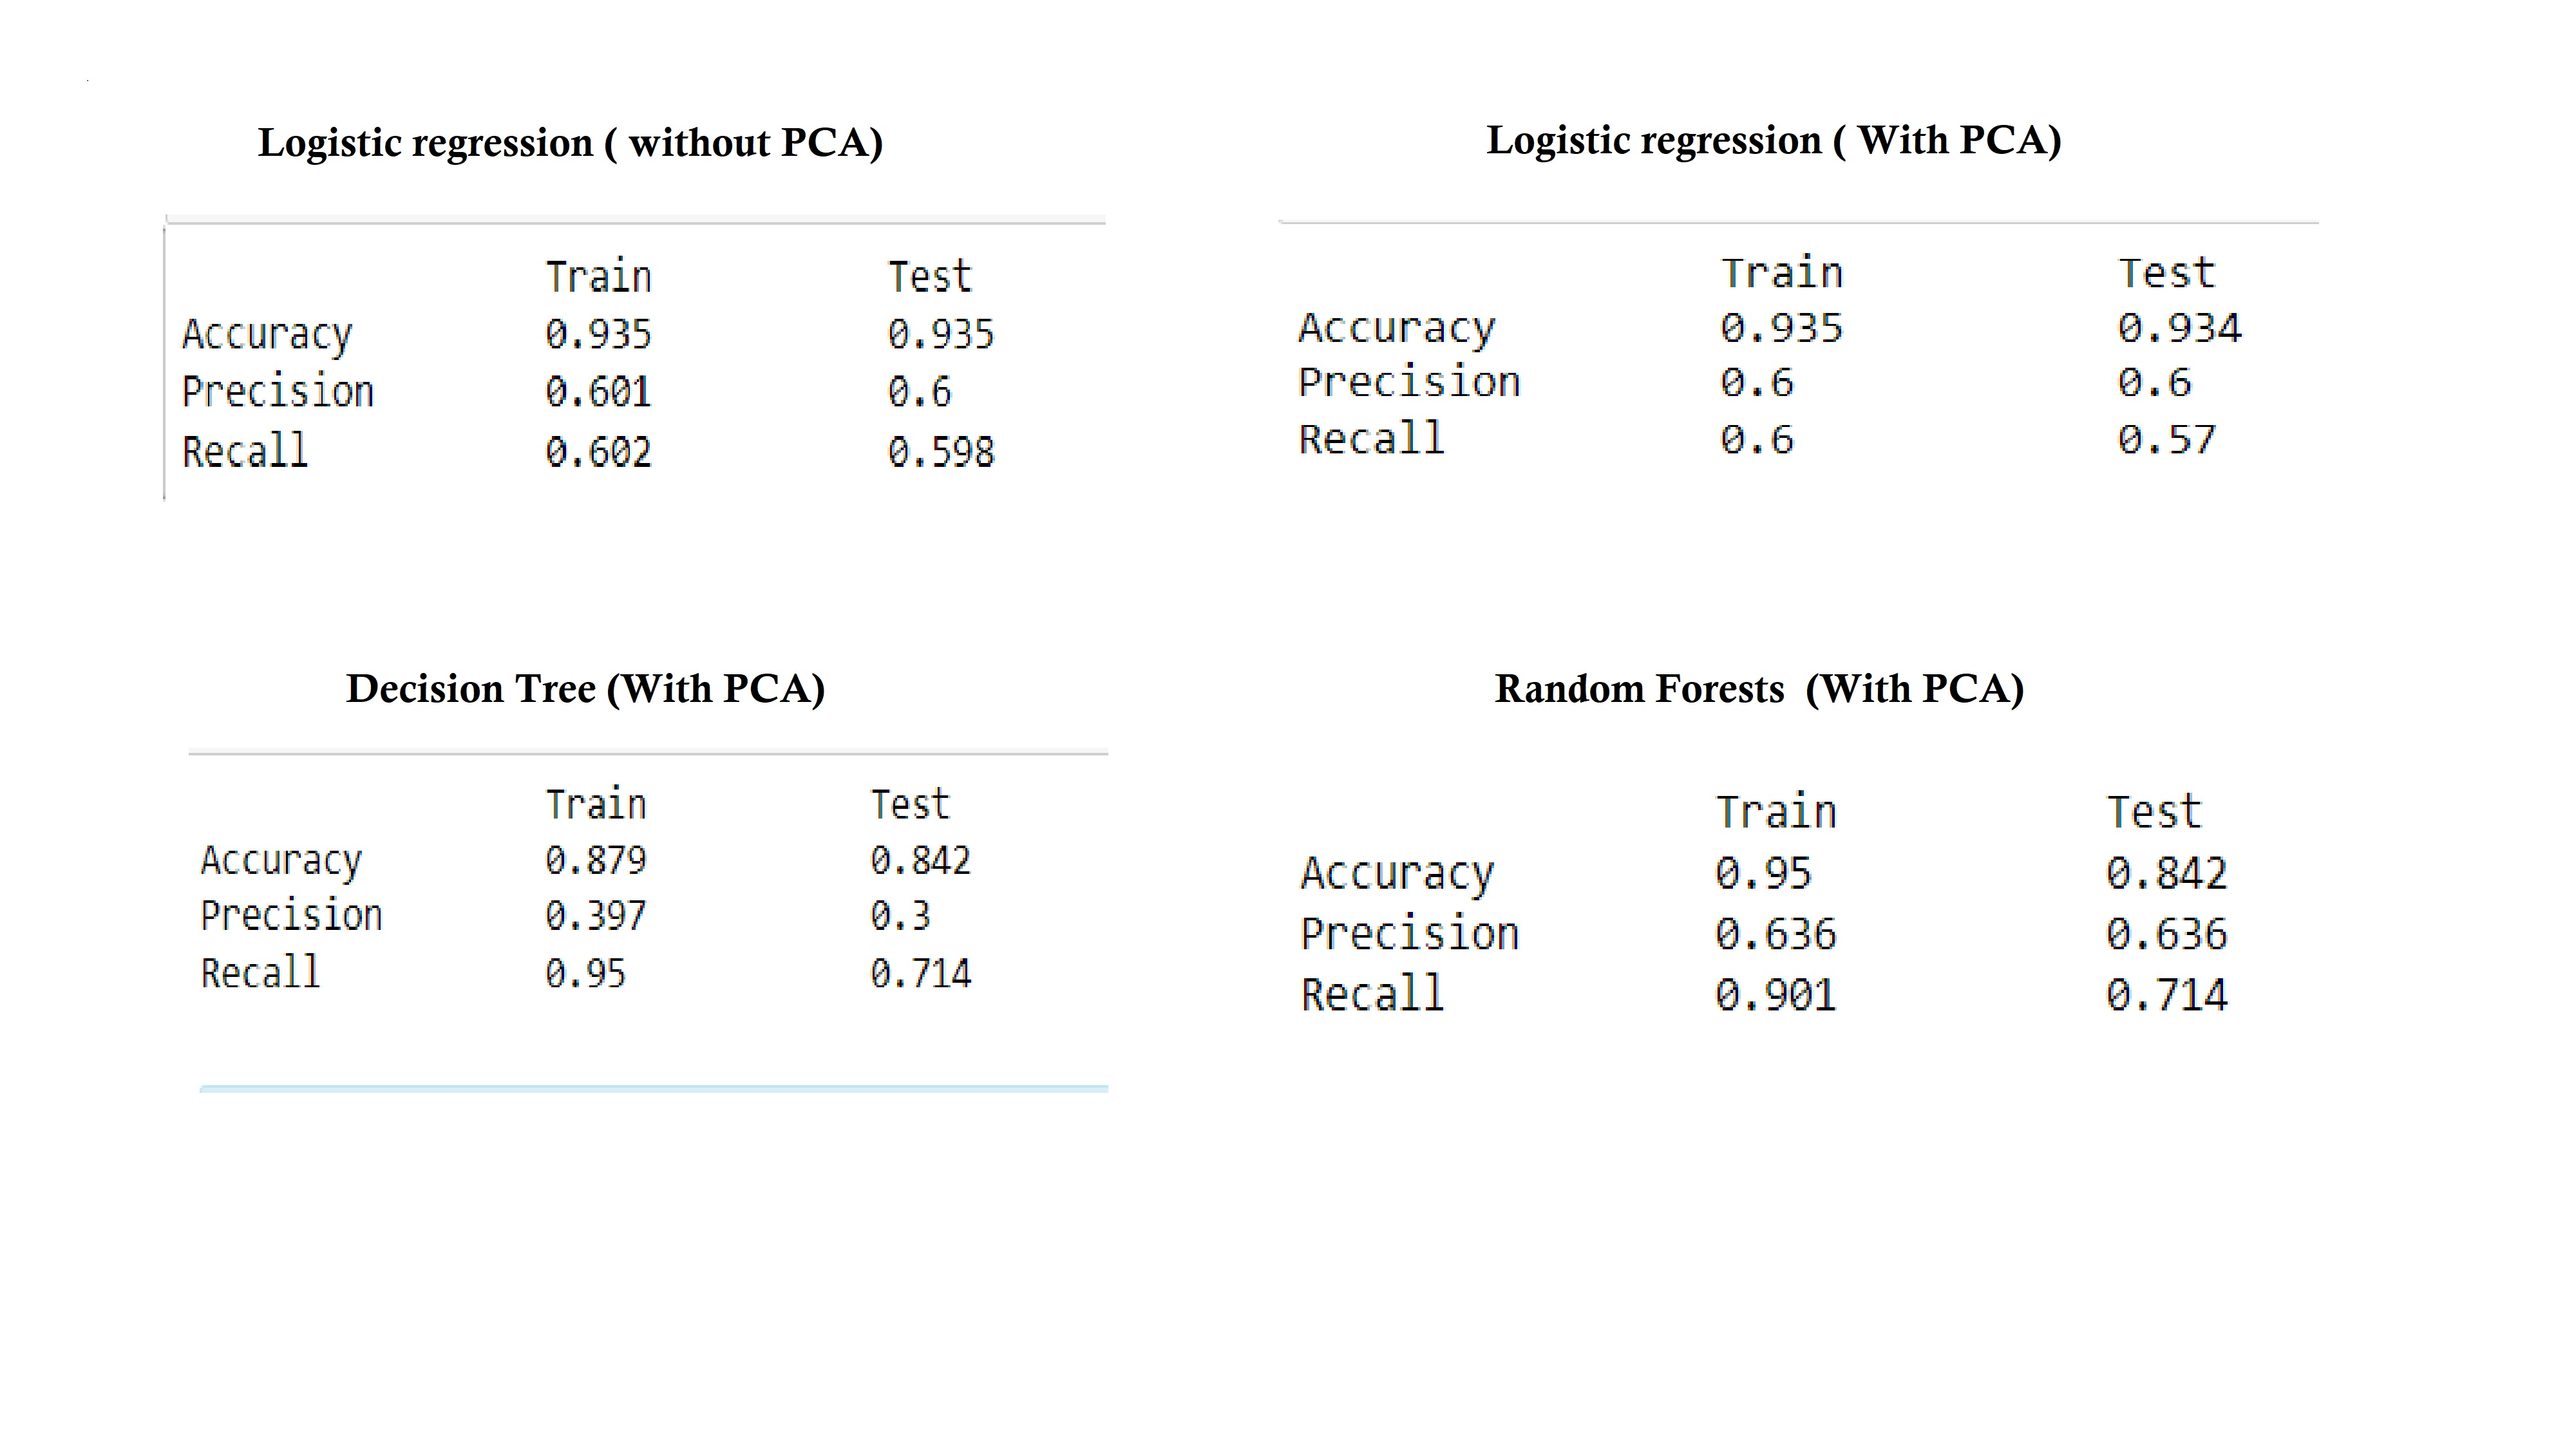

#### Best Model
 - With respect to the f1 score, Random forest is the best predictor.
 - In some case if Accuracy is given more priority then Logistic regression would be more suggested.

#### Few of the new columns derived during the analysis include: 
 - total_rech_amt_6_7:  Derived term Average recharge amount per user for both month 6 & 7
- decrease_in_recharge: This will be a 0/1 column which will indicate if the rechange done in action phase has droped more than 50% as in good phase
- recharge in action month: This will be a boolean column which will indicate if the rechange done in action phase

### Strategies to manage customer churn

We notice these effecting the churn rate 

- local incoming cals from same operator in active phase
- totcal recharge data in active phase 
- special incoming calls in active phase
- STD out going calls in active phase
- Roaming out going calls in active phase
- decrease_in_recharge
- term 


The local incoming calls  and decrease in recharge are strong indicative features of customer churing. In order to avoid customer churn the company should roll out attractive deals and packages if possible.

Customers with less tenure are more likely to churn than customers with high.

Significant amount of outgoing MOU will support that customer is not churning

To segment the customers into bins with respecto to their day to day usage to more acuratly predict the churn

For addressing the aforementioned concerns, it is desirable for a telecom business operator to collect customer query and complaints data also and analyse and tailors their services accordingly. 

